# 자동차 환경 빅데이터 3차
- 과제2 : 건설기계 배출가스 관리 체계 구축
- 과제4 : 배출가스 전문정비제도 관리체계 구축
- 과제5 : 자동차 환경 빅데이터 제작사 공동 활용체게 구축

# Library

In [1]:
import pandas as pd
import os
import numpy as np
from datetime import datetime
import pyexasol

In [2]:
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)
# pd.reset_option('display.float_format')

In [3]:
# 경고문 없애는 코드
# UserWarning: Workbook contains no default style, apply openpyxl's default warn("Workbook contains no default style, apply openpyxl's default")
import warnings
warnings.simplefilter("ignore")

# Fold

In [4]:
pub_fold = 'D:/data/processing/big3/raw/public'
raw_fold = 'D:/data/processing/big3/raw'
raw2_fold = 'D:/data/processing/big3/raw/BD2'
raw4_fold = 'D:/data/processing/big3/raw/BD4'
raw5_fold = 'D:/data/processing/big3/raw/BD5'
an_fold = 'D:/data/processing/big3/analysis'
an2_fold = 'D:/data/processing/big3/analysis/BD2'
an4_fold = 'D:/data/processing/big3/analysis/BD4'
an5_fold = 'D:/data/processing/big3/analysis/BD5'
df_fold = 'D:/data/processing/big3/df'
df2_fold = 'D:/data/processing/big3/df/BD2'
df4_fold = 'D:/data/processing/big3/df/BD4'
df5_fold = 'D:/data/processing/big3/df/BD5'
folds = {
    'pub_fold':pub_fold, 
    'raw_fold':raw_fold, 
    'raw2_fold':raw2_fold, 
    'raw4_fold':raw4_fold, 
    'raw5_fold':raw5_fold, 
    'an_fold':an_fold, 
    'an2_fold:':an2_fold, 
    'an4_fold:':an4_fold, 
    'an5_fold:':an5_fold, 
    'df_fold':df_fold, 
    'df2_fold':df2_fold, 
    'df4_fold':df4_fold, 
    'df5_fold':df5_fold, 
    }
folds

{'pub_fold': 'D:/data/processing/big3/raw/public',
 'raw_fold': 'D:/data/processing/big3/raw',
 'raw2_fold': 'D:/data/processing/big3/raw/BD2',
 'raw4_fold': 'D:/data/processing/big3/raw/BD4',
 'raw5_fold': 'D:/data/processing/big3/raw/BD5',
 'an_fold': 'D:/data/processing/big3/analysis',
 'an2_fold:': 'D:/data/processing/big3/analysis/BD2',
 'an4_fold:': 'D:/data/processing/big3/analysis/BD4',
 'an5_fold:': 'D:/data/processing/big3/analysis/BD5',
 'df_fold': 'D:/data/processing/big3/df',
 'df2_fold': 'D:/data/processing/big3/df/BD2',
 'df4_fold': 'D:/data/processing/big3/df/BD4',
 'df5_fold': 'D:/data/processing/big3/df/BD5'}

# server

In [4]:
# exasol db
wd = pyexasol.connect(dsn='dev.openankus.org:8563', user='sys', password='djslzja', compression=True, schema='VSYSD')
we = pyexasol.connect(dsn='dev.openankus.org:8563', user='sys', password='djslzja', compression=True, schema='VSYSE')

# EDA
+ 과제2
    - 건설기계 인증자료
    - 건설기계 인증대장
+ 과제4
    - 자동차전문정비 : STD_TB_ERR_RES
    - 자동차전문정비상세 : STD_TB_ERR_RES_DET
+ 과제5
    - 구조변경검사 : STD_DLM_TB_ERP_GUBUN_BAECHUL

# 과제2

## 로드

### 등록정보(STD_CEG_CAR_MIG)

In [6]:
# 5m 31.4s
car = wd.export_to_pandas("SELECT VIN, BSPL_STDG_CD, EXHST_GAS_GRD_CD, EXHST_GAS_CERT_NO, VHCL_ERSR_YN, MANP_MNG_NO, YRIDNW, VHCTY_CD, PURPS_CD2, FRST_REG_YMD, VHCL_FBCTN_YMD, VHCL_MNG_NO, VHRNO, EXTGAS_INSP_VLD_YMD, VHCL_OWNR_CL_CD FROM STD_CEG_CAR_MIG;")
car_ch_col = {
    'VIN':'차대번호', 
    'BSPL_STDG_CD':'법정동코드', 
    'EXHST_GAS_GRD_CD':'배출가스등급', 
    'EXHST_GAS_CERT_NO':'배출가스인증번호',
    'VHCL_ERSR_YN':'차량말소YN',
    'MANP_MNG_NO':'제원관리번호', 
    'YRIDNW':'차량연식', 
    'VHCTY_CD':'차종', 
    'PURPS_CD2':'용도', 
    'FRST_REG_YMD':'최초등록일자',
    'VHCL_FBCTN_YMD':'제작일자', 
    'VHCL_MNG_NO':'차량관리번호', 
    'VHRNO':'자동차등록번호',
    'EXTGAS_INSP_VLD_YMD':'검사유효일',
    'VHCL_OWNR_CL_CD':'소유자구분',  
}
carr = car.rename(columns=car_ch_col)

print('data load : STD_CEG_CAR_MIG')

data load : STD_CEG_CAR_MIG


#### 데이터 확인

In [7]:
carr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   차대번호      0 non-null      object
 1   법정동코드     0 non-null      object
 2   배출가스등급    0 non-null      object
 3   배출가스인증번호  0 non-null      object
 4   차량말소YN    0 non-null      object
 5   제원관리번호    0 non-null      object
 6   차량연식      0 non-null      object
 7   차종        0 non-null      object
 8   용도        0 non-null      object
 9   최초등록일자    0 non-null      object
 10  제작일자      0 non-null      object
 11  차량관리번호    0 non-null      object
 12  자동차등록번호   0 non-null      object
 13  검사유효일     0 non-null      object
 14  소유자구분     0 non-null      object
dtypes: object(15)
memory usage: 0.0+ bytes


In [ ]:
cols_df = pd.DataFrame({'컬럼명':car_ch_col.keys(), '컬럼설명':car_ch_col.values()})
cols_df

,컬럼명,컬럼설명
0,VIN,차대번호
1,BSPL_STDG_CD,법정동코드
2,EXHST_GAS_GRD_CD,배출가스등급
3,EXHST_GAS_CERT_NO,배출가스인증번호
4,VHCL_ERSR_YN,차량말소YN
5,MANP_MNG_NO,제원관리번호
6,YRIDNW,차량연식
7,VHCTY_CD,차종
8,PURPS_CD2,용도
9,FRST_REG_YMD,최초등록일자


In [ ]:
carr_stat = carr.isnull().sum().reset_index().rename(columns={'index':'컬럼설명', 0:'빈 값 개수'})
carr_stat['총 행수'] = carr.shape[0]
carr_stat.insert(0, '번호', [x for x in range(1, carr_stat.shape[0] + 1)])
carr_stat_final = carr_stat.merge(cols_df, on='컬럼설명', how='left')
carr_stat_final = carr_stat_final[['번호', '컬럼명', '컬럼설명', '빈 값 개수', '총 행수']]
carr_stat_final

,번호,컬럼명,컬럼설명,빈 값 개수,총 행수
0,1,VIN,차대번호,0,30625663
1,2,BSPL_STDG_CD,법정동코드,0,30625663
2,3,EXHST_GAS_GRD_CD,배출가스등급,1060024,30625663
3,4,EXHST_GAS_CERT_NO,배출가스인증번호,3860506,30625663
4,5,VHCL_ERSR_YN,차량말소YN,0,30625663
5,6,MANP_MNG_NO,제원관리번호,0,30625663
6,7,YRIDNW,차량연식,0,30625663
7,8,VHCTY_CD,차종,0,30625663
8,9,PURPS_CD2,용도,0,30625663
9,10,FRST_REG_YMD,최초등록일자,18,30625663


##### [출력] 데이터 정보

In [320]:
today_date = datetime.today().strftime('%Y.%m.%d')
today_date

'2023.11.14'

In [316]:
carr_stat_final.to_excel(os.path.join(an2_fold, f'데이터정보_등록정보({today_date}).xlsx'), index=False)

### 제원정보(STD_CEG_CAR_SRC_MIG)

In [29]:
# 4.1s
src = wd.export_to_pandas("SELECT MANP_MNG_NO, FUEL_CD, VHCTY_TY_CD2, MNFCTR_NM, VHCNM, VHCL_FRM, EGIN_TY, VHCTY_CL_CD, TOTL_WGHT, CRYNG_WGHT, DSPLVL, EGIN_OTPT FROM STD_CEG_CAR_SRC_MIG;")
src_ch_col = {
    'MANP_MNG_NO':'제원관리번호', 
    'FUEL_CD':'연료',
    'VHCTY_TY_CD2':'차종유형', 
    'MNFCTR_NM':'제작사명', 
    'VHCNM':'차명', 
    'VHCL_FRM':'자동차형식', 
    'EGIN_TY':'엔진형식', 
    'VHCTY_CL_CD':'차종분류',
    'TOTL_WGHT':'총중량',
    'CRYNG_WGHT':'적재중량',
    'DSPLVL':'배기량', 
    'EGIN_OTPT':'엔진출력',
}
srcr = src.rename(columns=src_ch_col)

print('data load : STD_CEG_CAR_SRC_MIG')

data load : STD_CEG_CAR_SRC_MIG


#### 데이터 확인

In [306]:
srcr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566615 entries, 0 to 566614
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   제원관리번호  566615 non-null  object 
 1   연료      545937 non-null  object 
 2   차종유형    553038 non-null  object 
 3   제작사명    559794 non-null  object 
 4   차명      566544 non-null  object 
 5   자동차형식   536460 non-null  object 
 6   엔진형식    517013 non-null  object 
 7   차종분류    551140 non-null  object 
 8   총중량     563088 non-null  float64
 9   적재중량    461878 non-null  float64
 10  배기량     530949 non-null  float64
 11  엔진출력    491335 non-null  float64
dtypes: float64(4), object(8)
memory usage: 51.9+ MB


In [307]:
cols_df = pd.DataFrame({'컬럼명':src_ch_col.keys(), '컬럼설명':src_ch_col.values()})
cols_df

,컬럼명,컬럼설명
0,MANP_MNG_NO,제원관리번호
1,FUEL_CD,연료
2,VHCTY_TY_CD2,차종유형
3,MNFCTR_NM,제작사명
4,VHCNM,차명
5,VHCL_FRM,자동차형식
6,EGIN_TY,엔진형식
7,VHCTY_CL_CD,차종분류
8,TOTL_WGHT,총중량
9,CRYNG_WGHT,적재중량


In [308]:
srcr_stat = srcr.isnull().sum().reset_index().rename(columns={'index':'컬럼설명', 0:'빈 값 개수'})
srcr_stat['총 행수'] = srcr.shape[0]
srcr_stat.insert(0, '번호', [x for x in range(1, srcr_stat.shape[0] + 1)])
srcr_stat_final = srcr_stat.merge(cols_df, on='컬럼설명', how='left')
srcr_stat_final = srcr_stat_final[['번호', '컬럼명', '컬럼설명', '빈 값 개수', '총 행수']]
srcr_stat_final

,번호,컬럼명,컬럼설명,빈 값 개수,총 행수
0,1,MANP_MNG_NO,제원관리번호,0,566615
1,2,FUEL_CD,연료,20678,566615
2,3,VHCTY_TY_CD2,차종유형,13577,566615
3,4,MNFCTR_NM,제작사명,6821,566615
4,5,VHCNM,차명,71,566615
5,6,VHCL_FRM,자동차형식,30155,566615
6,7,EGIN_TY,엔진형식,49602,566615
7,8,VHCTY_CL_CD,차종분류,15475,566615
8,9,TOTL_WGHT,총중량,3527,566615
9,10,CRYNG_WGHT,적재중량,104737,566615


##### [출력] 데이터 정보

In [314]:
today_date = datetime.today().strftime('%Y.%m.%d')
today_date

'2023.11.14'

In [317]:
srcr_stat_final.to_excel(os.path.join(an2_fold, f'데이터정보_제원정보({today_date}).xlsx'), index=False)

### 정기검사(STD_TB_JGT_HIS)

In [309]:
# 3m 34.9s
# jgt = wb.export_to_pandas("SELECT VIN, FDRM_INSP_INSP_MTHD_CD, FDRM_INSP_KND_CD, FDRM_INSP_JGMT, FDRM_NLOD_SMO_MSTVL1, FDRM_NLOD_SMO_MSTVL2, FDRM_NLOD_SMO_MSTVL3, FDRM_NLOD_SMO_JT_YN1, FDRM_INSP_YMD, FDRM_DRVNG_DSTNC, FDRM_NLOD_SMO_PRMVL1 FROM STD_TB_JGT_HIS WHERE ROWNUM <= 10000;") # 테스트용
jgt = wd.export_to_pandas("SELECT VIN, FDRM_INSP_INSP_MTHD_CD, FDRM_INSP_KND_CD, FDRM_INSP_JGMT, FDRM_NLOD_SMO_MSTVL1, FDRM_NLOD_SMO_MSTVL2, FDRM_NLOD_SMO_MSTVL3, FDRM_NLOD_SMO_MSTVL4, FDRM_NLOD_SMO_MSTVL5, FDRM_NLOD_SMO_MSTVL6, FDRM_NLOD_SMO_JT_YN1, FDRM_NLOD_SMO_JT_YN2, FDRM_NLOD_SMO_JT_YN3, FDRM_NLOD_SMO_JT_YN4, FDRM_NLOD_SMO_JT_YN5, FDRM_NLOD_SMO_JT_YN6, FDRM_INSP_YMD, FDRM_DRVNG_DSTNC, FDRM_NLOD_SMO_PRMVL1, FDRM_NLOD_SMO_PRMVL2, FDRM_NLOD_SMO_PRMVL3, FDRM_NLOD_SMO_PRMVL4, FDRM_NLOD_SMO_PRMVL5, FDRM_NLOD_SMO_PRMVL6 FROM STD_TB_JGT_HIS;")
jgt_ch_col = {
    'VIN':'차대번호', 
    'FDRM_INSP_INSP_MTHD_CD':'검사방법', 
    'FDRM_INSP_KND_CD':'검사종류', 
    'FDRM_INSP_JGMT':'검사판정', 
    'FDRM_NLOD_SMO_MSTVL1':'무부하매연측정치1', 
    'FDRM_NLOD_SMO_MSTVL2':'무부하매연측정치2', 
    'FDRM_NLOD_SMO_MSTVL3':'무부하매연측정치3', 
    'FDRM_NLOD_SMO_MSTVL4':'무부하매연측정치4', 
    'FDRM_NLOD_SMO_MSTVL5':'무부하매연측정치5', 
    'FDRM_NLOD_SMO_MSTVL6':'무부하매연측정치6', 
    'FDRM_NLOD_SMO_JT_YN1':'무부하매연판정1', 
    'FDRM_NLOD_SMO_JT_YN2':'무부하매연판정2', 
    'FDRM_NLOD_SMO_JT_YN3':'무부하매연판정3', 
    'FDRM_NLOD_SMO_JT_YN4':'무부하매연판정4', 
    'FDRM_NLOD_SMO_JT_YN5':'무부하매연판정5', 
    'FDRM_NLOD_SMO_JT_YN6':'무부하매연판정6', 
    'FDRM_NLOD_SMO_PRMVL1':'무부하매연허용치1', 
    'FDRM_NLOD_SMO_PRMVL2':'무부하매연허용치2', 
    'FDRM_NLOD_SMO_PRMVL3':'무부하매연허용치3', 
    'FDRM_NLOD_SMO_PRMVL4':'무부하매연허용치4', 
    'FDRM_NLOD_SMO_PRMVL5':'무부하매연허용치5', 
    'FDRM_NLOD_SMO_PRMVL6':'무부하매연허용치6', 
    'FDRM_INSP_YMD':'검사일자',
    'FDRM_DRVNG_DSTNC':'주행거리',
}
jgtr = jgt.rename(columns=jgt_ch_col)

print('data load : STD_CEG_CAR_SRC_MIG')

data load : STD_CEG_CAR_SRC_MIG


#### 데이터 확인

In [310]:
jgtr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65903838 entries, 0 to 65903837
Data columns (total 24 columns):
 #   Column     Dtype  
---  ------     -----  
 0   차대번호       object 
 1   검사방법       object 
 2   검사종류       object 
 3   검사판정       object 
 4   무부하매연측정치1  float64
 5   무부하매연측정치2  float64
 6   무부하매연측정치3  float64
 7   무부하매연측정치4  float64
 8   무부하매연측정치5  float64
 9   무부하매연측정치6  float64
 10  무부하매연판정1   object 
 11  무부하매연판정2   object 
 12  무부하매연판정3   object 
 13  무부하매연판정4   object 
 14  무부하매연판정5   object 
 15  무부하매연판정6   object 
 16  검사일자       int64  
 17  주행거리       float64
 18  무부하매연허용치1  float64
 19  무부하매연허용치2  float64
 20  무부하매연허용치3  float64
 21  무부하매연허용치4  float64
 22  무부하매연허용치5  float64
 23  무부하매연허용치6  float64
dtypes: float64(13), int64(1), object(10)
memory usage: 11.8+ GB


In [311]:
cols_df = pd.DataFrame({'컬럼명':jgt_ch_col.keys(), '컬럼설명':jgt_ch_col.values()})
cols_df

,컬럼명,컬럼설명
0,VIN,차대번호
1,FDRM_INSP_INSP_MTHD_CD,검사방법
2,FDRM_INSP_KND_CD,검사종류
3,FDRM_INSP_JGMT,검사판정
4,FDRM_NLOD_SMO_MSTVL1,무부하매연측정치1
5,FDRM_NLOD_SMO_MSTVL2,무부하매연측정치2
6,FDRM_NLOD_SMO_MSTVL3,무부하매연측정치3
7,FDRM_NLOD_SMO_MSTVL4,무부하매연측정치4
8,FDRM_NLOD_SMO_MSTVL5,무부하매연측정치5
9,FDRM_NLOD_SMO_MSTVL6,무부하매연측정치6


In [312]:
jgtr_stat = jgtr.isnull().sum().reset_index().rename(columns={'index':'컬럼설명', 0:'빈 값 개수'})
jgtr_stat['총 행수'] = jgtr.shape[0]
jgtr_stat.insert(0, '번호', [x for x in range(1, jgtr_stat.shape[0] + 1)])
jgtr_stat_final = jgtr_stat.merge(cols_df, on='컬럼설명', how='left')
jgtr_stat_final = jgtr_stat_final[['번호', '컬럼명', '컬럼설명', '빈 값 개수', '총 행수']]
jgtr_stat_final

,번호,컬럼명,컬럼설명,빈 값 개수,총 행수
0,1,VIN,차대번호,0,65903838
1,2,FDRM_INSP_INSP_MTHD_CD,검사방법,0,65903838
2,3,FDRM_INSP_KND_CD,검사종류,0,65903838
3,4,FDRM_INSP_JGMT,검사판정,0,65903838
4,5,FDRM_NLOD_SMO_MSTVL1,무부하매연측정치1,3377038,65903838
5,6,FDRM_NLOD_SMO_MSTVL2,무부하매연측정치2,40994887,65903838
6,7,FDRM_NLOD_SMO_MSTVL3,무부하매연측정치3,40994887,65903838
7,8,FDRM_NLOD_SMO_MSTVL4,무부하매연측정치4,45948127,65903838
8,9,FDRM_NLOD_SMO_MSTVL5,무부하매연측정치5,45948127,65903838
9,10,FDRM_NLOD_SMO_MSTVL6,무부하매연측정치6,45948127,65903838


##### [출력] 데이터 정보

In [318]:
today_date = datetime.today().strftime('%Y.%m.%d')
today_date

'2023.11.14'

In [319]:
jgtr_stat_final.to_excel(os.path.join(an2_fold, f'데이터정보_정기정보({today_date}).xlsx'), index=False)

### 정밀검사(STD_TB_EET_HIS_ME)

In [6]:
# 10m 30.8s
eet = wd.export_to_pandas("SELECT VIN, PRCINSP_MSRMT_MTHD_CD, PRCINSP_KND_CD, PRCINSP_JGMT, PREC_NLOD_SMO_MSTVL1, PREC_NLOD_SMO_MSTVL2, PREC_NLOD_SMO_MSTVL3, PREC_NLOD_SMO_MSTVL4, PREC_NLOD_SMO_MSTVL5, PREC_NLOD_SMO_MSTVL6, PREC_NLOD_SMO_JT_YN1, PREC_NLOD_SMO_JT_YN2, PREC_NLOD_SMO_JT_YN3, PREC_NLOD_SMO_JT_YN4, PREC_NLOD_SMO_JT_YN5, PREC_NLOD_SMO_JT_YN6, PRCINSP_YMD, PRCINSP_DRVNG_DSTNC, PREC_NLOD_SMO_PRMVL1, PREC_NLOD_SMO_PRMVL2, PREC_NLOD_SMO_PRMVL3, PREC_NLOD_SMO_PRMVL4, PREC_NLOD_SMO_PRMVL5, PREC_NLOD_SMO_PRMVL6 FROM STD_TB_EET_HIS_ME;")
eet_ch_col = {
    'VIN':'차대번호', 
    'PRCINSP_MSRMT_MTHD_CD':'검사방법', 
    'PRCINSP_KND_CD':'검사종류', 
    'PRCINSP_JGMT':'검사판정', 
    'PREC_NLOD_SMO_MSTVL1':'무부하매연측정치1', 
    'PREC_NLOD_SMO_MSTVL2':'무부하매연측정치2', 
    'PREC_NLOD_SMO_MSTVL3':'무부하매연측정치3', 
    'PREC_NLOD_SMO_MSTVL4':'무부하매연측정치4', 
    'PREC_NLOD_SMO_MSTVL5':'무부하매연측정치5', 
    'PREC_NLOD_SMO_MSTVL6':'무부하매연측정치6', 
    'PREC_NLOD_SMO_JT_YN1':'무부하매연판정1', 
    'PREC_NLOD_SMO_JT_YN2':'무부하매연판정2', 
    'PREC_NLOD_SMO_JT_YN3':'무부하매연판정3', 
    'PREC_NLOD_SMO_JT_YN4':'무부하매연판정4', 
    'PREC_NLOD_SMO_JT_YN5':'무부하매연판정5', 
    'PREC_NLOD_SMO_JT_YN6':'무부하매연판정6', 
    'PREC_NLOD_SMO_PRMVL1':'무부하매연허용치1', 
    'PREC_NLOD_SMO_PRMVL2':'무부하매연허용치2', 
    'PREC_NLOD_SMO_PRMVL3':'무부하매연허용치3', 
    'PREC_NLOD_SMO_PRMVL4':'무부하매연허용치4', 
    'PREC_NLOD_SMO_PRMVL5':'무부하매연허용치5', 
    'PREC_NLOD_SMO_PRMVL6':'무부하매연허용치6', 
    'PRCINSP_YMD':'검사일자',
    'PRCINSP_DRVNG_DSTNC':'주행거리', 
}
eetr = eet.rename(columns=eet_ch_col)

print('data load : STD_TB_EET_HIS_ME')

data load : STD_TB_EET_HIS_ME


#### 데이터 확인

In [9]:
eetr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102191938 entries, 0 to 102191937
Data columns (total 24 columns):
 #   Column     Dtype  
---  ------     -----  
 0   차대번호       object 
 1   검사방법       object 
 2   검사종류       object 
 3   검사판정       object 
 4   무부하매연측정치1  float64
 5   무부하매연측정치2  float64
 6   무부하매연측정치3  float64
 7   무부하매연측정치4  float64
 8   무부하매연측정치5  float64
 9   무부하매연측정치6  float64
 10  무부하매연판정1   object 
 11  무부하매연판정2   object 
 12  무부하매연판정3   object 
 13  무부하매연판정4   object 
 14  무부하매연판정5   object 
 15  무부하매연판정6   object 
 16  검사일자       int64  
 17  주행거리       float64
 18  무부하매연허용치1  float64
 19  무부하매연허용치2  float64
 20  무부하매연허용치3  float64
 21  무부하매연허용치4  float64
 22  무부하매연허용치5  float64
 23  무부하매연허용치6  float64
dtypes: float64(13), int64(1), object(10)
memory usage: 18.3+ GB


In [10]:
cols_df = pd.DataFrame({'컬럼명':eet_ch_col.keys(), '컬럼설명':eet_ch_col.values()})
cols_df

,컬럼명,컬럼설명
0,VIN,차대번호
1,PRCINSP_MSRMT_MTHD_CD,검사방법
2,PRCINSP_KND_CD,검사종류
3,PRCINSP_JGMT,검사판정
4,PREC_NLOD_SMO_MSTVL1,무부하매연측정치1
5,PREC_NLOD_SMO_MSTVL2,무부하매연측정치2
6,PREC_NLOD_SMO_MSTVL3,무부하매연측정치3
7,PREC_NLOD_SMO_MSTVL4,무부하매연측정치4
8,PREC_NLOD_SMO_MSTVL5,무부하매연측정치5
9,PREC_NLOD_SMO_MSTVL6,무부하매연측정치6


In [11]:
# 
eetr_stat = eetr.isnull().sum().reset_index().rename(columns={'index':'컬럼설명', 0:'빈 값 개수'})
eetr_stat['총 행수'] = eetr.shape[0]
eetr_stat.insert(0, '번호', [x for x in range(1, eetr_stat.shape[0] + 1)])
eetr_stat_final = eetr_stat.merge(cols_df, on='컬럼설명', how='left')
eetr_stat_final = eetr_stat_final[['번호', '컬럼명', '컬럼설명', '빈 값 개수', '총 행수']]
eetr_stat_final

,번호,컬럼명,컬럼설명,빈 값 개수,총 행수
0,1,VIN,차대번호,0,102191938
1,2,PRCINSP_MSRMT_MTHD_CD,검사방법,7,102191938
2,3,PRCINSP_KND_CD,검사종류,19420,102191938
3,4,PRCINSP_JGMT,검사판정,123941,102191938
4,5,PREC_NLOD_SMO_MSTVL1,무부하매연측정치1,2407076,102191938
5,6,PREC_NLOD_SMO_MSTVL2,무부하매연측정치2,28362934,102191938
6,7,PREC_NLOD_SMO_MSTVL3,무부하매연측정치3,30952683,102191938
7,8,PREC_NLOD_SMO_MSTVL4,무부하매연측정치4,43941015,102191938
8,9,PREC_NLOD_SMO_MSTVL5,무부하매연측정치5,43941075,102191938
9,10,PREC_NLOD_SMO_MSTVL6,무부하매연측정치6,57716513,102191938


##### [출력] 데이터 정보

In [12]:
today_date = datetime.today().strftime('%Y.%m.%d')
today_date

'2023.11.14'

In [13]:
# 0.8s
eetr_stat_final.to_excel(os.path.join(an2_fold, f'데이터정보_정밀정보({today_date}).xlsx'), index=False)

### 건설기계 인증자료(12개)

In [6]:
def construct_machine_certification_data_load(name, sheet_name=0):
    fold = os.path.join(raw2_fold, 'KENCIS 건설기계 인증자료_231018')
    try:
        file_name = f'{name}.xlsx'
        cert_dt = pd.read_excel(os.path.join(fold, file_name), sheet_name=sheet_name)
        return cert_dt
    except:
        file_name = f'{name}.xlsx'
        cert_dt = pd.read_excel(os.path.join(fold, file_name))
        return cert_dt

#### 정보 모음

In [7]:
cols = construct_machine_certification_data_load('KENCIS_건설기계인증정보_테이블명세서', '테이블정의서')
cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   테이블명    12 non-null     object
 1   테이블설명   12 non-null     object
 2   컬럼명     649 non-null    object
 3   컬럼설명    644 non-null    object
 4   데이터형식   649 non-null    object
 5   길이      499 non-null    object
 6   Null    649 non-null    object
dtypes: object(7)
memory usage: 35.6+ KB


In [8]:
cols.head()

,테이블명,테이블설명,컬럼명,컬럼설명,데이터형식,길이,Null
0,UNI_FC_TCMASTER,통합 정식/기본인증 마스터,ADM_NO,관리번호,VARCHAR2,10,N
1,NaN,NaN,AGREE_SUBMIS,교정정보 및 사후 확정정보 제출 협약,VARCHAR2,100,Y
2,NaN,NaN,AGREE_SUBMIS_CT,교정정보 및 사후 확정정보 제출 협약 첨부파일,VARCHAR2,100,Y
3,NaN,NaN,APP_WAR,보증에 관한 설명,VARCHAR2,100,Y
4,NaN,NaN,APP_WAR_CT,보증에 관한 설명첨부파일,VARCHAR2,100,Y


In [9]:
cols[['테이블명', '테이블설명']] = cols[['테이블명', '테이블설명']].ffill()

In [10]:
name_list = [
    'UNI_FC_TCMASTER', 
    'UNI_FC_TCERTIMODI', 
    'UNI_FC_ENG_TEFSPEC', 
    'UNI_FC_TEEMISSN', 
    'UNI_FC_TEEMISSN_ENG_RES', 
    'UNI_FC_TESTINFO', 
    'UNI_FC_ENG_LIST', 
    'UNI_FC_ENDUENG_EMI', 
    'UNI_FC_ENDUENGTEST', 
    'UNI_FC_ENDUENGTEST_RES', 
    'UNI_FC_KIENGTEST', 
    'UNI_FC_KIENGTEST_RES', 
    ]
len(name_list)

12

In [11]:
cols_dict = {}
for t in name_list:
    cols_dict[t] = {a:b for a, b in cols.loc[cols['테이블명'] == t, ['컬럼명', '컬럼설명']].values}

In [12]:
cols_dict

{'UNI_FC_TCMASTER': {'ADM_NO': '관리번호',
  'AGREE_SUBMIS': '교정정보 및 사후 확정정보 제출 협약',
  'AGREE_SUBMIS_CT': '교정정보 및 사후 확정정보 제출 협약 첨부파일',
  'APP_WAR': '보증에 관한 설명',
  'APP_WAR_CT': '보증에 관한 설명첨부파일',
  'APPLI_ID': '신청아이디',
  'APPREGI_DATE': '결재일',
  'APPROVAL_YN': '결재여부',
  'CERTI_DIV': '인증구분',
  'CERTI_INTRO': '인증소개',
  'CERTI_INTRO_CT': '인증소개 첨부파일',
  'CERTI_STATE': '처분내용',
  'CERTI_TYPE': '인증종류',
  'CO_DEVT': 'CO 개발목표치',
  'CO_OP': '산술기호(1:덧셈 2:곱셈)',
  'COLD_CO_DEVT': 'Cold CO 개발목표치',
  'COLD_CO_OP': 'Cold CO 연산자',
  'CONF_INFO': '기밀사항',
  'CONF_INFO_CT': '기밀사항 첨부파일',
  'CONF_ISSUE_NO': '발급문서번호',
  'DF_CO': 'CO 열화계수',
  'DF_COLD_CO': 'HC 열화계수',
  'DF_EVAP_EMIS': 'COLD_CO 열화계수',
  'DF_HC': 'HC 열화계수',
  'DF_HCNOX': 'HCNOX 열화계수',
  'DF_MILEAGE': '열화계수 사용량',
  'DF_NOX': 'NOX 열화계수',
  'DF_PM': 'PM 열화계수',
  'DF_PN': 'PN 열화계수',
  'DF_SMOKE': 'SMOKE 열화계수',
  'DURA_TEST_EF_SNO': '내구성시험 동일차종 일련번호',
  'DURA_TEST_REMARK': '내구성테스트 비고',
  'DURA_TEST_YN': '내구성시험 실시 여부',
  'E_CONFIRM': '결제상태',
  'EF_CD': '동일

In [13]:
name = 'UNI_FC_KIENGTEST_RES'
ct01 = construct_machine_certification_data_load(name)
ct01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2740 entries, 0 to 2739
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ADM_NO            2740 non-null   int64  
 1   CERTI_MODI_SNO    2740 non-null   int64  
 2   P_ENG_YN          2704 non-null   float64
 3   SEL_ADM_NO        30 non-null     float64
 4   TEST_METHOD_CHK   2740 non-null   object 
 5   TEST_MOD          2740 non-null   int64  
 6   TEST_RST_SNO      2740 non-null   int64  
 7   TEST_RST_SNO_SEQ  2740 non-null   int64  
 8   FUEL              0 non-null      float64
 9   CO                953 non-null    float64
 10  NMHC              924 non-null    float64
 11  NOX               943 non-null    float64
 12  PM                943 non-null    float64
 13  REG_ID            2740 non-null   object 
 14  REG_DATETIME      2740 non-null   object 
 15  MOD_ID            162 non-null    object 
 16  MOD_DATETIME      162 non-null    object 


In [14]:
cols_dict[name]

{'ADM_NO': '관리번호',
 'CERTI_MODI_SNO': '인증 일련번호',
 'P_ENG_YN': 'KI대표원동기 여부',
 'SEL_ADM_NO': 'KI대표원동기 관리번호',
 'TEST_METHOD_CHK': '시험방법체크값',
 'TEST_MOD': '시험모드(CVS-75,Highway,US06,SC03,Cold CO...)',
 'TEST_RST_SNO': '시험결과일련번호',
 'TEST_RST_SNO_SEQ': '시험결과일련번호의항목순번',
 'FUEL': '사용연료',
 'CO': 'CO',
 'NMHC': 'NMHC',
 'NOX': 'NOx',
 'PM': 'PM',
 'REG_ID': '등록아이디',
 'REG_DATETIME': '등록일시',
 'MOD_ID': '수정아이디',
 'MOD_DATETIME': '수정일시',
 'NMHCNOX': 'NMHC+Nox',
 'PN': '입자상물질개수',
 'NH3': '암모니아'}

In [15]:
cols_df = pd.DataFrame({'컬럼명':cols_dict[name].keys(), '컬럼설명':cols_dict[name].values()})
cols_df

,컬럼명,컬럼설명
0,ADM_NO,관리번호
1,CERTI_MODI_SNO,인증 일련번호
2,P_ENG_YN,KI대표원동기 여부
3,SEL_ADM_NO,KI대표원동기 관리번호
4,TEST_METHOD_CHK,시험방법체크값
5,TEST_MOD,"시험모드(CVS-75,Highway,US06,SC03,Cold CO...)"
6,TEST_RST_SNO,시험결과일련번호
7,TEST_RST_SNO_SEQ,시험결과일련번호의항목순번
8,FUEL,사용연료
9,CO,CO


In [16]:
temp = ct01.isnull().sum().reset_index().rename(columns={'index':'컬럼명', 0:'빈 값 개수'})
temp['총 행수'] = ct01.shape[0]
temp.insert(0, '번호', [x for x in range(1, temp.shape[0] + 1)])
ttemp = temp.merge(cols_df, on='컬럼명', how='left')
ttemp = ttemp[['번호', '컬럼명', '컬럼설명', '빈 값 개수', '총 행수']]
ttemp

,번호,컬럼명,컬럼설명,빈 값 개수,총 행수
0,1,ADM_NO,관리번호,0,2740
1,2,CERTI_MODI_SNO,인증 일련번호,0,2740
2,3,P_ENG_YN,KI대표원동기 여부,36,2740
3,4,SEL_ADM_NO,KI대표원동기 관리번호,2710,2740
4,5,TEST_METHOD_CHK,시험방법체크값,0,2740
5,6,TEST_MOD,"시험모드(CVS-75,Highway,US06,SC03,Cold CO...)",0,2740
6,7,TEST_RST_SNO,시험결과일련번호,0,2740
7,8,TEST_RST_SNO_SEQ,시험결과일련번호의항목순번,0,2740
8,9,FUEL,사용연료,2740,2740
9,10,CO,CO,1787,2740


In [17]:
today_date = datetime.today().strftime('%Y.%m.%d')
today_date

'2023.11.14'

#### [출력] 컬럼, 데이터 정보들

In [18]:
# # 41.2s
# with pd.ExcelWriter(os.path.join(an2_fold, f'건설기계_인증자료_데이터정보({today_date}).xlsx')) as writer:
#     for i, name in enumerate(name_list):
#         cols_df = pd.DataFrame({'컬럼명':cols_dict[name].keys(), '컬럼설명':cols_dict[name].values()})
#         ct = construct_machine_certification_data_load(name)
#         temp = ct.isnull().sum().reset_index().rename(columns={'index':'컬럼명', 0:'빈 값 개수'})
#         temp['총 행수'] = ct.shape[0]
#         temp.insert(0, '번호', [x for x in range(1, temp.shape[0] + 1)])
#         ttemp = temp.merge(cols_df, on='컬럼명', how='left')
#         ttemp = ttemp[['번호', '컬럼명', '컬럼설명', '빈 값 개수', '총 행수']]
#         ttemp.to_excel(writer, sheet_name=f'{i+1}. {name}', index=False)

In [19]:
name_list

['UNI_FC_TCMASTER',
 'UNI_FC_TCERTIMODI',
 'UNI_FC_ENG_TEFSPEC',
 'UNI_FC_TEEMISSN',
 'UNI_FC_TEEMISSN_ENG_RES',
 'UNI_FC_TESTINFO',
 'UNI_FC_ENG_LIST',
 'UNI_FC_ENDUENG_EMI',
 'UNI_FC_ENDUENGTEST',
 'UNI_FC_ENDUENGTEST_RES',
 'UNI_FC_KIENGTEST',
 'UNI_FC_KIENGTEST_RES']

#### 1\. UNI_FC_TCMASTER

In [20]:
name01 = name_list[0]
name01

'UNI_FC_TCMASTER'

In [21]:
# 1.3s
ct01 = construct_machine_certification_data_load(name01)
ct01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Columns: 159 entries, ADM_NO to NOISE_STD_NOTE
dtypes: datetime64[ns](1), float64(127), int64(2), object(29)
memory usage: 775.3+ KB


In [22]:
# CERTI_DIV(인증구분) : 1, 2
# EMIS_CERTI_NO(배출가스인증번호) : 00EN*AA*00 형식(숫자, 영문, 특수문자 혼합 10자리)
# EMIS_VEH_CLASS(배출가스 차종) : CE
# CERTI_STATE 처분내용 : nan, '90', 'C0', '10', '42', '46', '41'
# RECEIVE_STATE 반영 전 데이타 : nan,  0.
# NATION 제작국가 : nan, 'SW', 'US', 'KR', 'JP', 'GM', 'IT', 'FN', 'UK', 'CN', 'FR', 'SP', 'SU', 'ID'
# SELF_TEST 시설확인유무 : nan, 'Y', 'N'
# EMIS_CERTI_SNO 배출가스인증번호 : nan,  1.,  2.,  7.,  3.,  5., 12., 13.,  4.,  6., 10.,  8., 11., 9.
# OFFICE_CD 업체코드 : 'DDDC', 'VVIC', 'HIIC', 'KJDC', 'SSIC', 'DSDC', 'HDDC', 'WYIC', 'SJIC', 'ASIC', 'DPIC', 'LSIC', 'KBIC', 'CMIC', 'WTIC', 'MEIC', 'WJIC', 'HCDC', 'TMIC', 'LHIC', 'MXIC', 'HWDC', 'SCIC', 'EXAN', 'RADC', 'TYDC'
# OLDCERTI 과거자료여부 : nan, 'Y'
# REG2_YN 재신청여부 : nan, 'N'
# SNOTE 취소반납사유 : nan, '권리 및 의무 승계', '권리 및 의무 승계 신고', '권리 및 의무 신고에 따른 인증서 재교부'
# EF_CNT 동일차량 대수 : nan,  5.,  2.,  1.,  6.,  4.,  3., 22.,  9.,  0., 31.,  8., 14., 23.,  7., 15., 16., 11., 51., 13., 17., 10., 18.
# ELEC_CAR_GB 전기차 구분 ( N:일반,E:전기차(사용안함),H:하이브리드(사용안함), C:친환경차 ) : nan, 'N'
# CONF_ISSUE_NO 발급문서번호 : nan,  821.,  941.,  901., 1141., 1022., 1122.,  822.
# APPROVAL_YN 결재여부 : 'N', 'Y'
# ENG_CAR_GB 건설기계/농업기계구분 : nan, 'C', 'A', 'CA'

In [23]:
# ADM_NO 관리번호
col01 = 'ADM_NO'
print(cols_dict[name01][col01])
set(ct01[col01].unique())

관리번호


{52346,
 52347,
 52348,
 52349,
 52350,
 52351,
 52352,
 52353,
 52354,
 52355,
 52356,
 52359,
 52360,
 52361,
 52362,
 52366,
 52367,
 52370,
 52372,
 52376,
 52379,
 52381,
 52382,
 52385,
 52386,
 52388,
 52390,
 52391,
 52393,
 52395,
 52397,
 52398,
 52399,
 52401,
 52405,
 52406,
 52407,
 52408,
 52409,
 52410,
 52411,
 52412,
 52413,
 52414,
 52415,
 52416,
 52417,
 52418,
 52419,
 52420,
 52421,
 52422,
 52423,
 52424,
 52425,
 52426,
 52427,
 52428,
 52429,
 52431,
 52432,
 52433,
 52434,
 52435,
 52436,
 52437,
 52439,
 52452,
 52454,
 52456,
 52457,
 52458,
 52462,
 52466,
 52473,
 52474,
 52475,
 52476,
 52479,
 52480,
 52481,
 52483,
 52484,
 52485,
 52486,
 52487,
 52492,
 52493,
 52494,
 52495,
 52497,
 52505,
 52510,
 52511,
 52513,
 52514,
 52516,
 52517,
 52518,
 52520,
 52523,
 52534,
 52535,
 52536,
 52540,
 52549,
 52551,
 52552,
 52554,
 52560,
 52561,
 52562,
 52567,
 52573,
 52578,
 52583,
 52587,
 52589,
 52593,
 52597,
 52598,
 52599,
 52600,
 52601,
 52602,


In [24]:
ct01[col01].notnull().sum(), len(set(ct01[col01].unique()))

(624, 624)

#### 2\. UNI_FC_TCERTIMODI

In [25]:
name02 = name_list[1]
name02

'UNI_FC_TCERTIMODI'

In [26]:
# 5.0s
ct02 = construct_machine_certification_data_load(name02)
ct02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830 entries, 0 to 2829
Data columns (total 91 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CERTI_MODI_SNO        2830 non-null   int64         
 1   REG_DATETIME          2830 non-null   object        
 2   CERTI_MODI_DIV        2375 non-null   float64       
 3   EMIS_NOISE_DIV        2670 non-null   float64       
 4   EMIS_MODI_ITEM        0 non-null      float64       
 5   NOISE_MODI_ITEM       0 non-null      float64       
 6   EMIS_MODI_REASON      2346 non-null   object        
 7   NOISE_MODI_REASON     0 non-null      float64       
 8   MODI_ITEM_ETC         0 non-null      float64       
 9   RECT_DATE             2828 non-null   object        
 10  APPLI_ID              2670 non-null   object        
 11  OFFICER_ID            0 non-null      float64       
 12  MODI_EXPLAIN          0 non-null      float64       
 13  EMIS_CHG_EXAM     

In [27]:
# CERTI_MODI_SNO 변경인증일련번호 : 0 ~ 77
# CERTI_MODI_DIV 변경구분(1:변경인증, 2:변경보고) : 1.,  2., nan
# EMIS_NOISE_DIV 배출소음구분(1:배출 2:소음 3:배출+소음) : 1., nan
# MODIF_PROC_STATE 변경인증 진행상태 : nan, 0.0
# CERTI_STATE 인증진행상태 : nan, '10', '20', '30', '42', '46', '90', 'C', 'C0', 'C2'
# OLDCERTI 과거자료여부 : nan, 'N', 'Y'
# CERTI_SNO TCERTIMODI의IDX : nan, 1.0 ~ 48.0
# EMIS_DOC 배출가스인증서교부 공문 내용 : 1.0, nan
# CERTI_DIV 인증구분(1:국내,2:수입) : 1.0, 2.0, nan
# APPROVAL_YN 결재여부 : 'N', 'Y'
# MAKE_MTRL_NO 인증신청 작성자료번호 : 1.0, 3.0, 4.0, 5.0, 6.0, nan
# STANDARD_SLT 배출허용기준 : nan, 1.0, 2.0, 3.0, 4.0, 6.0, 7.0, 8.0, 9.0, 10.0
# STANDARD_SLT2 배출허용기준2 : nan, 1.0, 2.0, 3.0, 4.0, 6.0, 7.0, 8.0, 9.0, 10.0
# EMIS_ROWS_CODE 배출가스저감기술 : nan, '1', '1/2', '1/2/3', '1/2/3/4', '1/2/3/4/5', '1/2/4', '1/2/4/5', '1/3', '1/3/4', '1/3/4/5', '1/4', '1/4/5', '1/5', '2', '2/3/4', '2/4', '3/4', '5'
# EMIS_LOWS 배출가스저감기술코드 : nan, 'In-cylinder 방식', 'LNC', 'Turbocharger, Common rail', 'VGT, common rail', '연료장치, 터보챠저', '전자제어 연료분사 시스템', '전자제어 연료분사시스템', '전자제어장치,커먼레일', '커먼레일', '터보', '터보, 기계식', '터보차저', '터보차져'

In [28]:
# ADM_NO 관리번호
col02 = 'TC_NO'
print(cols_dict[name02][col02])
set(ct02[col02].unique())

고유번호


{nan}

In [29]:
ct02[col02].notnull().sum(), len(set(ct02[col02].unique()))

(0, 1)

In [30]:
ct02.loc[ct02['ADM_NO'].duplicated(keep=False), ['ADM_NO', 'CERTI_MODI_SNO']].sort_values('ADM_NO')

,ADM_NO,CERTI_MODI_SNO
1068,52346,3
1066,52346,1
1067,52346,2
1065,52346,0
1070,52346,5
...,...,...
2829,59491,1
2786,59492,2
2799,59492,0
2824,59492,1


In [31]:
# 2컬럼('ADM_NO', 'EF_SNO') 중복 존재 : X
ct02.loc[ct02[['ADM_NO', 'CERTI_MODI_SNO']].duplicated(keep=False), ['ADM_NO', 'CERTI_MODI_SNO']].sort_values('ADM_NO')

,ADM_NO,CERTI_MODI_SNO


#### 3\. UNI_FC_ENG_TEFSPEC

In [32]:
name03 = name_list[2]
name03

'UNI_FC_ENG_TEFSPEC'

In [33]:
# 16.1s
ct03 = construct_machine_certification_data_load(name03)
ct03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8646 entries, 0 to 8645
Columns: 108 entries, ADM_NO to MAX_OUTT_POWER_UNIT
dtypes: float64(23), int64(3), object(82)
memory usage: 7.1+ MB


In [34]:
# CERTI_MODI_SNO 변경인증일련번호 : 0 ~ 77
# EF_SNO 동일원동기일련번호 : 0 ~ 256
# CYCLE 싸이클(행정) : nan, '4', '4cycle', '4사이클', '4행정', '5'
# COMB_TYPE 연소방식 : nan, 1.0, 2.0
# COOL_TYPE 냉각매체 : nan, 1.0
# CAT_TYPE 종류 : nan, 1.0, 2.0, 8.0, 9.0, 12.0, 15.0, 19.0, 20.0, 21.0, 22.0, 24.0, 99.0
# ENG_CAR_GB 건설기계/농업기계구분 : nan, 'A', 'C', 'CA'

In [35]:
# ADM_NO 관리번호
# EF_SNO 동일원동기일련번호
col03 = 'ADM_NO'
print(cols_dict[name03][col03])
set(ct03[col03].unique())

관리번호


{52346,
 52347,
 52348,
 52349,
 52350,
 52351,
 52352,
 52353,
 52354,
 52355,
 52356,
 52359,
 52360,
 52361,
 52362,
 52366,
 52367,
 52370,
 52372,
 52376,
 52379,
 52381,
 52382,
 52385,
 52386,
 52388,
 52390,
 52391,
 52393,
 52398,
 52399,
 52401,
 52405,
 52406,
 52407,
 52408,
 52409,
 52410,
 52411,
 52412,
 52413,
 52414,
 52418,
 52419,
 52420,
 52421,
 52422,
 52423,
 52424,
 52425,
 52426,
 52429,
 52431,
 52432,
 52433,
 52437,
 52439,
 52452,
 52454,
 52456,
 52457,
 52458,
 52466,
 52474,
 52476,
 52479,
 52486,
 52492,
 52495,
 52497,
 52505,
 52510,
 52511,
 52513,
 52517,
 52520,
 52534,
 52535,
 52540,
 52549,
 52552,
 52554,
 52567,
 52573,
 52578,
 52587,
 52589,
 52602,
 52606,
 52607,
 52612,
 52613,
 52614,
 52622,
 52640,
 52643,
 52644,
 52645,
 52646,
 52647,
 52648,
 52655,
 52656,
 52657,
 52664,
 52665,
 52666,
 52672,
 52689,
 52690,
 52702,
 52704,
 52707,
 52708,
 52718,
 52719,
 52721,
 52722,
 52723,
 52727,
 52739,
 52761,
 52763,
 52764,
 52765,


In [36]:
ct03[col03].notnull().sum(), len(set(ct03[col03].unique()))

(8646, 472)

In [37]:
ct03.loc[ct03['ADM_NO'].duplicated(keep=False), ['ADM_NO', 'EF_SNO']].sort_values('ADM_NO')

,ADM_NO,EF_SNO
5028,52346,16
5018,52346,1
5020,52346,3
5021,52346,0
5022,52346,8
...,...,...
7868,59500,0
8314,59571,0
8315,59571,1
7904,59573,1


In [38]:
# 2컬럼('ADM_NO', 'EF_SNO') 중복 존재 : O
ct03.loc[ct03[['ADM_NO', 'EF_SNO']].duplicated(keep=False), ['ADM_NO', 'EF_SNO']].sort_values('ADM_NO')

,ADM_NO,EF_SNO
5022,52346,8
5024,52346,8
4803,52589,8
4805,52589,8


In [39]:
# 2컬럼('ADM_NO', 'EF_SNO') 중복 존재 : O
ct03.loc[ct03[['ADM_NO', 'EF_SNO']].duplicated(keep=False), ['ADM_NO', 'EF_SNO', 'CERTI_MODI_SNO']].sort_values('ADM_NO')

,ADM_NO,EF_SNO,CERTI_MODI_SNO
5022,52346,8,1
5024,52346,8,2
4803,52589,8,3
4805,52589,8,4


In [40]:
# 3컬럼('ADM_NO', 'EF_SNO', 'CERTI_MODI_SNO') 중복 존재 : X
ct03.loc[ct03[['ADM_NO', 'EF_SNO', 'CERTI_MODI_SNO']].duplicated(keep=False), ['ADM_NO', 'EF_SNO', 'CERTI_MODI_SNO']].sort_values('ADM_NO')

,ADM_NO,EF_SNO,CERTI_MODI_SNO


#### 4\. UNI_FC_TEEMISSN

In [41]:
name04 = name_list[3]
name04

'UNI_FC_TEEMISSN'

In [42]:
# 0.3s
ct04 = construct_machine_certification_data_load(name04)
ct04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ADM_NO           1058 non-null   int64  
 1   CERTI_MODI_SNO   1058 non-null   int64  
 2   FUEL             882 non-null    object 
 3   SEL_STAND        592 non-null    float64
 4   F_STAND          609 non-null    float64
 5   GU_TERM          577 non-null    float64
 6   TEST_DIV         0 non-null      float64
 7   TEST_METHOD_CHK  1053 non-null   object 
 8   COL              0 non-null      float64
 9   REG_ID           1058 non-null   object 
 10  REG_DATETIME     1058 non-null   object 
 11  MOD_ID           538 non-null    object 
 12  MOD_DATETIME     538 non-null    object 
 13  TBL_PK_SEQ_ID    1058 non-null   int64  
 14  LEV_CRTR_CD      0 non-null      float64
dtypes: float64(6), int64(3), object(6)
memory usage: 124.1+ KB


In [43]:
# CERTI_MODI_SNO 인증일련번호 : 0 ~ 70(빈 번호 존재)
# FUEL 사용연료코드 : nan, ‘D’
# SEL_STAND 적용기준 : nan, 3.0, 5.0, 6.0, 7.0, 8.0
# F_STAND 외국기준 : nan, 5.0, 6.0, 9.0, 10.0, 11.0

In [44]:
# ADM_NO 관리번호
col04 = 'ADM_NO'
print(cols_dict[name04][col04])
set(ct04[col04].unique())

관리번호


{52346,
 52347,
 52348,
 52349,
 52350,
 52351,
 52352,
 52353,
 52354,
 52355,
 52356,
 52359,
 52360,
 52361,
 52362,
 52366,
 52367,
 52370,
 52372,
 52376,
 52379,
 52381,
 52382,
 52385,
 52386,
 52388,
 52390,
 52391,
 52393,
 52398,
 52399,
 52401,
 52405,
 52406,
 52407,
 52408,
 52409,
 52410,
 52411,
 52412,
 52413,
 52414,
 52418,
 52419,
 52420,
 52421,
 52422,
 52423,
 52424,
 52425,
 52426,
 52429,
 52431,
 52432,
 52433,
 52437,
 52439,
 52452,
 52454,
 52456,
 52457,
 52458,
 52466,
 52474,
 52476,
 52479,
 52486,
 52492,
 52495,
 52497,
 52505,
 52510,
 52511,
 52513,
 52517,
 52520,
 52534,
 52535,
 52540,
 52549,
 52552,
 52554,
 52567,
 52573,
 52578,
 52587,
 52589,
 52602,
 52603,
 52604,
 52605,
 52606,
 52607,
 52608,
 52612,
 52613,
 52614,
 52622,
 52640,
 52643,
 52644,
 52645,
 52646,
 52647,
 52648,
 52655,
 52656,
 52657,
 52664,
 52665,
 52666,
 52672,
 52689,
 52690,
 52702,
 52703,
 52704,
 52705,
 52706,
 52707,
 52708,
 52718,
 52719,
 52721,
 52722,


In [45]:
ct04[col04].notnull().sum(), len(set(ct04[col04].unique()))

(1058, 467)

In [46]:
ct04.loc[ct04['ADM_NO'].duplicated(keep=False), ['ADM_NO', 'CERTI_MODI_SNO']].sort_values('ADM_NO')

,ADM_NO,CERTI_MODI_SNO
695,52510,0
1025,52510,12
708,52578,0
285,52578,3
521,52612,19
...,...,...
296,59491,2
879,59492,3
32,59492,0
1051,59492,2


In [47]:
# 2컬럼('ADM_NO', 'EF_SNO') 중복 존재 : X
ct04.loc[ct04[['ADM_NO', 'CERTI_MODI_SNO']].duplicated(keep=False), ['ADM_NO', 'CERTI_MODI_SNO']].sort_values('ADM_NO')

,ADM_NO,CERTI_MODI_SNO


#### 5\. UNI_FC_TEEMISSN_ENG_RES

In [48]:
name05 = name_list[4]
name05

'UNI_FC_TEEMISSN_ENG_RES'

In [49]:
# 6.4s
ct05 = construct_machine_certification_data_load(name05)
ct05.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2761 entries, 0 to 2760
Columns: 101 entries, ADM_NO to NH3_ST_PERMSS
dtypes: float64(77), int64(5), object(19)
memory usage: 2.1+ MB


In [50]:
# CERTI_MODI_SNO 인증일련번호 : 0 ~ 35(빈 번호 존재)
# TEST_RST_CODE 시험결과구분코드(차량별시험결과=00,종합결과=99) : 0, 99
# TEST_MOD 시험모드(CVS-75,Highway,US06,SC03,Cold CO...) : 1, 2, 3, 99

In [51]:
# ADM_NO 관리번호
col05 = 'ADM_NO'
print(cols_dict[name05][col05])
set(ct05[col05].unique())

관리번호


{52346,
 52347,
 52348,
 52349,
 52350,
 52351,
 52352,
 52353,
 52354,
 52355,
 52356,
 52359,
 52360,
 52361,
 52362,
 52366,
 52367,
 52370,
 52372,
 52376,
 52379,
 52381,
 52382,
 52385,
 52386,
 52388,
 52390,
 52391,
 52393,
 52398,
 52399,
 52401,
 52405,
 52406,
 52407,
 52408,
 52409,
 52410,
 52411,
 52412,
 52413,
 52414,
 52418,
 52419,
 52420,
 52421,
 52422,
 52423,
 52424,
 52425,
 52426,
 52429,
 52432,
 52433,
 52437,
 52439,
 52452,
 52454,
 52456,
 52457,
 52458,
 52466,
 52474,
 52476,
 52479,
 52486,
 52492,
 52495,
 52497,
 52505,
 52510,
 52511,
 52513,
 52517,
 52520,
 52534,
 52535,
 52540,
 52549,
 52552,
 52554,
 52567,
 52573,
 52578,
 52587,
 52589,
 52602,
 52603,
 52604,
 52605,
 52606,
 52607,
 52608,
 52612,
 52613,
 52614,
 52622,
 52640,
 52643,
 52644,
 52645,
 52646,
 52647,
 52648,
 52655,
 52656,
 52657,
 52664,
 52665,
 52666,
 52672,
 52689,
 52690,
 52702,
 52703,
 52704,
 52705,
 52706,
 52707,
 52708,
 52718,
 52719,
 52721,
 52722,
 52723,


In [52]:
ct05[col05].notnull().sum(), len(set(ct05[col05].unique()))

(2761, 487)

#### 6\. UNI_FC_TESTINFO

In [53]:
name06 = name_list[5]
name06

'UNI_FC_TESTINFO'

In [54]:
# 1.3s
ct06 = construct_machine_certification_data_load(name06)
ct06.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 67 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ADM_NO                         1044 non-null   int64  
 1   EF_SNO                         0 non-null      float64
 2   CERTI_MODI_SNO                 1044 non-null   int64  
 3   INFO1                          177 non-null    object 
 4   INFO2                          1044 non-null   object 
 5   INFO3                          0 non-null      float64
 6   TC_TYPE                        1044 non-null   int64  
 7   INFO4                          0 non-null      float64
 8   ELEC_INFO1                     0 non-null      float64
 9   ELEC_TECH                      0 non-null      float64
 10  ELEC_INFO1_TXT                 0 non-null      float64
 11  ELEC_WARR_ACCUMU               0 non-null      float64
 12  ELEC_WARR_CHARGER              0 non-null      f

In [55]:
# CERTI_MODI_SNO 인증일련번호 : 0 ~ 70(빈 번호 존재)
# TC_TYPE 적용기준(기본/변경) : 1

In [56]:
# ADM_NO 관리번호
col06 = 'ADM_NO'
print(cols_dict[name06][col06])
set(ct06[col06].unique())

관리번호


{52346,
 52347,
 52348,
 52349,
 52350,
 52351,
 52352,
 52353,
 52354,
 52355,
 52356,
 52359,
 52360,
 52361,
 52362,
 52366,
 52367,
 52370,
 52372,
 52376,
 52379,
 52381,
 52382,
 52385,
 52386,
 52388,
 52390,
 52391,
 52393,
 52398,
 52399,
 52401,
 52405,
 52406,
 52407,
 52408,
 52409,
 52410,
 52411,
 52412,
 52413,
 52414,
 52418,
 52419,
 52420,
 52421,
 52422,
 52423,
 52424,
 52425,
 52426,
 52429,
 52432,
 52433,
 52437,
 52439,
 52452,
 52454,
 52456,
 52457,
 52458,
 52466,
 52474,
 52476,
 52479,
 52486,
 52492,
 52495,
 52497,
 52505,
 52510,
 52511,
 52513,
 52517,
 52520,
 52534,
 52535,
 52540,
 52549,
 52552,
 52554,
 52567,
 52573,
 52578,
 52587,
 52589,
 52602,
 52606,
 52607,
 52612,
 52613,
 52614,
 52622,
 52640,
 52643,
 52644,
 52645,
 52646,
 52647,
 52648,
 52655,
 52656,
 52657,
 52664,
 52665,
 52666,
 52672,
 52689,
 52690,
 52702,
 52704,
 52707,
 52708,
 52718,
 52719,
 52721,
 52722,
 52723,
 52727,
 52739,
 52761,
 52763,
 52764,
 52765,
 52768,


In [57]:
ct06[col06].notnull().sum(), len(set(ct06[col06].unique()))

(1044, 453)

In [58]:
ct06.loc[ct06['ADM_NO'].duplicated(keep=False), ['ADM_NO', 'CERTI_MODI_SNO']].sort_values('ADM_NO')

,ADM_NO,CERTI_MODI_SNO
1028,52510,12
330,52510,0
579,52578,3
343,52578,0
92,52612,19
...,...,...
1038,59491,1
777,59492,0
961,59492,3
1040,59492,2


In [59]:
# 2컬럼('ADM_NO', 'EF_SNO') 중복 존재 : X
ct06.loc[ct06[['ADM_NO', 'CERTI_MODI_SNO']].duplicated(keep=False), ['ADM_NO', 'CERTI_MODI_SNO']].sort_values('ADM_NO')

,ADM_NO,CERTI_MODI_SNO


#### 7\. UNI_FC_ENG_LIST

In [60]:
name07 = name_list[6]
name07

'UNI_FC_ENG_LIST'

In [61]:
# 3.7s
ct07 = construct_machine_certification_data_load(name07)
ct07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9521 entries, 0 to 9520
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ENG_SNO          9521 non-null   int64  
 1   ADM_NO           9521 non-null   int64  
 2   CERTI_MODI_SNO   9521 non-null   int64  
 3   EF_SNO           9521 non-null   int64  
 4   ENG_TYPE         5 non-null      object 
 5   ENG_ID_NO        5 non-null      object 
 6   MAX_PWR_KW       5 non-null      float64
 7   MAX_PWR_RPM      5 non-null      float64
 8   ENG_DISPL        5 non-null      float64
 9   VEH_IN_COM       9281 non-null   object 
 10  VEH_PRE_NM       9279 non-null   object 
 11  VEH_NM           9287 non-null   object 
 12  VEH_MAKER        9291 non-null   object 
 13  VEH_TYPE         9290 non-null   object 
 14  ETC              58 non-null     object 
 15  REG_DATETIME     9521 non-null   object 
 16  REG_ID           2986 non-null   object 
 17  MOD_DATETIME  

In [62]:
# ENG_SNO 원동기장착일련번호 : 0 ~ 21
# CERTI_MODI_SNO 변경인증일련번호 : 0 ~ 77
# EF_SNO 동일차종일련번호 : 0 ~ 256
# ENG_ID_NO 대표원동기명(원동기코드) : nan, 'CFYI520/CFYI520U', 'F5GFL414J*B', 'F5HFL464A*F',
# VEH_TYPE_YN 인증서 표출 여부 : nan, 'Y'

In [63]:
# ADM_NO 관리번호
col07 = 'EF_SNO'
print(cols_dict[name07][col07])
set(ct07[col07].unique())

동일차종일련번호


{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [64]:
ct07[col07].notnull().sum(), len(set(ct07[col07].unique()))

(9521, 257)

In [65]:
ct07.loc[ct07['ADM_NO'].duplicated(keep=False), ['ADM_NO', 'CERTI_MODI_SNO']].sort_values('ADM_NO')

,ADM_NO,CERTI_MODI_SNO
345,52346,3
337,52346,0
338,52346,0
339,52346,0
340,52346,0
...,...,...
8891,59500,0
8969,59571,0
8970,59571,0
8437,59573,0


In [66]:
# 2컬럼('ADM_NO', 'EF_SNO') 중복 존재 : O
ct07.loc[ct07[['ADM_NO', 'CERTI_MODI_SNO']].duplicated(keep=False), ['ADM_NO', 'CERTI_MODI_SNO']].sort_values('ADM_NO')

,ADM_NO,CERTI_MODI_SNO
337,52346,0
338,52346,0
339,52346,0
340,52346,0
341,52346,1
...,...,...
8397,59500,0
8969,59571,0
8970,59571,0
8436,59573,0


In [67]:
# 2컬럼('ADM_NO', 'EF_SNO') 중복 존재 : O
ct07.loc[ct07[['ADM_NO', 'CERTI_MODI_SNO']].duplicated(keep=False), ['ADM_NO', 'CERTI_MODI_SNO', 'EF_SNO']].sort_values('ADM_NO')

,ADM_NO,CERTI_MODI_SNO,EF_SNO
337,52346,0,0
338,52346,0,1
339,52346,0,2
340,52346,0,3
341,52346,1,7
...,...,...,...
8397,59500,0,2
8969,59571,0,0
8970,59571,0,1
8436,59573,0,0


In [68]:
# 3컬럼('ADM_NO', 'EF_SNO', 'EF_SNO') 중복 존재 : O
ct07.loc[ct07[['ADM_NO', 'CERTI_MODI_SNO', 'EF_SNO']].duplicated(keep=False), ['ADM_NO', 'CERTI_MODI_SNO', 'EF_SNO']].sort_values('ADM_NO')

,ADM_NO,CERTI_MODI_SNO,EF_SNO
8480,52510,11,23
8479,52510,11,23
8481,52510,11,23
8482,52510,11,23
8483,52510,11,23
...,...,...,...
8554,59048,1,15
9452,59491,3,4
8615,59491,3,4
8891,59500,0,2


#### 8\. UNI_FC_ENDUENG_EMI

In [69]:
name08 = name_list[7]
name08

'UNI_FC_ENDUENG_EMI'

In [70]:
# 0.2s
ct08 = construct_machine_certification_data_load(name08)
ct08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ADM_NO           411 non-null    int64  
 1   CERTI_MODI_SNO   411 non-null    int64  
 2   TEST_METHOD_CHK  411 non-null    object 
 3   TEST_MOD         411 non-null    int64  
 4   TEST_RST_SNO     411 non-null    int64  
 5   NOX_GRAD         167 non-null    float64
 6   NMHC_GRAD        153 non-null    float64
 7   CO_GRAD          163 non-null    float64
 8   PM_GRAD          166 non-null    float64
 9   NOX_YITCT        166 non-null    float64
 10  NMHC_YITCT       153 non-null    float64
 11  CO_YITCT         165 non-null    float64
 12  PM_YITCT         165 non-null    float64
 13  REG_ID           411 non-null    object 
 14  REG_DATETIME     375 non-null    object 
 15  MOD_ID           57 non-null     object 
 16  MOD_DATETIME     21 non-null     object 
 17  PN_GRAD         

In [71]:
# CERTI_MODI_SNO 변경인증일련번호 : 0 ~ 22(빈 번호 존재)
# TEST_METHOD_CHK 시험방법체크값 : 'NNNN', 'NNNY', 'NNYN', 'NNYY', 'NYNN', 'NYYN', 'YNNN', 'YNYN', 'YYYY'
# TEST_MOD 배출가스시험모드 : 1, 3, 4
# TEST_RST_SNO 시험결과일련번호 : 1

In [72]:
# ADM_NO 관리번호
col08 = 'ADM_NO'
print(cols_dict[name08][col08])
set(ct08[col08].unique())

관리번호


{52664,
 52665,
 52727,
 52768,
 52786,
 52825,
 52852,
 52927,
 52936,
 52998,
 53000,
 53146,
 53254,
 53277,
 53299,
 53460,
 53464,
 55118,
 55119,
 55142,
 55143,
 55325,
 55329,
 55401,
 55432,
 55673,
 55685,
 55725,
 55926,
 56057,
 56083,
 56101,
 56120,
 56163,
 56191,
 56211,
 56237,
 56250,
 56362,
 56367,
 56475,
 56500,
 56539,
 56572,
 56577,
 56623,
 56800,
 56928,
 57043,
 57059,
 57218,
 57252,
 57254,
 57288,
 57294,
 57303,
 57330,
 57383,
 57415,
 57445,
 57447,
 57455,
 57530,
 57531,
 57533,
 57555,
 57599,
 57600,
 57668,
 57670,
 57743,
 57751,
 57761,
 57762,
 57764,
 57787,
 57789,
 57794,
 57826,
 57836,
 57843,
 57859,
 57876,
 57903,
 57923,
 57929,
 57930,
 57937,
 57956,
 57966,
 57985,
 57988,
 57994,
 58002,
 58006,
 58040,
 58051,
 58058,
 58091,
 58104,
 58110,
 58117,
 58119,
 58126,
 58129,
 58136,
 58137,
 58142,
 58144,
 58145,
 58148,
 58175,
 58212,
 58214,
 58223,
 58237,
 58378,
 58419,
 58420,
 58443,
 58505,
 58523,
 58524,
 58568,
 58576,


In [73]:
ct08[col08].notnull().sum(), len(set(ct08[col08].unique()))

(411, 156)

In [74]:
ct08.loc[ct08['ADM_NO'].duplicated(keep=False), ['ADM_NO', 'CERTI_MODI_SNO']].sort_values('ADM_NO')

,ADM_NO,CERTI_MODI_SNO
222,52664,22
223,52664,22
275,52665,16
276,52665,16
16,52727,12
...,...,...
403,59491,0
407,59492,0
408,59492,0
332,59500,0


In [75]:
# 2컬럼('ADM_NO', 'EF_SNO') 중복 존재 : O
ct08.loc[ct08[['ADM_NO', 'CERTI_MODI_SNO']].duplicated(keep=False), ['ADM_NO', 'CERTI_MODI_SNO']].sort_values('ADM_NO')

,ADM_NO,CERTI_MODI_SNO
222,52664,22
223,52664,22
275,52665,16
276,52665,16
16,52727,12
...,...,...
403,59491,0
407,59492,0
408,59492,0
332,59500,0


#### 9\. UNI_FC_ENDUENGTEST

In [76]:
name09 = name_list[8]
name09

'UNI_FC_ENDUENGTEST'

In [77]:
# 0.1s
ct09 = construct_machine_certification_data_load(name09)
ct09.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ADM_NO          430 non-null    int64 
 1   CERTI_MODI_SNO  430 non-null    int64 
 2   TEST_ENG_SNO    430 non-null    int64 
 3   ENG_TYPE        334 non-null    object
 4   ENG_ID_NO       315 non-null    object
 5   ENG_NO          319 non-null    object
 6   TEST_NO         277 non-null    object
 7   TEST_DATE       318 non-null    object
 8   REG_ID          407 non-null    object
 9   REG_DATETIME    430 non-null    object
 10  MOD_ID          56 non-null     object
 11  MOD_DATETIME    51 non-null     object
dtypes: int64(3), object(9)
memory usage: 40.4+ KB


In [78]:
# CERTI_MODI_SNO 변경인증일련번호 : 0 ~ 22(빈 번호 존재)
# TEST_ENG_SNO 시험원동기일련번호 : 0 ~ 19

In [79]:
# ADM_NO 관리번호
col09 = 'ADM_NO'
print(cols_dict[name09][col09])
set(ct09[col09].unique())

관리번호


{52664,
 52665,
 52727,
 52768,
 52786,
 52825,
 52852,
 52927,
 52936,
 52998,
 53000,
 53146,
 53254,
 53277,
 53299,
 53460,
 53464,
 55118,
 55119,
 55142,
 55143,
 55325,
 55329,
 55401,
 55432,
 55673,
 55685,
 55725,
 55926,
 56057,
 56083,
 56101,
 56120,
 56163,
 56191,
 56211,
 56237,
 56250,
 56362,
 56367,
 56475,
 56500,
 56539,
 56572,
 56577,
 56623,
 56800,
 56928,
 57043,
 57059,
 57218,
 57252,
 57254,
 57288,
 57294,
 57303,
 57330,
 57383,
 57415,
 57445,
 57447,
 57455,
 57530,
 57531,
 57533,
 57555,
 57599,
 57600,
 57668,
 57670,
 57743,
 57751,
 57761,
 57762,
 57764,
 57787,
 57789,
 57794,
 57826,
 57836,
 57843,
 57859,
 57876,
 57903,
 57923,
 57929,
 57930,
 57937,
 57956,
 57966,
 57985,
 57988,
 57994,
 58002,
 58006,
 58040,
 58051,
 58058,
 58091,
 58104,
 58110,
 58117,
 58119,
 58126,
 58129,
 58136,
 58137,
 58142,
 58144,
 58145,
 58148,
 58175,
 58212,
 58214,
 58223,
 58237,
 58378,
 58419,
 58420,
 58443,
 58505,
 58523,
 58524,
 58568,
 58576,


In [80]:
ct09[col09].notnull().sum(), len(set(ct09[col09].unique()))

(430, 155)

In [81]:
ct09.loc[ct09['ADM_NO'].duplicated(keep=False), ['ADM_NO', 'CERTI_MODI_SNO']].sort_values('ADM_NO')

,ADM_NO,CERTI_MODI_SNO
183,52664,22
339,52664,20
7,52825,8
330,52825,7
79,53146,12
...,...,...
371,59018,0
415,59018,0
416,59018,0
417,59018,0


In [82]:
# 2컬럼('ADM_NO', 'EF_SNO') 중복 존재 : O
ct09.loc[ct09[['ADM_NO', 'CERTI_MODI_SNO']].duplicated(keep=False), ['ADM_NO', 'CERTI_MODI_SNO']].sort_values('ADM_NO')

,ADM_NO,CERTI_MODI_SNO
249,55142,0
247,55142,0
246,55142,0
245,55142,0
244,55142,0
...,...,...
409,59018,0
415,59018,0
416,59018,0
371,59018,0


#### 10\. UNI_FC_ENDUENGTEST_RES

In [83]:
name10 = name_list[9]
name10

'UNI_FC_ENDUENGTEST_RES'

In [84]:
# 4.2s
ct10 = construct_machine_certification_data_load(name10)
ct10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7581 entries, 0 to 7580
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ADM_NO            7581 non-null   int64  
 1   CERTI_MODI_SNO    7581 non-null   int64  
 2   P_ENG_YN          7581 non-null   int64  
 3   SEL_ADM_NO        4236 non-null   float64
 4   TEST_METHOD_CHK   7581 non-null   object 
 5   TEST_MOD          7581 non-null   int64  
 6   TEST_RST_SNO      7581 non-null   int64  
 7   TEST_RST_SNO_SEQ  7581 non-null   int64  
 8   FUEL              0 non-null      float64
 9   DDC_USE_YN        6724 non-null   float64
 10  TEST_CNT          0 non-null      float64
 11  TEST_TIME         7100 non-null   float64
 12  TEST_PLACE        7054 non-null   object 
 13  TEST_DATE         7025 non-null   object 
 14  CO                6034 non-null   float64
 15  NOX               5960 non-null   float64
 16  PM                5901 non-null   float64


In [85]:
# CERTI_MODI_SNO 인증 일련번호 : 0 ~ 22(빈 번호 존재)
# P_ENG_YN 내구대표차원동기여부 : 0, 1, 2
# TEST_METHOD_CHK 시험방법체크값 : 'NNNN', 'NNNY', 'NNYN', 'NNYY', 'NYNN', 'NYYN', 'YNNN', 'YNYN', 'YYYY'
# TEST_MOD 시험모드(CVS-75,Highway,US06,SC03,Cold CO...) : 1, 2
# TEST_RST_SNO 시험결과일련번호 : 1 ~ 268
# TEST_RST_SNO_SEQ 시험결과일련번호의항목순번 : 1 ~ 4
# DDC_USE_YN 지정열화계수 사용유무(사용:1,미사용:0) : nan, 1.0, 2.0

In [86]:
# ADM_NO 관리번호
col10 = 'ADM_NO'
print(cols_dict[name10][col10])
set(ct10[col10].unique())

관리번호


{52664,
 52665,
 52727,
 52768,
 52786,
 52825,
 52852,
 52927,
 52936,
 52998,
 53000,
 53146,
 53254,
 53277,
 53299,
 53460,
 53464,
 55118,
 55119,
 55142,
 55143,
 55325,
 55329,
 55401,
 55432,
 55673,
 55685,
 55725,
 55926,
 56057,
 56083,
 56101,
 56120,
 56163,
 56191,
 56211,
 56237,
 56250,
 56362,
 56367,
 56475,
 56500,
 56539,
 56572,
 56577,
 56623,
 56800,
 56928,
 57043,
 57059,
 57218,
 57252,
 57254,
 57288,
 57294,
 57303,
 57330,
 57383,
 57415,
 57445,
 57447,
 57455,
 57530,
 57531,
 57533,
 57555,
 57599,
 57600,
 57668,
 57670,
 57743,
 57751,
 57761,
 57762,
 57764,
 57787,
 57789,
 57794,
 57826,
 57836,
 57843,
 57859,
 57876,
 57903,
 57923,
 57929,
 57930,
 57937,
 57956,
 57966,
 57985,
 57988,
 57994,
 58002,
 58006,
 58040,
 58051,
 58058,
 58091,
 58104,
 58110,
 58117,
 58119,
 58126,
 58129,
 58136,
 58137,
 58142,
 58144,
 58145,
 58148,
 58175,
 58212,
 58214,
 58223,
 58237,
 58378,
 58419,
 58420,
 58443,
 58505,
 58523,
 58524,
 58568,
 58576,


In [87]:
ct10[col10].notnull().sum(), len(set(ct10[col10].unique()))

(7581, 155)

In [88]:
ct10.loc[ct10['ADM_NO'].duplicated(keep=False), ['ADM_NO', 'CERTI_MODI_SNO']].sort_values('ADM_NO')

,ADM_NO,CERTI_MODI_SNO
1521,52664,22
1523,52664,22
1522,52664,22
1520,52664,22
1519,52664,22
...,...,...
6719,59500,0
6461,59573,0
6462,59573,0
6463,59573,0


In [89]:
# 2컬럼('ADM_NO', 'EF_SNO') 중복 존재 : O
ct10.loc[ct10[['ADM_NO', 'CERTI_MODI_SNO']].duplicated(keep=False), ['ADM_NO', 'CERTI_MODI_SNO']].sort_values('ADM_NO')

,ADM_NO,CERTI_MODI_SNO
1521,52664,22
1523,52664,22
1522,52664,22
1520,52664,22
1519,52664,22
...,...,...
6719,59500,0
6461,59573,0
6462,59573,0
6463,59573,0


#### 11\. UNI_FC_KIENGTEST

In [90]:
name11 = name_list[10]
name11

'UNI_FC_KIENGTEST'

In [91]:
# 0.1s
ct11 = construct_machine_certification_data_load(name11)
ct11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ADM_NO          307 non-null    int64 
 1   CERTI_MODI_SNO  307 non-null    int64 
 2   TEST_ENG_SNO    307 non-null    int64 
 3   ENG_TYPE        209 non-null    object
 4   ENG_ID_NO       196 non-null    object
 5   ENG_NO          209 non-null    object
 6   TEST_NO         179 non-null    object
 7   TEST_DATE       203 non-null    object
 8   REG_ID          307 non-null    object
 9   REG_DATETIME    307 non-null    object
 10  MOD_ID          29 non-null     object
 11  MOD_DATETIME    29 non-null     object
dtypes: int64(3), object(9)
memory usage: 28.9+ KB


In [92]:
# CERTI_MODI_SNO 변경인증일련번호 : 0 ~ 35(빈 번호 존재)
# TEST_ENG_SNO 시험원동기일련번호 : 0 ~ 5

In [93]:
# ADM_NO 관리번호
col11 = 'ADM_NO'
print(cols_dict[name11][col11])
set(ct11[col11].unique())

관리번호


{52664,
 52665,
 52727,
 52768,
 52786,
 52825,
 52852,
 52925,
 52927,
 52998,
 53277,
 53299,
 53460,
 53464,
 53813,
 54543,
 54730,
 54913,
 55118,
 55119,
 55142,
 55143,
 55325,
 55432,
 55471,
 55673,
 55685,
 55725,
 55926,
 56057,
 56083,
 56101,
 56120,
 56163,
 56191,
 56211,
 56237,
 56250,
 56362,
 56367,
 56475,
 56539,
 56572,
 56577,
 56623,
 56800,
 56928,
 57059,
 57252,
 57254,
 57288,
 57294,
 57303,
 57330,
 57383,
 57415,
 57445,
 57447,
 57455,
 57491,
 57531,
 57535,
 57573,
 57579,
 57599,
 57600,
 57668,
 57670,
 57743,
 57751,
 57761,
 57762,
 57764,
 57787,
 57794,
 57808,
 57826,
 57837,
 57843,
 57869,
 57870,
 57876,
 57879,
 57929,
 57930,
 57937,
 57956,
 57966,
 57985,
 57988,
 57994,
 58002,
 58006,
 58040,
 58051,
 58058,
 58104,
 58110,
 58117,
 58119,
 58126,
 58129,
 58136,
 58137,
 58142,
 58144,
 58145,
 58148,
 58175,
 58212,
 58214,
 58223,
 58237,
 58309,
 58311,
 58356,
 58357,
 58365,
 58378,
 58420,
 58443,
 58523,
 58568,
 58576,
 58602,


In [94]:
ct11[col11].notnull().sum(), len(set(ct11[col11].unique()))

(307, 152)

In [95]:
ct11.loc[ct11['ADM_NO'].duplicated(keep=False), ['ADM_NO', 'CERTI_MODI_SNO']].sort_values('ADM_NO')

,ADM_NO,CERTI_MODI_SNO
137,52664,22
237,52664,20
88,53299,9
238,53299,8
125,53464,6
...,...,...
231,59490,1
304,59490,0
83,59573,0
82,59573,0


In [96]:
# 2컬럼('ADM_NO', 'EF_SNO') 중복 존재 : O
ct11.loc[ct11[['ADM_NO', 'CERTI_MODI_SNO']].duplicated(keep=False), ['ADM_NO', 'CERTI_MODI_SNO']].sort_values('ADM_NO')

,ADM_NO,CERTI_MODI_SNO
151,55725,0
150,55725,0
149,55725,0
143,55725,0
3,56101,0
...,...,...
298,59033,0
300,59033,0
83,59573,0
82,59573,0


#### 12\. UNI_FC_KIENGTEST_RES

In [97]:
name12 = name_list[11]
name12

'UNI_FC_KIENGTEST_RES'

In [98]:
# 1.3s
ct12 = construct_machine_certification_data_load(name12)
ct12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2740 entries, 0 to 2739
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ADM_NO            2740 non-null   int64  
 1   CERTI_MODI_SNO    2740 non-null   int64  
 2   P_ENG_YN          2704 non-null   float64
 3   SEL_ADM_NO        30 non-null     float64
 4   TEST_METHOD_CHK   2740 non-null   object 
 5   TEST_MOD          2740 non-null   int64  
 6   TEST_RST_SNO      2740 non-null   int64  
 7   TEST_RST_SNO_SEQ  2740 non-null   int64  
 8   FUEL              0 non-null      float64
 9   CO                953 non-null    float64
 10  NMHC              924 non-null    float64
 11  NOX               943 non-null    float64
 12  PM                943 non-null    float64
 13  REG_ID            2740 non-null   object 
 14  REG_DATETIME      2740 non-null   object 
 15  MOD_ID            162 non-null    object 
 16  MOD_DATETIME      162 non-null    object 


In [99]:
# CERTI_MODI_SNO 인증 일련번호 : 0 ~ 35(빈 번호 존재)
# P_ENG_YN KI대표원동기 여부 : nan, 1.0, 2.0
# TEST_METHOD_CHK 시험방법체크값 : 'NNNN', 'NNYN', 'NYNN'
# TEST_MOD 시험모드(CVS-75,Highway,US06,SC03,Cold CO...) : 1, 2
# TEST_RST_SNO 시험결과일련번호 : 0 ~ 9
# TEST_RST_SNO_SEQ 시험결과일련번호의항목순번 : 0 ~ 2

In [100]:
# ADM_NO 관리번호
col12 = 'ADM_NO'
print(cols_dict[name12][col12])
set(ct12[col12].unique())

관리번호


{52664,
 52665,
 52727,
 52768,
 52786,
 52825,
 52852,
 52925,
 52927,
 52998,
 53277,
 53299,
 53460,
 53464,
 53813,
 54543,
 54730,
 54913,
 55118,
 55119,
 55142,
 55143,
 55325,
 55432,
 55471,
 55673,
 55685,
 55725,
 55926,
 56057,
 56083,
 56101,
 56120,
 56163,
 56191,
 56211,
 56237,
 56250,
 56362,
 56367,
 56475,
 56539,
 56572,
 56577,
 56623,
 56800,
 56928,
 57059,
 57252,
 57254,
 57288,
 57294,
 57303,
 57330,
 57383,
 57415,
 57445,
 57447,
 57455,
 57491,
 57531,
 57535,
 57573,
 57579,
 57599,
 57600,
 57668,
 57670,
 57743,
 57751,
 57761,
 57762,
 57764,
 57787,
 57794,
 57808,
 57826,
 57837,
 57843,
 57869,
 57870,
 57876,
 57879,
 57929,
 57930,
 57937,
 57956,
 57966,
 57985,
 57988,
 57994,
 58002,
 58006,
 58040,
 58051,
 58058,
 58104,
 58110,
 58117,
 58119,
 58126,
 58129,
 58136,
 58137,
 58142,
 58144,
 58145,
 58148,
 58175,
 58212,
 58214,
 58223,
 58237,
 58309,
 58311,
 58356,
 58357,
 58365,
 58378,
 58420,
 58443,
 58523,
 58568,
 58576,
 58602,


In [101]:
ct12[col12].notnull().sum(), len(set(ct12[col12].unique()))

(2740, 152)

In [102]:
ct12.loc[ct12['ADM_NO'].duplicated(keep=False), ['ADM_NO', 'CERTI_MODI_SNO']].sort_values('ADM_NO')

,ADM_NO,CERTI_MODI_SNO
1267,52664,22
1262,52664,22
1263,52664,22
1264,52664,22
1265,52664,22
...,...,...
2526,59573,0
2527,59573,0
2518,59573,0
2525,59573,0


In [103]:
# 2컬럼('ADM_NO', 'EF_SNO') 중복 존재 : O
ct12.loc[ct12[['ADM_NO', 'CERTI_MODI_SNO']].duplicated(keep=False), ['ADM_NO', 'CERTI_MODI_SNO']].sort_values('ADM_NO')

,ADM_NO,CERTI_MODI_SNO
1267,52664,22
1262,52664,22
1263,52664,22
1264,52664,22
1265,52664,22
...,...,...
2526,59573,0
2527,59573,0
2518,59573,0
2525,59573,0


### 건설기계 인증대장

In [104]:
name = '건설기계 인증대장(Tier3~Stage5)'
file_name = f'{name}.xlsx'
cert_ld34 = pd.read_excel(os.path.join(raw2_fold, file_name), sheet_name='TIER-3~TIER-4')
cert_ld34.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5974 entries, 0 to 5973
Data columns (total 64 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   배출기준             5971 non-null   object
 1   상호명              5971 non-null   object
 2   인증번호             5971 non-null   object
 3   최초인증일자           5971 non-null   object
 4   재교부일자
(변경일자)     5971 non-null   object
 5   접수번호             5971 non-null   object
 6   접수일자             5971 non-null   object
 7   종류               5971 non-null   object
 8   구분               5971 non-null   object
 9   상세내역             4051 non-null   object
 10  엔진형식
(엔진모델명)     5971 non-null   object
 11  엔진코드             5970 non-null   object
 12  엔진배기량            5862 non-null   object
 13  최대출력             5856 non-null   object
 14  Unnamed: 14      5856 non-null   object
 15  엔진제작사            5971 non-null   object
 16  엔진제작국            5971 non-null   object
 17  건설기계 
수입사
(대표자)  5367 non-null   

In [105]:
name = '건설기계 인증대장(Tier3~Stage5)'
file_name = f'{name}.xlsx'
cert_ld5 = pd.read_excel(os.path.join(raw2_fold, file_name), sheet_name='STAGE5')
cert_ld5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 74 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   배출기준             2054 non-null   object 
 1   상호명              2055 non-null   object 
 2   인증번호             2055 non-null   object 
 3   최초인증일자           2054 non-null   object 
 4   재교부일자
(변경일자)     2054 non-null   object 
 5   접수번호             2054 non-null   object 
 6   접수일자             2054 non-null   object 
 7   종류               2054 non-null   object 
 8   구분               2054 non-null   object 
 9   상세내역             783 non-null    object 
 10  엔진형식
(엔진모델명)     2054 non-null   object 
 11  엔진코드             2053 non-null   object 
 12  엔진배기량            2054 non-null   float64
 13  최대출력             2050 non-null   object 
 14  Unnamed: 14      2050 non-null   object 
 15  엔진
제작사           2054 non-null   object 
 16  엔진제작국            2054 non-null   object 
 17  건설기계 
수입사
(대표자

#### 정보(TIER-3~TIER-4)

##### 컬럼 수정

In [106]:
cert_ld34.columns

Index(['배출기준', '상호명', '인증번호', '최초인증일자', '재교부일자\n(변경일자)', '접수번호', '접수일자', '종류',
       '구분', '상세내역', '엔진형식\n(엔진모델명)', '엔진코드', '엔진배기량', '최대출력', 'Unnamed: 14',
       '엔진제작사', '엔진제작국', '건설기계 \n수입사\n(대표자)', '건설기계\n제작사', '건설기계\n명칭',
       '건설/농업기계 형식', '비고', '정정내역', '기준치', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', '시험결과', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42',
       'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46',
       'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50',
       'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54',
       'Unnamed: 55', '자체시험여부', '적용기술', 'Unnamed: 58', 'Unnamed: 59',
       'Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62', 'DF 변경보고'],
      dtype='object')

In [107]:
cert_ld34.columns = [
    '배출기준', '상호명', '인증번호', '최초인증일자', '재교부일자(변경일자)', '접수번호', '접수일자', '종류', '구분', '상세내역', '엔진형식(엔진모델명)', '엔진코드', '엔진배기량', '최대출력_KW', '최대출력_RPM', '엔진제작사', '엔진제작국', '건설기계수입사(대표자)', '건설기계제작사', '건설기계명칭', '건설/농업기계_형식', '비고', '정정내역', 
    '기준치_CO', '기준치_NMHC+Nox', '기준치_NMHC', '기준치_Nox', '기준치_PM', '기준치_CO2', 
    '시험결과_ISO_8178_C1_CO', '시험결과_ISO_8178_C1_HC+Nox', '시험결과_ISO_8178_C1_NMHC', '시험결과_ISO_8178_C1_Nox', '시험결과_ISO_8178_C1_PM', '시험결과_ISO_8178_C1_CO2', '시험결과_ISO_8178_C1_검사일시', '시험결과_ISO_8178_C1_최대출력_kw', '시험결과_ISO_8178_C1_rpm', 
    '시험결과_NRSC_CO', '시험결과_NRSC_HC+Nox', '시험결과_NRSC_NMHC', '시험결과_NRSC_Nox', '시험결과_NRSC_PM', '시험결과_NRSC_CO2', '시험결과_NRSC_검사일시', '시험결과_NRSC_최대출력_kw', '시험결과_NRSC_최대출력_rpm', 
    '시험결과_NRTC_CO', '시험결과_NRTC_HC+Nox', '시험결과_NRTC_NMHC', '시험결과_NRTC_Nox', '시험결과_NRTC_PM', '시험결과_NRTC_CO2', '시험결과_NRTC_검사일시', '시험결과_NRTC_최대출력_kw', '시험결과_NRTC_최대출력_rpm',
    '자체시험여부', '적용기술_EGR', '적용기술_SCR', '적용기술_DPF', '적용기술_ECU', '적용기술_DOC', '적용기술_기타', 'DF_변경보고'
]
len(cert_ld34.columns)

64

##### 필요한 데이터만 추출(행 제한)

In [108]:
cert_ld34 = cert_ld34.iloc[3:, :]
cert_ld34.head()

,배출기준,상호명,인증번호,최초인증일자,재교부일자(변경일자),접수번호,접수일자,종류,구분,상세내역,...,시험결과_NRTC_최대출력_kw,시험결과_NRTC_최대출력_rpm,자체시험여부,적용기술_EGR,적용기술_SCR,적용기술_DPF,적용기술_ECU,적용기술_DOC,적용기술_기타,DF_변경보고
3,tier-3,"㈜커민스 코리아, 윤석윤",09EN*CU*01,2009-01-14 00:00:00,-,6940,2008-12-23 00:00:00,건설기계,대표(최초),NaN,...,-,-,"TIER-2기준으로시험,3도만족\n교통입회",X,X,X,O,NaN,NaN,해당없음
4,tier-3,"㈜커민스 코리아, 윤석윤",09EN*CU*01,-,2012-02-08 00:00:00,15,2012-02-06 00:00:00,건설기계,대표(정정),대표엔진의\n건설기계 형식 정정,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,해당없음
5,tier-3,"㈜커민스 코리아, 윤석윤",09EN*CU*01,-,2011-08-03 00:00:00,173,2011-07-26 00:00:00,건설기계,대표(보고),대표엔진의\n수입사 및 건설기계추가,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,해당없음
6,tier-3,"㈜커민스 코리아, 윤석윤",09EN*CU*01,-,2011-09-22 00:00:00,204,2011-09-07 00:00:00,건설기계,대표(보고),대표엔진의\n수입사 및 건설기계추가,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,해당없음
7,tier-3,"㈜커민스 코리아, 윤석윤",09EN*CU*01,-,2012-01-25 00:00:00,3,2012-01-10 00:00:00,건설기계,대표(보고),대표엔진의\n수입사 및 건설기계추가,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,해당없음


In [109]:
cert_ld34.shape

(5971, 64)

##### 데이터 확인

In [110]:
set(cert_ld34['접수번호'].unique())

{'2016_989',
 1,
 3,
 5,
 '2020_1265',
 7,
 8,
 '2019_629',
 '2019_1885',
 10,
 12,
 9,
 15,
 '2021_556',
 '2018_1204',
 18,
 19,
 20,
 21,
 '2015_1486',
 '2020_2545',
 22,
 23,
 24,
 27,
 '2017_424',
 29,
 '2016_217',
 '2018_1252',
 28,
 33,
 34,
 35,
 36,
 31,
 41,
 42,
 '2018_763',
 44,
 45,
 '226\n226~1',
 47,
 '2018_218',
 49,
 '2019_1347',
 51,
 52,
 '262\n262~1',
 '327\n327~1',
 '2019_124',
 '2018_548',
 57,
 58,
 59,
 '2017_479',
 '2014_209',
 64,
 67,
 68,
 69,
 70,
 72,
 73,
 '2019_1701',
 74,
 76,
 80,
 81,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 '2016_828\n2016_828~1',
 91,
 92,
 90,
 94,
 95,
 96,
 97,
 '2020_2332',
 99,
 100,
 '2016_106',
 102,
 '2019_1293',
 103,
 105,
 '2018_1166\n2018_1166~1',
 106,
 101,
 104,
 '2021_2571',
 107,
 112,
 113,
 114,
 110,
 116,
 117,
 109,
 119,
 120,
 121,
 '2018_491',
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 132,
 135,
 136,
 '2020_1988',
 138,
 140,
 141,
 142,
 '2019_1113',
 '2020_475',
 139,
 146,
 143,
 '261\n261~1',
 149,
 '2021_13

##### 데이터 수정(TIER-3~TIER-4)

In [111]:
# 줄 바꿈이 있는 열
# 상세내역, 최대출력_KW, 최대출력_RPM, 정정내역, 자체시험여부

# 줄 바꿈을 간격으로 바꿀 열
# 상세내역

# 줄 바꿈을 없앨 열
# 최대출력_KW, 최대출력_RPM, 정정내역

# 줄 바꿈을 쉼표로 바꿀 열
# 자체시험여부

In [112]:
# 줄 바꿈을 간격으로 바꿀 열
# 상세내역
cert_ld34['상세내역'] = cert_ld34['상세내역'].str.replace('\n', ' ')
cert_ld34[['상세내역']].head()

,상세내역
3,NaN
4,대표엔진의 건설기계 형식 정정
5,대표엔진의 수입사 및 건설기계추가
6,대표엔진의 수입사 및 건설기계추가
7,대표엔진의 수입사 및 건설기계추가


In [113]:
# 줄 바꿈을 없앨 열
# 최대출력_KW, 최대출력_RPM, 정정내역
cert_ld34['최대출력_KW'] = cert_ld34['최대출력_KW'].str.replace('\n', '')
cert_ld34['최대출력_RPM'] = cert_ld34['최대출력_RPM'].str.replace('\n', '')
cert_ld34['정정내역'] = cert_ld34['정정내역'].str.replace('\n', '')
cert_ld34[['최대출력_KW', '최대출력_RPM', '정정내역']].head()

,최대출력_KW,최대출력_RPM,정정내역
3,250(325ps),"2,100(1,900)","1. 동일엔진 추가, 출력병기 (2010.02.02, 재교부)"
4,250(325ps),"2,100(1,900)","1.건설기계 형식 정정(2012.02.,재교부)"
5,250(325ps),"2,100(1,900)",NaN
6,250(325ps),"2,100(1,900)",NaN
7,250(325ps),"2,100(1,900)",NaN


In [114]:
# 줄 바꿈을 쉼표로 바꿀 열
# 자체시험여부
cert_ld34['자체시험여부'] = cert_ld34['자체시험여부'].str.replace('\n', ',')
cert_ld34[['자체시험여부']].head()

,자체시험여부
3,"TIER-2기준으로시험,3도만족,교통입회"
4,NaN
5,NaN
6,NaN
7,NaN


#### 정보(STAGE5)

##### 컬럼 수정

In [115]:
cert_ld5.head()

,배출기준,상호명,인증번호,최초인증일자,재교부일자\n(변경일자),접수번호,접수일자,종류,구분,상세내역,...,Unnamed: 64,자체시험여부,DF 대표,적용기술,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,임의설정자료제출여부
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,EGR,SCR,DPF,ECU,DOC,기타,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,rpm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Stage-5,㈜원진에이티,20EN*IV*01,2020-07-15 00:00:00,-,2020_1230,2020-06-16 00:00:00,건설기계,대표(최초),NaN,...,2000,자체시험,대표,-,O,-,O,O,NaN,X
4,Stage-5,㈜원진에이티,20EN*IV*01,2020-07-15 00:00:00,-,2020_1230,2020-06-16 00:00:00,농업기계,동일(최초),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
cert_ld5.columns

Index(['배출기준', '상호명', '인증번호', '최초인증일자', '재교부일자\n(변경일자)', '접수번호', '접수일자', '종류',
       '구분', '상세내역', '엔진형식\n(엔진모델명)', '엔진코드', '엔진배기량', '최대출력', 'Unnamed: 14',
       '엔진\n제작사', '엔진제작국', '건설기계 \n수입사\n(대표자)', '건설기계\n제작사', '건설기계\n명칭',
       '건설/농업기계 형식', '비고', '기준치', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', '시험결과', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42',
       'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46',
       'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50',
       'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54',
       'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58',
       'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62',
       'Unnamed: 63', 'Unnamed: 64', '자체시험여부', 'DF 대표', '적용기술', 'Unnamed: 68',
 

In [117]:
cert_ld5.columns = [
    '배출기준', '상호명', '인증번호', '최초인증일자', '재교부일자(변경일자)', '접수번호', '접수일자', '종류', '구분', '상세내역', '엔진형식(엔진모델명)', '엔진코드', '엔진배기량', 
    '최대출력_KW', '최대출력_RPM',
    '엔진제작사', '엔진제작국', '건설기계수입사(대표자)', '건설기계제작사', '건설기계명칭', '건설/농업기계_형식', '비고', 
    '기준치_CO', '기준치_THC+Nox', '기준치_THC', '기준치_Nox', '기준치_PM', '기준치_PN', '기준치_NH3', 
    '시험결과_ISO_8178_C1_CO', '시험결과_ISO_8178_C1_THC+Nox', '시험결과_ISO_8178_C1_THC', '시험결과_ISO_8178_C1_Nox', '시험결과_ISO_8178_C1_PM', '시험결과_ISO_8178_C1_PN', '시험결과_ISO_8178_C1_NH3', '시험결과_ISO_8178_C1_CO2', '시험결과_ISO_8178_C1_연비', '시험결과_ISO_8178_C1_검사일시',
    '시험결과_ISO_8178_C1_최대출력_kw', '시험결과_ISO_8178_C1_최대출력_rpm', 
    '시험결과_NRSC_CO', '시험결과_NRSC_THC+Nox', '시험결과_NRSC_THC', '시험결과_NRSC_Nox', '시험결과_NRSC_PM', '시험결과_NRSC_PN', '시험결과_NRSC_NH3', '시험결과_NRSC_CO2', '시험결과_NRSC_연비', '시험결과_NRSC_검사일시', '시험결과_NRSC_최대출력_kw', '시험결과_NRSC_최대출력_rpm', 
    '시험결과_NRTC_CO', '시험결과_NRTC_THC+Nox', '시험결과_NRTC_THC', '시험결과_NRTC_Nox', '시험결과_NRTC_PM', '시험결과_NRTC_PN', '시험결과_NRTC_NH3', '시험결과_NRTC_CO2', '시험결과_NRTC_연비', '시험결과_NRTC_검사일시', '시험결과_NRTC_최대출력_kw', '시험결과_NRTC_최대출력_rpm', 
    '자체시험여부', 'DF_대표', '적용기술_EGR', '적용기술_SCR', '적용기술_DPF', '적용기술_ECU', '적용기술_DOC', '적용기술_기타', 
    '임의설정자료제출여부'
]

In [118]:
cert_ld5.head()

,배출기준,상호명,인증번호,최초인증일자,재교부일자(변경일자),접수번호,접수일자,종류,구분,상세내역,...,시험결과_NRTC_최대출력_rpm,자체시험여부,DF_대표,적용기술_EGR,적용기술_SCR,적용기술_DPF,적용기술_ECU,적용기술_DOC,적용기술_기타,임의설정자료제출여부
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,EGR,SCR,DPF,ECU,DOC,기타,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,rpm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Stage-5,㈜원진에이티,20EN*IV*01,2020-07-15 00:00:00,-,2020_1230,2020-06-16 00:00:00,건설기계,대표(최초),NaN,...,2000,자체시험,대표,-,O,-,O,O,NaN,X
4,Stage-5,㈜원진에이티,20EN*IV*01,2020-07-15 00:00:00,-,2020_1230,2020-06-16 00:00:00,농업기계,동일(최초),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### 필요한 데이터만 추출(행 제한)

In [119]:
cert_ld5 = cert_ld5.iloc[3:, :]
cert_ld5.head()

,배출기준,상호명,인증번호,최초인증일자,재교부일자(변경일자),접수번호,접수일자,종류,구분,상세내역,...,시험결과_NRTC_최대출력_rpm,자체시험여부,DF_대표,적용기술_EGR,적용기술_SCR,적용기술_DPF,적용기술_ECU,적용기술_DOC,적용기술_기타,임의설정자료제출여부
3,Stage-5,㈜원진에이티,20EN*IV*01,2020-07-15 00:00:00,-,2020_1230,2020-06-16 00:00:00,건설기계,대표(최초),NaN,...,2000,자체시험,대표,-,O,-,O,O,NaN,X
4,Stage-5,㈜원진에이티,20EN*IV*01,2020-07-15 00:00:00,-,2020_1230,2020-06-16 00:00:00,농업기계,동일(최초),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Stage-5,㈜원진에이티,20EN*IV*01,2020-07-15 00:00:00,-,2020_1230,2020-06-16 00:00:00,농업기계,동일(최초),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Stage-5,㈜원진에이티,20EN*IV*01,2020-07-15 00:00:00,-,2020_1230,2020-06-16 00:00:00,농업기계,동일(최초),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Stage-5,㈜원진에이티,20EN*IV*01,2020-07-15 00:00:00,-,2020_1230,2020-06-16 00:00:00,농업기계,동일(최초),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
cert_ld5.shape

(2055, 74)

In [121]:
cert_ld5.iloc[:5, :20]

,배출기준,상호명,인증번호,최초인증일자,재교부일자(변경일자),접수번호,접수일자,종류,구분,상세내역,엔진형식(엔진모델명),엔진코드,엔진배기량,최대출력_KW,최대출력_RPM,엔진제작사,엔진제작국,건설기계수입사(대표자),건설기계제작사,건설기계명칭
3,Stage-5,㈜원진에이티,20EN*IV*01,2020-07-15 00:00:00,-,2020_1230,2020-06-16 00:00:00,건설기계,대표(최초),NaN,F4HGE613I,F4HGE613I*V,6728.00,191,2000,FPT Industrial S.p.A,이태리,해당없음,해당없음,해당없음
4,Stage-5,㈜원진에이티,20EN*IV*01,2020-07-15 00:00:00,-,2020_1230,2020-06-16 00:00:00,농업기계,동일(최초),NaN,F4HGE613I,F4DGE617D*V,6728.00,221,2100,FPT Industrial S.p.A,이태리,LS엠트론\n(구자은),NH,트랙터
5,Stage-5,㈜원진에이티,20EN*IV*01,2020-07-15 00:00:00,-,2020_1230,2020-06-16 00:00:00,농업기계,동일(최초),NaN,F4HGE613I,F4DGE617D*V,6728.00,221,2100,FPT Industrial S.p.A,이태리,삼정건설기계\n(유재흥),CASE,트랙터
6,Stage-5,㈜원진에이티,20EN*IV*01,2020-07-15 00:00:00,-,2020_1230,2020-06-16 00:00:00,농업기계,동일(최초),NaN,F4HGE613I,F4DGE617E*V,6728.00,199,2100,FPT Industrial S.p.A,이태리,LS엠트론\n(구자은),NH,트랙터
7,Stage-5,㈜원진에이티,20EN*IV*01,2020-07-15 00:00:00,-,2020_1230,2020-06-16 00:00:00,농업기계,동일(최초),NaN,F4HGE613I,F4DGE617E*V,6728.00,199,2100,FPT Industrial S.p.A,이태리,삼정건설기계\n(유재흥),CASE,트랙터


In [122]:
cert_ld5.iloc[:5, 20:35]

,건설/농업기계_형식,비고,기준치_CO,기준치_THC+Nox,기준치_THC,기준치_Nox,기준치_PM,기준치_PN,기준치_NH3,시험결과_ISO_8178_C1_CO,시험결과_ISO_8178_C1_THC+Nox,시험결과_ISO_8178_C1_THC,시험결과_ISO_8178_C1_Nox,시험결과_ISO_8178_C1_PM,시험결과_ISO_8178_C1_PN
3,해당없음,NaN,3.50,-,0.19,0.40,0.01,1000000000000,10,-,-,-,-,-,-
4,T7.315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Optum 300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,T7.290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Optum 270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
cert_ld5.iloc[:5, 35:50]

,시험결과_ISO_8178_C1_NH3,시험결과_ISO_8178_C1_CO2,시험결과_ISO_8178_C1_연비,시험결과_ISO_8178_C1_검사일시,시험결과_ISO_8178_C1_최대출력_kw,시험결과_ISO_8178_C1_최대출력_rpm,시험결과_NRSC_CO,시험결과_NRSC_THC+Nox,시험결과_NRSC_THC,시험결과_NRSC_Nox,시험결과_NRSC_PM,시험결과_NRSC_PN,시험결과_NRSC_NH3,시험결과_NRSC_CO2,시험결과_NRSC_연비
3,-,-,-,-,-,-,0.01,-,0.01,0.29,0.00,34600000000,1.52,686.36,212.78
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
cert_ld5.iloc[:5, 50:60]

,시험결과_NRSC_검사일시,시험결과_NRSC_최대출력_kw,시험결과_NRSC_최대출력_rpm,시험결과_NRTC_CO,시험결과_NRTC_THC+Nox,시험결과_NRTC_THC,시험결과_NRTC_Nox,시험결과_NRTC_PM,시험결과_NRTC_PN,시험결과_NRTC_NH3
3,2019-11-14 00:00:00,191,2000,0.02,-,0.01,0.21,0.00,25100000000,0.76
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
cert_ld5.iloc[:5, 60:]

,시험결과_NRTC_CO2,시험결과_NRTC_연비,시험결과_NRTC_검사일시,시험결과_NRTC_최대출력_kw,시험결과_NRTC_최대출력_rpm,자체시험여부,DF_대표,적용기술_EGR,적용기술_SCR,적용기술_DPF,적용기술_ECU,적용기술_DOC,적용기술_기타,임의설정자료제출여부
3,706.07,219.15,2019-11-13 00:00:00,191,2000,자체시험,대표,-,O,-,O,O,NaN,X
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### 데이터 확인

In [126]:
set(cert_ld5['접수번호'].unique())

{'2018_1235\n2018_1235~1',
 '2018_1236\n2018_1236~1',
 '2019_1347',
 '2019_1348',
 '2019_223\n2019_223~1',
 '2019_224\n2019_224~1',
 '2019_771',
 '2019_772',
 '2020_1230',
 '2020_1417',
 '2020_1721',
 '2020_1956',
 '2020_2105',
 '2020_2200',
 '2020_2210',
 '2020_2211',
 '2020_2221\n2020_2221~1',
 '2020_2372',
 '2020_2375',
 '2020_2417\n2020_2417~1',
 '2020_2657',
 '2021_1033\n2021_1033~1',
 '2021_1034',
 '2021_1143\n2021_1143~1',
 '2021_1144',
 '2021_117',
 '2021_1194\n2021_1194~1',
 '2021_1257',
 '2021_1266',
 '2021_1277',
 '2021_1336\n2021_1336~1',
 '2021_1510',
 '2021_1511\n2021_1511~1',
 '2021_1512\n2021_1512~1',
 '2021_1609',
 '2021_1735',
 '2021_1787',
 '2021_1788',
 '2021_1795\n2021_1795~1',
 '2021_1796',
 '2021_1797\n2021_1797~1',
 '2021_1822\n2021_1822~1',
 '2021_1858',
 '2021_1866',
 '2021_1867\n2021_1867~1',
 '2021_1903\n2021_1901~1',
 '2021_1918\n2021_1918~1',
 '2021_1921\n2021_1921~1',
 '2021_1950',
 '2021_1970\n2021_1970~1',
 '2021_1984',
 '2021_2004',
 '2021_2005',
 '202

##### 데이터 수정(STAGE5)

In [127]:
# 줄 바꿈이 있는 열
# 건설기계수입사(대표자)

# 줄 바꿈을 없앨 열
# 건설기계수입사(대표자)

In [128]:
# 줄 바꿈을 없앨 열
# 건설기계수입사(대표자)
cert_ld5['건설기계수입사(대표자)'] = cert_ld5['건설기계수입사(대표자)'].str.replace('\n', '')
cert_ld5[['건설기계수입사(대표자)']].head()

,건설기계수입사(대표자)
3,해당없음
4,LS엠트론(구자은)
5,삼정건설기계(유재흥)
6,LS엠트론(구자은)
7,삼정건설기계(유재흥)


##### [출력] 컬럼, 데이터 정보들

In [129]:
info01 = cert_ld34.isnull().sum().reset_index().rename(columns={'index':'컬럼명', 0:'빈 값 개수'})
info01['총 행수'] = cert_ld34.shape[0]
info01['번호'] = [x for x in range(1, info01.shape[0] + 1)]
info01 = info01[['번호', '컬럼명', '빈 값 개수', '총 행수']]
info01

,번호,컬럼명,빈 값 개수,총 행수
0,1,배출기준,0,5971
1,2,상호명,0,5971
2,3,인증번호,0,5971
3,4,최초인증일자,0,5971
4,5,재교부일자(변경일자),0,5971
...,...,...,...,...
59,60,적용기술_DPF,5683,5971
60,61,적용기술_ECU,5692,5971
61,62,적용기술_DOC,5771,5971
62,63,적용기술_기타,5882,5971


In [130]:
info02 = cert_ld5.isnull().sum().reset_index().rename(columns={'index':'컬럼명', 0:'빈 값 개수'})
info02['총 행수'] = cert_ld5.shape[0]
info02['번호'] = [x for x in range(1, info02.shape[0] + 1)]
info02 = info02[['번호', '컬럼명', '빈 값 개수', '총 행수']]
info02

,번호,컬럼명,빈 값 개수,총 행수
0,1,배출기준,1,2055
1,2,상호명,0,2055
2,3,인증번호,0,2055
3,4,최초인증일자,1,2055
4,5,재교부일자(변경일자),1,2055
...,...,...,...,...
69,70,적용기술_DPF,1925,2055
70,71,적용기술_ECU,1925,2055
71,72,적용기술_DOC,1925,2055
72,73,적용기술_기타,1951,2055


In [131]:
today_date = datetime.today().strftime('%Y.%m.%d')
today_date

'2023.11.14'

In [132]:
# with pd.ExcelWriter(os.path.join(an2_fold, f'건설기계_인증대장_데이터정보({today_date}).xlsx')) as writer:
#     info01.to_excel(writer, sheet_name='TIER-3~TIER-4', index=False)
#     info02.to_excel(writer, sheet_name='STAGE5', index=False)

## 전처리

# 과제4

## 로드

### 등록정보

In [ ]:
# test kbj
# test je
# 5m 31.4s
car = wd.export_to_pandas("SELECT VIN, VHCL_ERSR_YN, FRST_REG_YMD, MANP_MNG_NO, BSPL_STDG_CD, EXHST_GAS_GRD_CD, VHCTY_CD FROM STD_CEG_CAR_MIG;")
car_ch_col = {
    'VIN':'차대번호', 
    'VHCL_ERSR_YN':'차량말소여부',
    'FRST_REG_YMD':'최초등록일자',
    'MANP_MNG_NO':'제원관리번호', 
    'BSPL_STDG_CD':'법정동코드', 
    'EXHST_GAS_GRD_CD':'배출가스등급', 
    'VHCTY_CD':'차종', 

    # 'EXHST_GAS_CERT_NO':'배출가스인증번호',
    # 'YRIDNW':'차량연식', 
    # 'PURPS_CD2':'용도', 
    # 'VHCL_FBCTN_YMD':'제작일자', 
    # 'VHCL_MNG_NO':'차량관리번호', 
    # 'VHRNO':'자동차등록번호',
    # 'EXTGAS_INSP_VLD_YMD':'검사유효일',
    # 'VHCL_OWNR_CL_CD':'소유자구분',  
}
carr = car.rename(columns=car_ch_col)

print(carr.columns)
print('data load : STD_CEG_CAR_MIG')

### 제원정보

In [ ]:
# 4.1s
src = wd.export_to_pandas("SELECT MANP_MNG_NO, FUEL_CD, MNFCTR_NM FROM STD_CEG_CAR_SRC_MIG;")
src_ch_col = {
    'MANP_MNG_NO':'제원관리번호', 
    'FUEL_CD':'연료',
    'MNFCTR_NM':'제작사명', 
    
    # 'VHCTY_TY_CD2':'차종유형', 
    # 'VHCNM':'차명', 
    # 'VHCL_FRM':'자동차형식', 
    # 'EGIN_TY':'엔진형식', 
    # 'VHCTY_CL_CD':'차종분류',
    # 'TOTL_WGHT':'총중량',
    # 'CRYNG_WGHT':'적재중량',
    # 'DSPLVL':'배기량', 
    # 'EGIN_OTPT':'엔진출력',
}
srcr = src.rename(columns=src_ch_col)

print(srcr.columns)
print('data load : STD_CEG_CAR_SRC_MIG')

### 정기검사

In [30]:
# 3m 34.9s
# jgt = wb.export_to_pandas("SELECT VIN, FDRM_INSP_YMD, FDRM_INSP_JGMT, FDRM_NLOD_SMO_MSTVL1, FDRM_NLOD_SMO_MSTVL2, FDRM_NLOD_SMO_MSTVL3, FDRM_DRVNG_DSTNC FROM STD_TB_JGT_HIS WHERE ROWNUM <= 10000;") # 테스트용
jgt = wd.export_to_pandas("SELECT VIN, FDRM_INSP_YMD, FDRM_INSP_JGMT, FDRM_NLOD_SMO_MSTVL1, FDRM_NLOD_SMO_MSTVL2, FDRM_NLOD_SMO_MSTVL3, FDRM_DRVNG_DSTNC FROM STD_TB_JGT_HIS;")
jgt_ch_col = {
    'VIN':'차대번호', 
    'FDRM_INSP_YMD':'검사일자',
    'FDRM_INSP_JGMT':'검사판정',
    'FDRM_NLOD_SMO_MSTVL1':'무부하매연측정치1', 
    'FDRM_NLOD_SMO_MSTVL2':'무부하매연측정치2', 
    'FDRM_NLOD_SMO_MSTVL3':'무부하매연측정치3', 
    'FDRM_DRVNG_DSTNC':'주행거리',

    # 'FDRM_INSP_INSP_MTHD_CD':'검사방법', 
    # 'FDRM_INSP_KND_CD':'검사종류', 
    # 'FDRM_NLOD_SMO_MSTVL4':'무부하매연측정치4', 
    # 'FDRM_NLOD_SMO_MSTVL5':'무부하매연측정치5', 
    # 'FDRM_NLOD_SMO_MSTVL6':'무부하매연측정치6', 
    # 'FDRM_NLOD_SMO_JT_YN1':'무부하매연판정1', 
    # 'FDRM_NLOD_SMO_JT_YN2':'무부하매연판정2', 
    # 'FDRM_NLOD_SMO_JT_YN3':'무부하매연판정3', 
    # 'FDRM_NLOD_SMO_JT_YN4':'무부하매연판정4', 
    # 'FDRM_NLOD_SMO_JT_YN5':'무부하매연판정5', 
    # 'FDRM_NLOD_SMO_JT_YN6':'무부하매연판정6', 
    # 'FDRM_NLOD_SMO_PRMVL1':'무부하매연허용치1', 
    # 'FDRM_NLOD_SMO_PRMVL2':'무부하매연허용치2', 
    # 'FDRM_NLOD_SMO_PRMVL3':'무부하매연허용치3', 
    # 'FDRM_NLOD_SMO_PRMVL4':'무부하매연허용치4', 
    # 'FDRM_NLOD_SMO_PRMVL5':'무부하매연허용치5', 
    # 'FDRM_NLOD_SMO_PRMVL6':'무부하매연허용치6', 
}
jgtr = jgt.rename(columns=jgt_ch_col)

print(jgtr.columns)
print('data load : STD_CEG_CAR_SRC_MIG')

----------------------------------------
Exception occurred during processing of request from ('106.245.232.34', 8563)
Traceback (most recent call last):
  File "c:\Users\kbjung\anaconda3\Lib\socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "c:\Users\kbjung\anaconda3\Lib\socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "c:\Users\kbjung\anaconda3\Lib\socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "c:\Users\kbjung\anaconda3\Lib\socketserver.py", line 755, in __init__
    self.handle()
  File "c:\Users\kbjung\anaconda3\Lib\site-packages\pyexasol\http_transport.py", line 473, in handle
    self.method_put_compressed()
  File "c:\Users\kbjung\anaconda3\Lib\site-packages\pyexasol\http_transport.py", line 520, in method_put_compressed
    raise e
  File "c:\Users\kbjung\anaconda3\Lib\site-packages\pyexasol\http_t

ExaQueryError: 
(
    message     =>  ETL-5106: Following error occured while writing data to external connection [https://10.17.1.10:37102/000.gz failed after 288471864 bytes. [OpenSSL SSL_write: Broken pipe, errno 32],[55],[Failed sending data to the peer]] (Session: 1785750622588502016)
    dsn         =>  dev.openankus.org:8563
    user        =>  sys
    schema      =>  VSYSD
    session_id  =>  1785750622588502016
    code        =>  42636
    query       =>  EXPORT (
SELECT VIN, FDRM_INSP_YMD, FDRM_INSP_JGMT, FDRM_NLOD_SMO_MSTVL1, FDRM_NLOD_SMO_MSTVL2, FDRM_NLOD_SMO_MSTVL3, FDRM_DRVNG_DSTNC FROM STD_TB_JGT_HIS
) INTO CSV
AT 'https://10.17.1.10:37102' FILE '000.gz'
WITH COLUMN NAMES
)


### 정밀검사

In [ ]:
# 10m 30.8s
# eet = wb.export_to_pandas("SELECT VIN, PRCINSP_YMD, PRCINSP_JGMT, PREC_NLOD_SMO_MSTVL1, PREC_NLOD_SMO_MSTVL2, PREC_NLOD_SMO_MSTVL3, PRCINSP_DRVNG_DSTNC FROM STD_TB_EET_HIS_ME_ME WHERE ROWNUM <= 10000;") # 테스트용
eet = wd.export_to_pandas("SELECT VIN, PRCINSP_YMD, PRCINSP_JGMT, PREC_NLOD_SMO_MSTVL1, PREC_NLOD_SMO_MSTVL2, PREC_NLOD_SMO_MSTVL3, PRCINSP_DRVNG_DSTNC FROM STD_TB_EET_HIS_ME;")
eet_ch_col = {
    'VIN':'차대번호', 
    'PRCINSP_YMD':'검사일자',
    'PRCINSP_JGMT':'검사판정', 
    'PREC_NLOD_SMO_MSTVL1':'무부하매연측정치1', 
    'PREC_NLOD_SMO_MSTVL2':'무부하매연측정치2', 
    'PREC_NLOD_SMO_MSTVL3':'무부하매연측정치3', 
    'PRCINSP_DRVNG_DSTNC':'주행거리', 

    # 'PRCINSP_MSRMT_MTHD_CD':'검사방법', 
    # 'PRCINSP_KND_CD':'검사종류', 
    # 'PREC_NLOD_SMO_MSTVL4':'무부하매연측정치4', 
    # 'PREC_NLOD_SMO_MSTVL5':'무부하매연측정치5', 
    # 'PREC_NLOD_SMO_MSTVL6':'무부하매연측정치6', 
    # 'PREC_NLOD_SMO_JT_YN1':'무부하매연판정1', 
    # 'PREC_NLOD_SMO_JT_YN2':'무부하매연판정2', 
    # 'PREC_NLOD_SMO_JT_YN3':'무부하매연판정3', 
    # 'PREC_NLOD_SMO_JT_YN4':'무부하매연판정4', 
    # 'PREC_NLOD_SMO_JT_YN5':'무부하매연판정5', 
    # 'PREC_NLOD_SMO_JT_YN6':'무부하매연판정6', 
    # 'PREC_NLOD_SMO_PRMVL1':'무부하매연허용치1', 
    # 'PREC_NLOD_SMO_PRMVL2':'무부하매연허용치2', 
    # 'PREC_NLOD_SMO_PRMVL3':'무부하매연허용치3', 
    # 'PREC_NLOD_SMO_PRMVL4':'무부하매연허용치4', 
    # 'PREC_NLOD_SMO_PRMVL5':'무부하매연허용치5', 
    # 'PREC_NLOD_SMO_PRMVL6':'무부하매연허용치6', 
}
eetr = eet.rename(columns=eet_ch_col)

print(eetr.columns)
print('data load : STD_TB_EET_HIS_ME')

### 법정동코드

In [ ]:
# 1.3s
code = wd.export_to_pandas("SELECT STDG_CD, STDG_CTPV_NM, STDG_SGG_NM FROM STD_BJCD_INFO;")
code_ch_col = {
    'STDG_CD':'법정동코드', 
    'STDG_CTPV_NM':'시도', 
    'STDG_SGG_NM':'시군구', 
    # 'STDG_CTPV_CD':'시도코드',
    # 'STDG_SGG_CD':'시군구코드', 
}
coder = code.rename(columns=code_ch_col)

print(coder.columns)
print('data load : STD_BJCD_INFO')

### 1\. 전문정비(STD_TB_ERR_RES)

In [133]:
er_dict = {
    'DRVNG_DSTNC':'주행거리', 
    'VHRNO':'자동차등록번호', 
    'VIN':'차대번호', 
    'LOD_COX_MEVLU':'부하일산화탄소측정치', 
    'LOD_HC_MEVLU':'부하탄화수소측정치', 
    'LOD_NOX_MEVLU':'부하질소산화물측정치', 
    'LOD_SMO_MEVLU':'부하매연측정치', 
    'LOD_TQ_MEVLU':'부하토크측정치', 
    'OVHUL_YMD':'정비일자', 
    'SPCY_OVHUL_BIZPLC_NM':'전문정비사업소명', 
    'OVHUL_RCPT_NO':'정비접수번호', 
    'PRCINSP_RINSP_RCPT_NO':'정밀재검사접수번호', 
    'NOLOD_COX_MEVLU':'무부하일산화탄소측정치', 
    'NOLOD_HC_MEVLU':'무부하탄화수소측정치', 
    'NOLOD_AIR_EXCRT_MEVLU':'무부하공기과잉률측정치', 
    'NOLOD_SMO_MEVLU':'무부하매연측정치', 
}

In [134]:
# 0.3s
name = 'STD_TB_ERR_RES(20231011)'
file_name = f'{name}.csv'
er = pd.read_csv(os.path.join(pub_fold, file_name), low_memory=False)
er.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54617 entries, 0 to 54616
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DRVNG_DSTNC            54617 non-null  float64
 1   VHRNO                  54617 non-null  object 
 2   VIN                    51051 non-null  object 
 3   LOD_COX_MEVLU          53884 non-null  object 
 4   LOD_HC_MEVLU           53886 non-null  object 
 5   LOD_NOX_MEVLU          53883 non-null  object 
 6   LOD_SMO_MEVLU          53941 non-null  object 
 7   LOD_TQ_MEVLU           53819 non-null  object 
 8   OVHUL_YMD              54617 non-null  int64  
 9   SPCY_OVHUL_BIZPLC_NM   54617 non-null  object 
 10  OVHUL_RCPT_NO          54617 non-null  int64  
 11  PRCINSP_RINSP_RCPT_NO  54617 non-null  object 
 12  NOLOD_COX_MEVLU        53870 non-null  object 
 13  NOLOD_HC_MEVLU         53871 non-null  object 
 14  NOLOD_AIR_EXCRT_MEVLU  28484 non-null  object 
 15  NO

In [135]:
er = er.rename(columns=er_dict)
er.columns

Index(['주행거리', '자동차등록번호', '차대번호', '부하일산화탄소측정치', '부하탄화수소측정치', '부하질소산화물측정치',
       '부하매연측정치', '부하토크측정치', '정비일자', '전문정비사업소명', '정비접수번호', '정밀재검사접수번호',
       '무부하일산화탄소측정치', '무부하탄화수소측정치', '무부하공기과잉률측정치', '무부하매연측정치'],
      dtype='object')

#### 데이터 확인

In [136]:
set(er['정비접수번호'].unique())

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}

##### [출력] 컬럼, 데이터 정보들

In [137]:
er_cols = pd.DataFrame({'컬럼명':er_dict.keys(), '컬럼내용':er_dict.values()})
er_cols

,컬럼명,컬럼내용
0,DRVNG_DSTNC,주행거리
1,VHRNO,자동차등록번호
2,VIN,차대번호
3,LOD_COX_MEVLU,부하일산화탄소측정치
4,LOD_HC_MEVLU,부하탄화수소측정치
5,LOD_NOX_MEVLU,부하질소산화물측정치
6,LOD_SMO_MEVLU,부하매연측정치
7,LOD_TQ_MEVLU,부하토크측정치
8,OVHUL_YMD,정비일자
9,SPCY_OVHUL_BIZPLC_NM,전문정비사업소명


In [138]:
temp = er.isnull().sum().reset_index()
temp = temp.rename(columns={'index':'컬럼내용', 0:'빈 값 개수'})
temp['총 행수'] = er.shape[0]
temp['번호'] = [x for x in range(1, temp.shape[0] + 1)]
ttemp = temp.merge(er_cols, on='컬럼내용', how='left')
ttemp = ttemp[['번호', '컬럼명', '컬럼내용', '빈 값 개수', '총 행수']]
ttemp

,번호,컬럼명,컬럼내용,빈 값 개수,총 행수
0,1,DRVNG_DSTNC,주행거리,0,54617
1,2,VHRNO,자동차등록번호,0,54617
2,3,VIN,차대번호,3566,54617
3,4,LOD_COX_MEVLU,부하일산화탄소측정치,733,54617
4,5,LOD_HC_MEVLU,부하탄화수소측정치,731,54617
5,6,LOD_NOX_MEVLU,부하질소산화물측정치,734,54617
6,7,LOD_SMO_MEVLU,부하매연측정치,676,54617
7,8,LOD_TQ_MEVLU,부하토크측정치,798,54617
8,9,OVHUL_YMD,정비일자,0,54617
9,10,SPCY_OVHUL_BIZPLC_NM,전문정비사업소명,0,54617


In [139]:
today_date = datetime.today().strftime('%Y.%m.%d')
today_date

'2023.11.14'

In [140]:
# ttemp.to_excel(os.path.join(an4_fold, f'전문정비_데이터정보({today_date}).xlsx'), index=False)

#### 데이터 수정

In [141]:
er['정비일자'].isnull().sum()

0

In [142]:
er['정비일자'].describe()

count      54617.00
mean    20083896.95
std        16435.80
min     20060727.00
25%     20070801.00
50%     20080507.00
75%     20091109.00
max     20121010.00
Name: 정비일자, dtype: float64

In [143]:
er['정비일자'] = pd.to_datetime(er['정비일자'], format='%Y%m%d', errors='coerce')
er['정비일자'].head()

0   2008-01-10
1   2008-01-23
2   2008-01-08
3   2008-01-18
4   2008-01-07
Name: 정비일자, dtype: datetime64[ns]

In [144]:
er['정비일자'].describe()

count                   54617
unique                   1839
top       2007-10-02 00:00:00
freq                      123
first     2006-07-27 00:00:00
last      2012-10-10 00:00:00
Name: 정비일자, dtype: object

### 2\. 전문정비상세(STD_TB_ERR_RES_DET)

In [145]:
erd_dict = {
    'VHRNO':'자동차등록번호', 
    'VIN':'차대번호', 
    'OVHUL_CN':'정비내용', 
    'OVHUL_YMD':'정비일자', 
    'SPCY_OVHUL_BIZPLC_NM':'전문정비사업소명', 
    'OVHUL_CMPNT_NM':'정비부품명', 
    'OVHUL_RCPT_NO':'정비접수번호', 
    'PRCINSP_RINSP_RCPT_NO':'정밀재검사접수번호', 
}

In [146]:
# 0.3s
name = 'STD_TB_ERR_RES_DET(20231011)'
file_name = f'{name}.csv'
erd = pd.read_csv(os.path.join(pub_fold, file_name), low_memory=False)
erd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106819 entries, 0 to 106818
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VHRNO                  106818 non-null  object 
 1   VIN                    94670 non-null   object 
 2   OVHUL_CN               106817 non-null  object 
 3   OVHUL_YMD              106818 non-null  float64
 4   SPCY_OVHUL_BIZPLC_NM   106818 non-null  object 
 5   OVHUL_CMPNT_NM         106817 non-null  object 
 6   OVHUL_RCPT_NO          106818 non-null  float64
 7   PRCINSP_RINSP_RCPT_NO  0 non-null       float64
dtypes: float64(3), object(5)
memory usage: 6.5+ MB


In [147]:
erd = erd.rename(columns=erd_dict)
erd.columns

Index(['자동차등록번호', '차대번호', '정비내용', '정비일자', '전문정비사업소명', '정비부품명', '정비접수번호',
       '정밀재검사접수번호'],
      dtype='object')

#### 데이터 확인

In [148]:
erd.shape

(106819, 8)

In [149]:
set(erd['정비접수번호'].unique())

{1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, nan}

##### [출력] 컬럼, 데이터 정보들

In [150]:
erd_cols = pd.DataFrame({'컬럼명':erd_dict.keys(), '컬럼내용':erd_dict.values()})
erd_cols

,컬럼명,컬럼내용
0,VHRNO,자동차등록번호
1,VIN,차대번호
2,OVHUL_CN,정비내용
3,OVHUL_YMD,정비일자
4,SPCY_OVHUL_BIZPLC_NM,전문정비사업소명
5,OVHUL_CMPNT_NM,정비부품명
6,OVHUL_RCPT_NO,정비접수번호
7,PRCINSP_RINSP_RCPT_NO,정밀재검사접수번호


In [151]:
temp = erd.isnull().sum().reset_index()
temp = temp.rename(columns={'index':'컬럼내용', 0:'빈 값 개수'})
temp['총 행수'] = erd.shape[0]
temp['번호'] = [x for x in range(1, temp.shape[0] + 1)]
ttemp = temp.merge(erd_cols, on='컬럼내용', how='left')
ttemp = ttemp[['번호', '컬럼명', '컬럼내용', '빈 값 개수', '총 행수']]
ttemp

,번호,컬럼명,컬럼내용,빈 값 개수,총 행수
0,1,VHRNO,자동차등록번호,1,106819
1,2,VIN,차대번호,12149,106819
2,3,OVHUL_CN,정비내용,2,106819
3,4,OVHUL_YMD,정비일자,1,106819
4,5,SPCY_OVHUL_BIZPLC_NM,전문정비사업소명,1,106819
5,6,OVHUL_CMPNT_NM,정비부품명,2,106819
6,7,OVHUL_RCPT_NO,정비접수번호,1,106819
7,8,PRCINSP_RINSP_RCPT_NO,정밀재검사접수번호,106819,106819


In [152]:
today_date = datetime.today().strftime('%Y.%m.%d')
today_date

'2023.11.14'

In [153]:
# ttemp.to_excel(os.path.join(an4_fold, f'전문정비상세_데이터정보({today_date}).xlsx'), index=False)

#### 데이터 수정

In [154]:
erd['정비일자'].isnull().sum()

1

In [155]:
erd['정비일자'].describe()

count     106818.00
mean    20083911.85
std        15852.89
min     20060727.00
25%     20070829.00
50%     20080529.00
75%     20090921.00
max     20120928.00
Name: 정비일자, dtype: float64

In [156]:
erd['정비일자'] = pd.to_datetime(erd['정비일자'], format='%Y%m%d', errors='coerce')
erd['정비일자'].head()

0   2007-02-08
1   2006-08-11
2   2006-08-11
3   2006-08-11
4   2006-12-11
Name: 정비일자, dtype: datetime64[ns]

In [157]:
erd['정비일자'].describe()

count                  106818
unique                   1832
top       2007-08-13 00:00:00
freq                      232
first     2006-07-27 00:00:00
last      2012-09-28 00:00:00
Name: 정비일자, dtype: object

### 전문정비 추가 데이터

#### 데이터 확인

In [158]:
os.listdir(raw4_fold)

['tb_rsd_ge_list_202311071035.csv',
 'tb_rsd_ge_list_ex_202311071035.csv',
 'tb_rsd_ge_sub_202311071035.csv',
 'tb_rse_out_result_202311071036.csv',
 'tb_rse_reg_202311071036.csv',
 'tb_rse_std_202311071036.csv',
 'tb_rsm_org_202311071037.csv',
 'tb_rso_reg_202311071037.csv',
 'tb_us_org_202311071037.csv']

In [159]:
len(os.listdir(raw4_fold))

9

In [160]:
print('tb_rsd_ge_list'.upper())
print('tb_rsd_ge_list_ex'.upper())
print('tb_rsd_ge_sub'.upper())
print('tb_rse_out_result'.upper())
print('tb_rse_reg'.upper())
print('tb_rse_std'.upper())
print('tb_rsm_org'.upper())
print('tb_rso_reg'.upper())
print('tb_us_org'.upper())

TB_RSD_GE_LIST
TB_RSD_GE_LIST_EX
TB_RSD_GE_SUB
TB_RSE_OUT_RESULT
TB_RSE_REG
TB_RSE_STD
TB_RSM_ORG
TB_RSO_REG
TB_US_ORG


In [161]:
raw4_fold

'D:/data/processing/big3/raw/BD4'

In [162]:
# 0.3s
name = 'tb_rsd_ge_list_202311071035'
file_name = f'{name}.csv'
rsd_ge_list = pd.read_csv(os.path.join(raw4_fold, file_name), low_memory=False, sep='|')
rsd_ge_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71065 entries, 0 to 71064
Data columns (total 55 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ge_idx             71065 non-null  int64  
 1   rsd_month          71065 non-null  int64  
 2   car_ser_no         71065 non-null  object 
 3   snt                61457 non-null  float64
 4   ge_cnt             71065 non-null  int64  
 5   search1            11799 non-null  float64
 6   search2            2351 non-null   float64
 7   search3            52534 non-null  float64
 8   search4            61061 non-null  float64
 9   car_reg_no         71065 non-null  object 
 10  car_nm             71065 non-null  object 
 11  usage              71065 non-null  object 
 12  car_year           71065 non-null  int64  
 13  car_type_nm        71065 non-null  object 
 14  car_weight         71065 non-null  int64  
 15  tot_weight         71065 non-null  int64  
 16  engine_capacity    710

In [163]:
stat1 = rsd_ge_list.isnull().sum().reset_index()
stat1 = stat1.rename(columns={'index':'컬럼명', 0:'결측치 개수'})
stat1['총 행수'] = rsd_ge_list.shape[0]
stat1['번호'] = [x for x in range(1, stat1.shape[0] + 1)]
stat1 = stat1[['번호', '컬럼명', '결측치 개수', '총 행수']]
stat1

,번호,컬럼명,결측치 개수,총 행수
0,1,ge_idx,0,71065
1,2,rsd_month,0,71065
2,3,car_ser_no,0,71065
3,4,snt,9608,71065
4,5,ge_cnt,0,71065
5,6,search1,59266,71065
6,7,search2,68714,71065
7,8,search3,18531,71065
8,9,search4,10004,71065
9,10,car_reg_no,0,71065


In [164]:
for file_name in os.listdir(raw4_fold):
    print(file_name)

tb_rsd_ge_list_202311071035.csv
tb_rsd_ge_list_ex_202311071035.csv
tb_rsd_ge_sub_202311071035.csv
tb_rse_out_result_202311071036.csv
tb_rse_reg_202311071036.csv
tb_rse_std_202311071036.csv
tb_rsm_org_202311071037.csv
tb_rso_reg_202311071037.csv
tb_us_org_202311071037.csv


In [165]:
# 12.8s
for file_name in os.listdir(raw4_fold):
    name = file_name.split('.')[0]
    df = pd.read_csv(os.path.join(raw4_fold, file_name), low_memory=False, sep='|')
    print(f'{name} : {df.shape}')

tb_rsd_ge_list_202311071035 : (71065, 55)
tb_rsd_ge_list_ex_202311071035 : (119898, 70)


tb_rsd_ge_sub_202311071035 : (469327, 69)
tb_rse_out_result_202311071036 : (3640, 53)
tb_rse_reg_202311071036 : (4140, 26)
tb_rse_std_202311071036 : (3410, 43)
tb_rsm_org_202311071037 : (652, 42)
tb_rso_reg_202311071037 : (4192, 37)
tb_us_org_202311071037 : (15711, 21)


#### [출력] 컬럼, 데이터 정보들

In [166]:
today_date = datetime.today().strftime('%Y.%m.%d')
today_date

'2023.11.14'

In [167]:
# # 12.8s
# with pd.ExcelWriter(os.path.join(an4_fold, f'건설기계_추가데이터_현황({today_date}).xlsx')) as writer:
#     for file_name in os.listdir(raw4_fold):
#         name = file_name.split('.')[0]
#         df = pd.read_csv(os.path.join(raw4_fold, file_name), low_memory=False, sep='|')
#         temp = df.isnull().sum().reset_index()
#         temp = temp.rename(columns={'index':'컬럼명', 0:'결측치 개수'})
#         temp['총 행수'] = df.shape[0]
#         temp['번호'] = [x for x in range(1, temp.shape[0] + 1)]
#         temp = temp[['번호', '컬럼명', '결측치 개수', '총 행수']]
#         temp.to_excel(writer, sheet_name=name, index=False)

### 3\. TB_RSD_GE_LIST

In [ ]:
os.listdir(raw4_fold)

['tb_rsd_ge_list_202311071035.csv',
 'tb_rsd_ge_list_ex_202311071035.csv',
 'tb_rsd_ge_sub_202311071035.csv',
 'tb_rse_out_result_202311071036.csv',
 'tb_rse_reg_202311071036.csv',
 'tb_rse_std_202311071036.csv',
 'tb_rsm_org_202311071037.csv',
 'tb_rso_reg_202311071037.csv',
 'tb_us_org_202311071037.csv']

In [196]:
# 0.3s
name = 'tb_rsd_ge_list_202311071035'
file_name = f'{name}.csv'
rsd_ge_list = pd.read_csv(os.path.join(raw4_fold, file_name), low_memory=False, sep='|')
rsd_ge_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71065 entries, 0 to 71064
Data columns (total 55 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ge_idx             71065 non-null  int64  
 1   rsd_month          71065 non-null  int64  
 2   car_ser_no         71065 non-null  object 
 3   snt                61457 non-null  float64
 4   ge_cnt             71065 non-null  int64  
 5   search1            11799 non-null  float64
 6   search2            2351 non-null   float64
 7   search3            52534 non-null  float64
 8   search4            61061 non-null  float64
 9   car_reg_no         71065 non-null  object 
 10  car_nm             71065 non-null  object 
 11  usage              71065 non-null  object 
 12  car_year           71065 non-null  int64  
 13  car_type_nm        71065 non-null  object 
 14  car_weight         71065 non-null  int64  
 15  tot_weight         71065 non-null  int64  
 16  engine_capacity    710

In [172]:
rsd_ge_list.columns

Index(['ge_idx', 'rsd_month', 'car_ser_no', 'snt', 'ge_cnt', 'search1',
       'search2', 'search3', 'search4', 'car_reg_no', 'car_nm', 'usage',
       'car_year', 'car_type_nm', 'car_weight', 'tot_weight',
       'engine_capacity', 'engine_power', 'car_fuel_nm', 'first_reg_date',
       'smo_chk_exp_date', 'chk_ge_fr', 'chk_ge_to', 'rso_reg_status',
       'make_reg_date', 'car_fuel_cd', 'car_type_cd', 'reg_region', 'sido',
       'sigungu', 'usage_cd', 'usage_ex', 'ge_reg_type', 'last_chk_exp_date',
       'car_type_nm2', 'car_maker_nm', 'engine_type', 'mileage', 'road_cont',
       'road_type', 'road_money', 'road_reason', 'conf_yn', 'conf_flag',
       'selection_date', 'selection_user', 'confirm_date', 'confirm_user',
       'imps_reason', 'sido_cd', 'sigungu_cd', 'sido_nm', 'sigungu_nm',
       'cncl_yn', 'note'],
      dtype='object')

In [192]:
set(rsd_ge_list['mileage'].unique())

{0.0,
 1.0,
 229377.0,
 229380.0,
 229383.0,
 8.0,
 32777.0,
 10.0,
 98315.0,
 65552.0,
 196629.0,
 196630.0,
 24.0,
 589862.0,
 131122.0,
 262206.0,
 426048.0,
 98370.0,
 393282.0,
 524356.0,
 65607.0,
 163915.0,
 393295.0,
 163924.0,
 131164.0,
 196704.0,
 360550.0,
 98410.0,
 32882.0,
 131197.0,
 262270.0,
 327807.0,
 262269.0,
 458883.0,
 393349.0,
 163980.0,
 229517.0,
 65681.0,
 163987.0,
 360600.0,
 32922.0,
 327837.0,
 229537.0,
 327855.0,
 295088.0,
 229551.0,
 196788.0,
 262324.0,
 65716.0,
 98485.0,
 164024.0,
 98493.0,
 262344.0,
 131273.0,
 262352.0,
 98514.0,
 196819.0,
 262357.0,
 721110.0,
 164058.0,
 98526.0,
 229598.0,
 295141.0,
 33000.0,
 262376.0,
 98539.0,
 393455.0,
 196849.0,
 98554.0,
 327937.0,
 196869.0,
 164105.0,
 131340.0,
 164108.0,
 393492.0,
 295196.0,
 196896.0,
 98595.0,
 164134.0,
 426280.0,
 229674.0,
 655663.0,
 131385.0,
 98619.0,
 360764.0,
 164157.0,
 131390.0,
 131396.0,
 98628.0,
 229702.0,
 164170.0,
 131403.0,
 33100.0,
 557387.0,
 65871.0,


In [193]:
rsd_ge_list['mileage'].describe()

count               9608.00
mean        115644599111.14
std       11335508143510.87
min                    0.00
25%               130623.50
50%               196997.50
75%               278993.25
max     1111111111111111.00
Name: mileage, dtype: float64

### 4\. TB_RSD_GE_LIST_EX

In [ ]:
os.listdir(raw4_fold)

['tb_rsd_ge_list_202311071035.csv',
 'tb_rsd_ge_list_ex_202311071035.csv',
 'tb_rsd_ge_sub_202311071035.csv',
 'tb_rse_out_result_202311071036.csv',
 'tb_rse_reg_202311071036.csv',
 'tb_rse_std_202311071036.csv',
 'tb_rsm_org_202311071037.csv',
 'tb_rso_reg_202311071037.csv',
 'tb_us_org_202311071037.csv']

In [195]:
# 0.3s
name = 'tb_rsd_ge_list_ex_202311071035'
file_name = f'{name}.csv'
rsd_ge_list_ex = pd.read_csv(os.path.join(raw4_fold, file_name), low_memory=False, sep='|')
rsd_ge_list_ex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119898 entries, 0 to 119897
Data columns (total 70 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ge_idx                 119898 non-null  int64  
 1   rsd_date               119898 non-null  int64  
 2   car_reg_no             119898 non-null  object 
 3   car_ser_no             119866 non-null  object 
 4   car_nm                 119896 non-null  object 
 5   car_type_cd            62630 non-null   float64
 6   car_year               119896 non-null  object 
 7   usage_cd               62630 non-null   float64
 8   car_fuel_cd            119894 non-null  object 
 9   car_weight             119501 non-null  float64
 10  tot_weight             119495 non-null  float64
 11  engine_capacity        119501 non-null  float64
 12  engine_power           119502 non-null  object 
 13  engine_type            119494 non-null  object 
 14  mileage                119898 non-nu

In [197]:
rsd_ge_list_ex.columns

Index(['ge_idx', 'rsd_date', 'car_reg_no', 'car_ser_no', 'car_nm',
       'car_type_cd', 'car_year', 'usage_cd', 'car_fuel_cd', 'car_weight',
       'tot_weight', 'engine_capacity', 'engine_power', 'engine_type',
       'mileage', 'make_reg_date', 'first_reg_date', 'smo_chk_exp_date',
       'sido', 'sigungu', 'org_id', 'cer_exp_year', 'cer_exp_km', 'mistake_yn',
       'repair_name', 'repair_comment', 'car_age', 'det_yn', 'rec_date',
       'rec_nm', 'las_chg_nm', 'las_chg_date', 'cer_repair_yn', 'reg_region',
       'doc_name', 'reg_no', 'print_yn', 'print_date', 'print_rec_nm',
       'sido_cd', 'sigungu_cd', 'sido_nm', 'sigungu_nm', 'smo_chk_yn',
       'smo_chk_date', 'smo_chk_org_nm', 'smo_chk_method', 'smo_chk_judge_yn',
       'unload_smo_val1', 'unload_smo_lim1', 'unload_smo_judge1',
       'unload_smo_val2', 'unload_smo_lim2', 'unload_smo_judge2',
       'unload_smo_val3', 'unload_smo_lim3', 'unload_smo_judge3',
       'unload_smo_val4', 'unload_smo_lim4', 'unload_smo_judge4'

In [214]:
set(rsd_ge_list_ex['reg_no'].unique())

{'ZJ03_20170707_00001',
 'ZM10_20210105_00001',
 'ZH67_20210308_00001',
 'ZH03_20210303_00001',
 'ZA53_20160531_00001',
 'ZC04_20140723_00001',
 'ZB02_20140918_00001',
 'ZO02_20151118_00001',
 'ZB07_20150319_00002',
 'ZN01_20161004_00001',
 '20100531_00005',
 'ZL05_20171211_00001',
 'ZC40_20210602_00001',
 'ZH21_20150915_00001',
 'ZN05_20230413_00001',
 'ZE01_20150207_00001',
 'ZH43_20170722_00001',
 'ZB07_20181006_00001',
 'ZA03_20150706_00001',
 'ZH03_20160707_00001',
 'ZM04_20181205_00001',
 'ZH09_20181108_00001',
 'ZN04_20230907_00001',
 'ZF14_20140314_00001',
 '20070622_00002',
 'ZC06_20150620_00001',
 'ZH73_20210824_00001',
 'ZL14_20201023_00001',
 'ZF14_20140807_00003',
 'ZB04_20150810_00001',
 'ZF15_20210303_00001',
 'ZH34_20150909_00001',
 'ZG04_20181228_00001',
 'ZM06_20210522_00001',
 'ZK02_20131113_00001',
 'ZC06_20140924_00002',
 'ZD05_20220127_00001',
 'ZJ03_20140915_00001',
 'ZK02_20160613_00001',
 'ZK16_20210208_00001',
 'ZH29_20220720_00002',
 '20100630_00001',
 'ZA74_

In [215]:
rsd_ge_list['car_year'].describe()

count   71065.00
mean     2005.27
std         4.99
min      1981.00
25%      2001.00
50%      2005.00
75%      2010.00
max      2021.00
Name: car_year, dtype: float64

### 5\. TB_RSD_GE_SUB

In [ ]:
os.listdir(raw4_fold)

['tb_rsd_ge_list_202311071035.csv',
 'tb_rsd_ge_list_ex_202311071035.csv',
 'tb_rsd_ge_sub_202311071035.csv',
 'tb_rse_out_result_202311071036.csv',
 'tb_rse_reg_202311071036.csv',
 'tb_rse_std_202311071036.csv',
 'tb_rsm_org_202311071037.csv',
 'tb_rso_reg_202311071037.csv',
 'tb_us_org_202311071037.csv']

In [216]:
# 0.3s
name = 'tb_rsd_ge_sub_202311071035'
file_name = f'{name}.csv'
rsd_ge_sub = pd.read_csv(os.path.join(raw4_fold, file_name), low_memory=False, sep='|')
rsd_ge_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469327 entries, 0 to 469326
Data columns (total 69 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   sub_idx            469327 non-null  int64  
 1   fst                459692 non-null  float64
 2   chk_sts            469272 non-null  object 
 3   ge_chk             26834 non-null   object 
 4   rsd_month          469327 non-null  int64  
 5   rsd_date           469327 non-null  int64  
 6   rsd_time           469325 non-null  object 
 7   sitecode           469326 non-null  object 
 8   car_nm             469327 non-null  object 
 9   usage              469327 non-null  object 
 10  car_year           469327 non-null  int64  
 11  car_type_nm        469327 non-null  object 
 12  car_weight         469327 non-null  int64  
 13  tot_weight         469327 non-null  int64  
 14  engine_capacity    469326 non-null  float64
 15  engine_power       469327 non-null  object 
 16  sp

In [217]:
rsd_ge_sub.columns

Index(['sub_idx', 'fst', 'chk_sts', 'ge_chk', 'rsd_month', 'rsd_date',
       'rsd_time', 'sitecode', 'car_nm', 'usage', 'car_year', 'car_type_nm',
       'car_weight', 'tot_weight', 'engine_capacity', 'engine_power', 'speed',
       'accel', 'vsp', 'uvsmoke', 'irsmoke', 'co', 'ppmhc', 'ppmno', 'co_ex',
       'ppmhc_ex', 'ppmno_ex', 'car_ser_no', 'car_reg_no', 'usage_ex',
       'fuel_ex', 'car_type_ex', 'first_reg_date', 'smo_chk_exp_date',
       'smo_chk_mon', 'chk_ge_fr', 'chk_ge_to', 'f__', 'd__', 'e__',
       'smo_chk_method', 'unload_smo_val1', 'unload_smo_val2',
       'unload_smo_val3', 'unload_smo_val4', 'unload_smo_val5',
       'unload_smo_val6', 'unload_smo_lim1', 'unload_smo_lim2',
       'unload_smo_lim3', 'unload_smo_lim4', 'unload_smo_lim5',
       'unload_smo_lim6', 'make_reg_date', 'file_nm', 'rsd_file_nm',
       'smo_chk_cd', 'std_tag', 'std_tag2', 'imagename', 'ge_reg_type',
       'last_chk_exp_date', 'air', 'air_ex_from', 'air_ex_to', 'ppmhchex',
       'sampl

In [237]:
set(rsd_ge_sub['air_type'].unique())

{0.0, 1.0, 2.0, nan}

In [220]:
rsd_ge_sub['fst'].describe()

count   459692.00
mean         1.51
std          1.63
min          1.00
25%          1.00
50%          1.00
75%          2.00
max         70.00
Name: fst, dtype: float64

### 6\. TB_RSE_OUT_RESULT

In [ ]:
os.listdir(raw4_fold)

['tb_rsd_ge_list_202311071035.csv',
 'tb_rsd_ge_list_ex_202311071035.csv',
 'tb_rsd_ge_sub_202311071035.csv',
 'tb_rse_out_result_202311071036.csv',
 'tb_rse_reg_202311071036.csv',
 'tb_rse_std_202311071036.csv',
 'tb_rsm_org_202311071037.csv',
 'tb_rso_reg_202311071037.csv',
 'tb_us_org_202311071037.csv']

In [238]:
# 0.3s
name = 'tb_rse_out_result_202311071036'
file_name = f'{name}.csv'
rse_out_result = pd.read_csv(os.path.join(raw4_fold, file_name), low_memory=False, sep='|')
rse_out_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3640 entries, 0 to 3639
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   rse_idx                   3640 non-null   int64  
 1   rse_date                  3640 non-null   int64  
 2   rse_org_cd                3623 non-null   object 
 3   car_reg_no                3640 non-null   object 
 4   car_ser_no                3640 non-null   object 
 5   cer_exp_year              3263 non-null   object 
 6   cer_exp_km                3263 non-null   float64
 7   cer_repair_yn             3632 non-null   object 
 8   mileage                   3530 non-null   object 
 9   mistake_yn                3632 non-null   object 
 10  repair_name               3262 non-null   object 
 11  repair_comment            3245 non-null   object 
 12  before_smo_val            1788 non-null   float64
 13  before_smo_lim            1789 non-null   float64
 14  before_c

In [239]:
rse_out_result.columns

Index(['rse_idx', 'rse_date', 'rse_org_cd', 'car_reg_no', 'car_ser_no',
       'cer_exp_year', 'cer_exp_km', 'cer_repair_yn', 'mileage', 'mistake_yn',
       'repair_name', 'repair_comment', 'before_smo_val', 'before_smo_lim',
       'before_co_val', 'before_co_lim', 'before_hc_val', 'before_hc_lim',
       'before_nox_val', 'before_nox_lim', 'before_air_over_val',
       'before_air_over_lim', 'after_smo_val1', 'after_smo_lim1',
       'after_co_val1', 'after_co_lim1', 'after_hc_val1', 'after_hc_lim1',
       'after_nox_val1', 'after_nox_lim1', 'after_air_over_val1',
       'after_air_over_lim1_from', 'after_air_over_lim1_to', 'after_smo_val2',
       'after_smo_lim2', 'after_co_val2', 'after_co_lim2', 'after_hc_val2',
       'after_hc_lim2', 'after_nox_val2', 'after_nox_lim2',
       'after_air_over_val2', 'after_air_over_lim2_from',
       'after_air_over_lim2_to', 'rec_date', 'rec_nm', 'las_chg_nm',
       'las_chg_date', 'rse_out_final_yn', 'car_age', 'before_air_over_lim2',
     

In [240]:
set(rse_out_result['rse_org_cd'].unique())

{'113D',
 '113a',
 '113d',
 '1146',
 '1147',
 '114b',
 '116c',
 '118d',
 '119c',
 '11a1',
 '11a2',
 '4165',
 '416b',
 '417j',
 '417l',
 '4182',
 '41hc',
 '41k1',
 '8001',
 '8002',
 '8003',
 'A002',
 'A003',
 'A004',
 'A005',
 'A008',
 'A010',
 'A011',
 'A012',
 'A017',
 'A019',
 'A022',
 'A026',
 'A032',
 'A037',
 'A042',
 'A043',
 'A046',
 'A048',
 'A050',
 'A060',
 'A061',
 'A070',
 'A073',
 'A074',
 'A075',
 'A078',
 'A091',
 'A096',
 'A102',
 'ACAC',
 'B006',
 'B015',
 'B022',
 'B027',
 'B102',
 'C001',
 'C004',
 'C009',
 'C012',
 'C016',
 'C019',
 'C021',
 'C025',
 'C041',
 'C049',
 'C054',
 'C057',
 'C058',
 'C063',
 'C081',
 'C084',
 'D019',
 'D020',
 'D021',
 'D033',
 'D049',
 'D058',
 'D081',
 'D099',
 'E005',
 'E031',
 'E034',
 'E045',
 'E058',
 'E070',
 'F001',
 'F003',
 'F005',
 'F006',
 'F007',
 'F008',
 'F018',
 'F021',
 'F022',
 'F026',
 'F029',
 'F032',
 'F034',
 'G002',
 'G003',
 'G025',
 'G053',
 'H002',
 'H009',
 'H011',
 'H015',
 'H020',
 'H023',
 'H027',
 'H030',
 

In [ ]:
rse_out_result['fst'].describe()

count   459692.00
mean         1.51
std          1.63
min          1.00
25%          1.00
50%          1.00
75%          2.00
max         70.00
Name: fst, dtype: float64

### 7\. TB_RSE_REG

In [ ]:
os.listdir(raw4_fold)

['tb_rsd_ge_list_202311071035.csv',
 'tb_rsd_ge_list_ex_202311071035.csv',
 'tb_rsd_ge_sub_202311071035.csv',
 'tb_rse_out_result_202311071036.csv',
 'tb_rse_reg_202311071036.csv',
 'tb_rse_std_202311071036.csv',
 'tb_rsm_org_202311071037.csv',
 'tb_rso_reg_202311071037.csv',
 'tb_us_org_202311071037.csv']

In [241]:
# 0.3s
name = 'tb_rse_reg_202311071036'
file_name = f'{name}.csv'
rse_reg = pd.read_csv(os.path.join(raw4_fold, file_name), low_memory=False, sep='|')
rse_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rse_idx          4140 non-null   int64  
 1   rso_idx          3769 non-null   float64
 2   car_reg_no       3766 non-null   object 
 3   car_ser_no       3766 non-null   object 
 4   org_id           4140 non-null   object 
 5   org_nm           4133 non-null   object 
 6   reg_no           4140 non-null   int64  
 7   reg_no_full      4140 non-null   object 
 8   rse_date         4140 non-null   int64  
 9   rse_org_cd       4109 non-null   object 
 10  rse_org_nm       4130 non-null   object 
 11  rse_reg_no       4140 non-null   int64  
 12  rse_reg_no_full  4140 non-null   object 
 13  rse_pay_gb       4140 non-null   int64  
 14  rse_how_gb       4140 non-null   object 
 15  rse_etc_gb       4126 non-null   float64
 16  rse_status       4140 non-null   int64  
 17  rec_date      

In [243]:
rse_reg.columns

Index(['rse_idx', 'rso_idx', 'car_reg_no', 'car_ser_no', 'org_id', 'org_nm',
       'reg_no', 'reg_no_full', 'rse_date', 'rse_org_cd', 'rse_org_nm',
       'rse_reg_no', 'rse_reg_no_full', 'rse_pay_gb', 'rse_how_gb',
       'rse_etc_gb', 'rse_status', 'rec_date', 'rec_nm', 'las_chg_date',
       'las_chg_nm', 'det_yn', 'print_yn', 'print_date', 'rse_amt',
       'scale_gb'],
      dtype='object')

In [258]:
set(rse_reg['car_ser_no'].unique())

{'KNGGBK1U27K111112',
 'KNABK514BBT110818',
 'KN4SAV2T3TK063926',
 'KMFZSS7JP9U464392',
 'KMFWBH7JP9U147447',
 'KMFZCY7JBAU611359',
 'KMXKPU1CP1U425023',
 'WDBUF42J33A298005',
 'WBANA51024B038402',
 'KMJWAH7JP9U124430',
 'KNMA4C2BM8P308788',
 'KMHFU41AP2A224664',
 'KMHDU41BP9U692665',
 'KMHFV41CP1A121342',
 'KMFXKS7BP3U679701',
 'KMHEU41MDA829994',
 'KMJWWH7HP6U756884',
 'KMHFB41BP6A112905',
 'KN3HAP7352K024921',
 'KMYKP17CPYU365461',
 'KMFZCY7JABU637148',
 'KMHSD81VP3U580255',
 'KMHFC41MP7A236594',
 'KPBFA2AF14P129532',
 'KMHEC41LBDA494001',
 'KMHEF31PPSU016282',
 'KLY7B11ZD6C137838',
 'KMFWVH7HP6U755015',
 'KMHEN41BPXA075301',
 'KMHWP81VP2U409555',
 'KNMG4D2JMBP089211',
 'KLATA48YDYB613144',
 'KMHFC41MP9A368600',
 'KMHEU41MBBA812772',
 'KMFLA19AP2C032357',
 'KNAGN418BDA383405',
 'KLALA69SD1B048103',
 'KMHJN81VP4U009857',
 'KMJWWH7BPYU267760',
 'KMJWWH7BPXU194789',
 'KMCEK18NPBC043317',
 'KNCSJX74ABK542676',
 'KMFWBH7JP8U022021',
 'KN3HNP4N66K166154',
 'KNHMD376ABS451551',
 'KN3HSS3K1

In [250]:
rse_reg['rse_reg_no'].describe()

count   4140.00
mean       1.89
std        3.01
min        1.00
25%        1.00
50%        1.00
75%        2.00
max       38.00
Name: rse_reg_no, dtype: float64

### 8\. TB_RSE_STD

In [ ]:
os.listdir(raw4_fold)

['tb_rsd_ge_list_202311071035.csv',
 'tb_rsd_ge_list_ex_202311071035.csv',
 'tb_rsd_ge_sub_202311071035.csv',
 'tb_rse_out_result_202311071036.csv',
 'tb_rse_reg_202311071036.csv',
 'tb_rse_std_202311071036.csv',
 'tb_rsm_org_202311071037.csv',
 'tb_rso_reg_202311071037.csv',
 'tb_us_org_202311071037.csv']

In [255]:
# 0.3s
name = 'tb_rse_std_202311071036'
file_name = f'{name}.csv'
rse_std = pd.read_csv(os.path.join(raw4_fold, file_name), low_memory=False, sep='|')
rse_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3410 entries, 0 to 3409
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rse_idx            3410 non-null   int64  
 1   rse_reg_no         3410 non-null   object 
 2   rse_how_gb         3410 non-null   object 
 3   gb_co_lim          1306 non-null   float64
 4   gb_hc_lim          1306 non-null   float64
 5   gb_nox_lim         1306 non-null   float64
 6   gb_bh_hp_lim       3410 non-null   float64
 7   db_1mod_lim        3410 non-null   int64  
 8   db_2mod_lim        3410 non-null   int64  
 9   db_3mod_lim        3410 non-null   int64  
 10  db_op_lim          3363 non-null   float64
 11  db_revc_lim        3410 non-null   int64  
 12  gm_co_lim          1305 non-null   float64
 13  gm_hc_lim          1305 non-null   float64
 14  gm_air_over_lim1   3410 non-null   float64
 15  gm_air_over_lim2   3410 non-null   float64
 16  dm_smo_lim         3410 

In [256]:
rse_std.columns

Index(['rse_idx', 'rse_reg_no', 'rse_how_gb', 'gb_co_lim', 'gb_hc_lim',
       'gb_nox_lim', 'gb_bh_hp_lim', 'db_1mod_lim', 'db_2mod_lim',
       'db_3mod_lim', 'db_op_lim', 'db_revc_lim', 'gm_co_lim', 'gm_hc_lim',
       'gm_air_over_lim1', 'gm_air_over_lim2', 'dm_smo_lim', 'dm_revc_lim',
       'gt_co_lim', 'gt_hc_lim', 'gt_air_over_lim1', 'gt_air_over_lim2',
       'dk_smo_lim', 'dk_car_weight_lim', 'dk_op_lim', 'dk_car_type_cd',
       'gi_co_b_lim', 'gi_hc_b_lim', 'gi_co_m_lim', 'gi_hc_m_lim',
       'gi_nox_lim', 'gi_bh_hp_lim', 'gi_air_over_lim1', 'gi_air_over_lim2',
       'rse_time', 'rse_yn', 'rse_user_id', 'usage_cd', 'kagumgi', 'car_year',
       'atm_type_gb', 'combustion_yn', 'car_reg_no'],
      dtype='object')

In [265]:
set(rse_std['rse_reg_no'].unique())

{'H0792019040990001',
 'A0022018062190002',
 'D0212014022890001',
 'D0332018040290001',
 'H0152016062890001',
 'D0202014012390001',
 'A0612014070390001',
 'C0192015081890002',
 'F0032018102390001',
 'A0322017033090003',
 'A0022017011690001',
 '41652016070590004',
 'A0482013100190001',
 'A0032017041890004',
 'H1812013111190001',
 'G0022017103090001',
 'A0322017022790002',
 'H0392015010390002',
 'H0392013102290001',
 'A0122017081190001',
 'A0172020042790003',
 '116c2017121390001',
 '41652020102890001',
 'H0792019112090001',
 'A0222015110690001',
 '119c2016072690002',
 'D0332020071090001',
 'C0042017053090001',
 'F0012017092290001',
 'A0962013092690001',
 'A0962014121190002',
 'A0912016120190001',
 '417l2017032290001',
 'H0392014120990001',
 'A1022016111690003',
 'D0192014040590001',
 'A0322017113090001',
 'A0042013102290002',
 'D0492014011090001',
 'H0202013110590001',
 'N0082014100190001',
 'F0212014102990001',
 'H0152016090290001',
 'A0222017011090001',
 'D0212013111990001',
 'F0262015

In [ ]:
rse_std['rse_reg_no'].describe()

count   4140.00
mean       1.89
std        3.01
min        1.00
25%        1.00
50%        1.00
75%        2.00
max       38.00
Name: rse_reg_no, dtype: float64

### 9\. TB_RSM_ORG

In [ ]:
os.listdir(raw4_fold)

['tb_rsd_ge_list_202311071035.csv',
 'tb_rsd_ge_list_ex_202311071035.csv',
 'tb_rsd_ge_sub_202311071035.csv',
 'tb_rse_out_result_202311071036.csv',
 'tb_rse_reg_202311071036.csv',
 'tb_rse_std_202311071036.csv',
 'tb_rsm_org_202311071037.csv',
 'tb_rso_reg_202311071037.csv',
 'tb_us_org_202311071037.csv']

In [266]:
# 0.3s
name = 'tb_rsm_org_202311071037'
file_name = f'{name}.csv'
rsm_org = pd.read_csv(os.path.join(raw4_fold, file_name), low_memory=False, sep='|')
rsm_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   org_id             652 non-null    int64  
 1   org_code           567 non-null    object 
 2   sido               221 non-null    object 
 3   sigungu            221 non-null    object 
 4   receipte_no        652 non-null    object 
 5   receipte_date      652 non-null    int64  
 6   send_date          651 non-null    float64
 7   org_nm             652 non-null    object 
 8   org_owner          652 non-null    object 
 9   org_addr1          652 non-null    object 
 10  org_addr2          492 non-null    object 
 11  org_owner_tel_no   652 non-null    object 
 12  org_post_no        652 non-null    object 
 13  org_simple_addr    652 non-null    object 
 14  org_tel_no         652 non-null    object 
 15  ins_item_group_id  0 non-null      float64
 16  rec_date           652 non

In [267]:
rsm_org.columns

Index(['org_id', 'org_code', 'sido', 'sigungu', 'receipte_no', 'receipte_date',
       'send_date', 'org_nm', 'org_owner', 'org_addr1', 'org_addr2',
       'org_owner_tel_no', 'org_post_no', 'org_simple_addr', 'org_tel_no',
       'ins_item_group_id', 'rec_date', 'rec_nm', 'las_chg_date', 'las_chg_nm',
       'co', 'ch', 'no', 'air', 'smoke', 'org_reg_no', 'us_org_id',
       'org_status', 'org_gld', 'org_ele_status', 'rsm_type_cd', 'rsm_join_yn',
       'rsm_join_org_nm', 'owner_reg_no', 'nos', 'tcp_yn', 'sido_cd',
       'sigungu_cd', 'x_coord', 'y_coord', 'sido_nm', 'sigungu_nm'],
      dtype='object')

In [274]:
set(rsm_org['rsm_join_org_nm'].unique())

{nan, '성동그린 모터스'}

In [ ]:
rsm_org['rse_reg_no'].describe()

count   4140.00
mean       1.89
std        3.01
min        1.00
25%        1.00
50%        1.00
75%        2.00
max       38.00
Name: rse_reg_no, dtype: float64

### 10\. TB_RSO_REG

In [ ]:
os.listdir(raw4_fold)

['tb_rsd_ge_list_202311071035.csv',
 'tb_rsd_ge_list_ex_202311071035.csv',
 'tb_rsd_ge_sub_202311071035.csv',
 'tb_rse_out_result_202311071036.csv',
 'tb_rse_reg_202311071036.csv',
 'tb_rse_std_202311071036.csv',
 'tb_rsm_org_202311071037.csv',
 'tb_rso_reg_202311071037.csv',
 'tb_us_org_202311071037.csv']

In [275]:
# 0.3s
name = 'tb_rso_reg_202311071037'
file_name = f'{name}.csv'
rso_reg = pd.read_csv(os.path.join(raw4_fold, file_name), low_memory=False, sep='|')
rso_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4192 entries, 0 to 4191
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rso_idx          4192 non-null   int64  
 1   ge_idx           4191 non-null   float64
 2   sub_idx          4186 non-null   float64
 3   reg_no           4192 non-null   int64  
 4   up_rso_date      4191 non-null   float64
 5   up_exp_date      4192 non-null   int64  
 6   rso_reason       2848 non-null   object 
 7   rso_type         4189 non-null   float64
 8   doc_name         3994 non-null   object 
 9   doc_birth        2657 non-null   object 
 10  doc_post         2854 non-null   object 
 11  doc_addr1        2827 non-null   object 
 12  doc_addr2        2825 non-null   object 
 13  doc_tel_no       2853 non-null   object 
 14  doc_last_site    2923 non-null   object 
 15  doc_last_time    2923 non-null   object 
 16  rso_reg_status   4192 non-null   object 
 17  rse_status    

In [276]:
rso_reg.columns

Index(['rso_idx', 'ge_idx', 'sub_idx', 'reg_no', 'up_rso_date', 'up_exp_date',
       'rso_reason', 'rso_type', 'doc_name', 'doc_birth', 'doc_post',
       'doc_addr1', 'doc_addr2', 'doc_tel_no', 'doc_last_site',
       'doc_last_time', 'rso_reg_status', 'rse_status', 'reg_region',
       'reg_tel_no', 'org_id', 'rsd_month', 'rec_date', 'rec_nm',
       'las_chg_date', 'las_chg_nm', 'reg_no_full', 'rsd_idx',
       'rso_reason_stop', 'stop_from_date', 'stop_to_date', 'rso_stop_type',
       'print_yn', 'print_date', 'print_rec', 'rso_stop_status', 'r_reason'],
      dtype='object')

In [284]:
set(rso_reg['rse_status'].unique())

{'N', 'Y'}

In [278]:
rso_reg['reg_no'].describe()

count   4192.00
mean      51.97
std       62.52
min        1.00
25%        8.00
50%       31.00
75%       73.00
max      343.00
Name: reg_no, dtype: float64

### 11\. TB_US_ORG

In [ ]:
os.listdir(raw4_fold)

['tb_rsd_ge_list_202311071035.csv',
 'tb_rsd_ge_list_ex_202311071035.csv',
 'tb_rsd_ge_sub_202311071035.csv',
 'tb_rse_out_result_202311071036.csv',
 'tb_rse_reg_202311071036.csv',
 'tb_rse_std_202311071036.csv',
 'tb_rsm_org_202311071037.csv',
 'tb_rso_reg_202311071037.csv',
 'tb_us_org_202311071037.csv']

In [285]:
# 0.3s
name = 'tb_us_org_202311071037'
file_name = f'{name}.csv'
us_org = pd.read_csv(os.path.join(raw4_fold, file_name), low_memory=False, sep='|')
us_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15711 entries, 0 to 15710
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   org_id            15711 non-null  object 
 1   biz_cd            15711 non-null  object 
 2   org_nm            15711 non-null  object 
 3   user_grp_cd       15711 non-null  object 
 4   area_cd           15711 non-null  object 
 5   owner_nm          15711 non-null  object 
 6   owner_post_no     10714 non-null  object 
 7   owner_addr1       10756 non-null  object 
 8   owner_addr2       10243 non-null  object 
 9   org_post_no       14659 non-null  object 
 10  org_addr1         14755 non-null  object 
 11  org_addr2         13466 non-null  object 
 12  org_tel_no        12752 non-null  object 
 13  dedicate_no       1 non-null      float64
 14  dedicate_date     1 non-null      float64
 15  reg_date          15072 non-null  object 
 16  reg_id            14950 non-null  object

In [286]:
us_org.columns

Index(['org_id', 'biz_cd', 'org_nm', 'user_grp_cd', 'area_cd', 'owner_nm',
       'owner_post_no', 'owner_addr1', 'owner_addr2', 'org_post_no',
       'org_addr1', 'org_addr2', 'org_tel_no', 'dedicate_no', 'dedicate_date',
       'reg_date', 'reg_id', 'sido_cd', 'sigungu_cd', 'max_user_cnt',
       'auto_lock_period'],
      dtype='object')

In [293]:
set(us_org['auto_lock_period'].unique())

{90, 365}

In [292]:
us_org['max_user_cnt'].describe()

count   14070.00
mean        5.82
std         2.48
min         0.00
25%         5.00
50%         5.00
75%         5.00
max       150.00
Name: max_user_cnt, dtype: float64

## 전처리

# 과제5

## 로드

### 등록정보

In [33]:
## CSV
car = pd.read_csv("E:\geun\문지은\자료\회사\와보텍\업무\자동차환경빅데이터구축3차\public\STD_CEG_CAR_MIG_20231110.csv")
car.head()

,ACQS_AMT,ACQS_YMD,BSPL_STDG_CD,VHCL_REG_DT,EXHST_GAS_CERT_NO,EXHST_GAS_GRD_CD,EXTGAS_INSP_VLD_YMD,FRST_MBR_NO,FRST_REG_YMD,LEM_KND_CD,STRCT_CHG_YN,LEM_YN,NOW_MBR_NO,VHCL_OWNR_CL_CD,PURPS_CD2,MANP_MNG_NO,MDFCN_DT,VHCL_ERSR_YN,VHCL_FBCTN_YMD,YRIDNW,VHCTY_CD,VHCL_MNG_NO,VHRNO_FGRE_INFO,VIN,VHRNO,EXHST_GAS_CERT_NO_MDFCN,EXHST_GAS_GRD_CD_MDFCN,DPF_EXN_MDFCN,GRADE
0,6400000.00,20030721.00,4482536024,2019-06-22 09:06:34.000000,NaN,A0505,20210523,9C1B5C14AD2BDD00385720C4BFC1F3C0,20020524,NaN,N,A14N,5506A4E196EEADA6E3A41E8F4B9CF161,A27R,A08P,10057001720000,2021-04-28 04:04:09.000000,Y,20020504.00,2002,A31T,KMFXKS7BP2U588802-01,828845,KMFXKS7BP2U588802,충남82노8845,NaN,NaN,NaN,NaN
1,4950000.00,20130819.00,4783034034,2019-06-22 09:06:34.000000,5MY-HD-24-39,A0505,20240227,FFA5D8C09E03A529934003EE193DCF6F,20060105,NaN,N,A14N,85665B027CE3C8881A1354CE14F271BE,A27R,A08P,A0810006800081305,2022-10-13 04:10:15.000000,N,20051227.00,2006,A31P,KMHSJ81WP6U015450-01,49083,KMHSJ81WP6U015450,04더9083,NaN,NaN,NaN,NaN
2,NaN,NaN,5013010500,2019-06-22 09:06:34.000000,NaN,A0504,19980226,BE8E2BB01C99C76E002B24434FCE9965,19880227,NaN,N,A14N,C54D5D3F3AA21ABDB11C80F51DA627FB,A27R,A08P,10002200270000,2020-01-14 04:01:33.000000,Y,NaN,1988,A31P,KLAPM69H1JB079909-01,27495,KLAPM69H1JB079909,제주2나7495,NaN,NaN,NaN,NaN
3,42000000.00,20180725.00,4128510300,2019-06-22 09:06:34.000000,BMY-AD-14-07,A0503,20210429,D1272613A276112E2741EC821E8154E5,20150327,NaN,N,A14N,18E178977AA1AAEDC99DC4CC64324C29,A27R,A08P,02420012400191314,NaN,N,20150123.00,2015,A31P,WAUZZZ4G5FN056176-01,167344,WAUZZZ4G5FN056176,16주7344,NaN,NaN,NaN,NaN
4,0.00,20171127.00,4812914200,2019-06-22 09:06:34.000000,DMY-RN-14-1,A0503,20190819,7F89908C0652029CAFB0CFAE11438048,20150820,NaN,N,A14N,FDA659AA96D0AD4B65EC4527AA57D15D,A27R,A08P,05220000100021214,NaN,N,20150429.00,2015,A31P,VF12R3L1EFW866110-01,104632,VF12R3L1EFW866110,10더4632,NaN,NaN,NaN,NaN


In [34]:
car = car[['VIN','VHCL_ERSR_YN','FRST_REG_YMD','MANP_MNG_NO','EXHST_GAS_GRD_CD','VHCTY_CD','EXHST_GAS_CERT_NO','YRIDNW','VHCL_FBCTN_YMD']]

In [35]:
# 2m 55.1s
#car = wd.export_to_pandas("SELECT VIN, VHCL_ERSR_YN, FRST_REG_YMD, MANP_MNG_NO, EXHST_GAS_GRD_CD, VHCTY_CD, EXHST_GAS_CERT_NO, YRIDNW, VHCL_FBCTN_YMD FROM STD_CEG_CAR_MIG;")
car_ch_col = {
    'VIN':'차대번호', 
    'VHCL_ERSR_YN':'차량말소여부', 
    'FRST_REG_YMD':'최초등록일자', 
    'MANP_MNG_NO':'제원관리번호', 
    'EXHST_GAS_GRD_CD':'배출가스등급', 
    'VHCTY_CD':'차종', 

    # 'BSPL_STDG_CD':'법정동코드', 
    'EXHST_GAS_CERT_NO':'배출가스인증번호',
    'YRIDNW':'차량연식', 
    # 'PURPS_CD2':'용도', 
    'VHCL_FBCTN_YMD':'제작일자', 
    # 'VHCL_MNG_NO':'차량관리번호', 
    # 'VHRNO':'자동차등록번호',
    # 'EXTGAS_INSP_VLD_YMD':'검사유효일',
    # 'VHCL_OWNR_CL_CD':'소유자구분',  
}
carr = car.rename(columns=car_ch_col)

print(carr.columns)
print('data load : STD_CEG_CAR_MIG')
print('data length:', format(len(carr),','))

Index(['차대번호', '차량말소여부', '최초등록일자', '제원관리번호', '배출가스등급', '차종', '배출가스인증번호',
       '차량연식', '제작일자'],
      dtype='object')
data load : STD_CEG_CAR_MIG
data length: 30,625,663


In [10]:
carr.isnull().sum()

차대번호              0
차량말소여부            0
최초등록일자           18
제원관리번호            0
배출가스등급      1060024
차종                0
배출가스인증번호    3860506
차량연식              0
제작일자         421308
dtype: int64

### 제원정보

In [62]:
## CSV
src = pd.read_csv("E:\geun\문지은\자료\회사\와보텍\업무\자동차환경빅데이터구축3차\public\STD_CEG_CAR_SRC_MIG_20231110.csv")
src.head()

,VHCL_FRM,APRV_YMD,VHCL_REG_DT,CRYNG_WGHT,DEL_YN,VHCL_DRVE_FRM_CD,DSPLVL,EGIN_OTPT,EGIN_TY,EMPV_WGHT,FUEL_CD,GEARBOX_KND_CD,MNFCTR_NM,FBCTN_NTN_NM,MANP_MNG_NO,TKCAR_PSCP,TOTL_WGHT,MDFCN_DT,OVRHG,OVRLH,OVRWD,VHCNM,VHCTY_CD,VHCTY_CL_CD,VHCTY_TY_CD2
0,140 057,20060425,2019-06-22 03:06:33.000000,0.00,N,NaN,5987.00,394.00,120 982,NaN,A90GS,A03A,스카이,독일,1Z720002300001306,5.00,2545.00,NaN,1485.00,5210.00,1885.00,벤츠 S600L,A31P,A2826,A30L
1,735i,20060425,2019-06-22 03:06:33.000000,0.00,N,NaN,3600.00,268.00,N62B36A,NaN,A90GS,A03A,스카이,독일,1Z720002400001306,5.00,2255.00,NaN,1490.00,5030.00,1900.00,BMW 735i,A31P,A2826,A30L
2,F430,20060510,2019-06-22 03:06:33.000000,0.00,N,NaN,4308.00,490.00,F136E,NaN,A90GS,A03A,스카이,이탈리아,1Z720002600001306,2.00,1710.00,NaN,1215.00,4515.00,1925.00,페라리 F430 스파이더,A31P,A2826,A30L
3,997,20060522,2019-06-22 03:06:33.000000,0.00,N,NaN,3595.00,325.00,M9605,NaN,A90GS,A03A,스카이,독일,1Z720002700001306,2.00,1630.00,NaN,1295.00,4420.00,1830.00,포르쉐 911 카레라4,A31P,A2826,A30L
4,SE3P,20060523,2019-06-22 03:06:33.000000,0.00,N,NaN,1308.00,210.00,13B,NaN,A90GS,A03M,스카이,일본,1Z720002800001206,4.00,1570.00,NaN,1340.00,4410.00,1770.00,RX-8,A31P,A2826,A30M


In [63]:
src = src[['MANP_MNG_NO','FUEL_CD','MNFCTR_NM','VHCTY_TY_CD2','VHCNM']]

In [64]:
# 2.5s
# src = wd.export_to_pandas("SELECT MANP_MNG_NO, FUEL_CD, MNFCTR_NM, VHCTY_TY_CD2, VHCNM FROM STD_CEG_CAR_SRC_MIG;")
src_ch_col = {
    'MANP_MNG_NO':'제원관리번호', 
    'FUEL_CD':'연료',
    'MNFCTR_NM':'제작사명', 
    'VHCTY_TY_CD2':'차종유형', 
    
    'VHCNM':'차명', 
    # 'VHCL_FRM':'자동차형식', 
    # 'EGIN_TY':'엔진형식', 
    # 'VHCTY_CL_CD':'차종분류',
    # 'TOTL_WGHT':'총중량',
    # 'CRYNG_WGHT':'적재중량',
    # 'DSPLVL':'배기량', 
    # 'EGIN_OTPT':'엔진출력',
}
srcr = src.rename(columns=src_ch_col)

print(srcr.columns)
print('data load : STD_CEG_CAR_SRC_MIG')
print('data length:', format(len(srcr),','))

Index(['제원관리번호', '연료', '제작사명', '차종유형', '차명'], dtype='object')
data load : STD_CEG_CAR_SRC_MIG
data length: 566,615


In [11]:
srcr.isnull().sum()

제원관리번호        0
연료        20678
제작사명       6821
차종유형      13577
차명           71
총중량        3527
dtype: int64

In [15]:
srcr['연료'].unique()

array(['A90GS', 'A91DS', 'A94OT', 'A92LP', nan, 'A90GH', 'A92CN', 'A93SH',
       'A91DH', 'A91KS', 'A90AC', 'A93EV', 'A92LH', 'A93HD', 'A92LN',
       'A92CH'], dtype=object)

### 정기검사

In [16]:
## CSV
jgt = pd.read_csv("E:\geun\문지은\자료\회사\와보텍\업무\자동차환경빅데이터구축3차\public\STD_TB_JGT_HIS_20231110.csv")

In [24]:
jgt.shape

(65903838, 11)

In [17]:
jgt = jgt[['VIN','FDRM_INSP_YMD','FDRM_INSP_JGMT','FDRM_NLOD_SMO_MSTVL1','FDRM_NLOD_SMO_MSTVL2','FDRM_NLOD_SMO_MSTVL3','FDRM_INSP_INSP_MTHD_CD','FDRM_INSP_KND_CD','FDRM_NLOD_SMO_PRMVL1','FDRM_NLOD_SMO_PRMVL2','FDRM_NLOD_SMO_PRMVL3']]
# jgt.head()
jgt.head()

,VIN,FDRM_INSP_YMD,FDRM_INSP_JGMT,FDRM_NLOD_SMO_MSTVL1,FDRM_NLOD_SMO_MSTVL2,FDRM_NLOD_SMO_MSTVL3,FDRM_INSP_INSP_MTHD_CD,FDRM_INSP_KND_CD,FDRM_NLOD_SMO_PRMVL1,FDRM_NLOD_SMO_PRMVL2,FDRM_NLOD_SMO_PRMVL3
0,KMFWBX7KBGU735405,20170318,Y,0.00,NaN,NaN,A18B,A1904,25.00,NaN,NaN
1,KPBBH3AK1DP110264,20170318,Y,0.00,NaN,NaN,A18B,A1904,25.00,NaN,NaN
2,KNAPC813BDK453560,20170318,Y,6.00,NaN,NaN,A18B,A1904,25.00,NaN,NaN
3,KPACE4AB18P037663,20170318,Y,10.00,NaN,NaN,A18B,A1904,25.00,NaN,NaN
4,KMFGA17HPCC197139,20170318,Y,4.00,NaN,NaN,A18B,A1904,25.00,NaN,NaN


In [18]:
# 8m 51.4s
# jgt = wd.export_to_pandas("SELECT VIN, FDRM_INSP_YMD, FDRM_INSP_JGMT, FDRM_NLOD_SMO_MSTVL1, FDRM_NLOD_SMO_PRMVL1 FROM STD_TB_JGT_HIS;" ) #, FDRM_NLOD_SMO_MSTVL2, FDRM_NLOD_SMO_MSTVL3, FDRM_NLOD_SMO_PRMVL2, FDRM_NLOD_SMO_PRMVL3, FDRM_DRVNG_DSTNC, FDRM_INSP_INSP_MTHD_CD, FDRM_INSP_KND_CD FROM STD_TB_JGT_HIS;")
jgt_ch_col = {
    'VIN':'차대번호', 
    'FDRM_INSP_YMD':'검사일자',
    'FDRM_INSP_JGMT':'검사판정',
    'FDRM_NLOD_SMO_MSTVL1':'무부하매연측정치1', 
    'FDRM_NLOD_SMO_MSTVL2':'무부하매연측정치2', 
    'FDRM_NLOD_SMO_MSTVL3':'무부하매연측정치3', 

    # 'FDRM_DRVNG_DSTNC':'주행거리',
    'FDRM_INSP_INSP_MTHD_CD':'검사방법', 
    'FDRM_INSP_KND_CD':'검사종류', 
    # 'FDRM_NLOD_SMO_MSTVL4':'무부하매연측정치4', 
    # 'FDRM_NLOD_SMO_MSTVL5':'무부하매연측정치5', 
    # 'FDRM_NLOD_SMO_MSTVL6':'무부하매연측정치6', 
    # 'FDRM_NLOD_SMO_JT_YN1':'무부하매연판정1', 
    # 'FDRM_NLOD_SMO_JT_YN2':'무부하매연판정2', 
    # 'FDRM_NLOD_SMO_JT_YN3':'무부하매연판정3', 
    # 'FDRM_NLOD_SMO_JT_YN4':'무부하매연판정4', 
    # 'FDRM_NLOD_SMO_JT_YN5':'무부하매연판정5', 
    # 'FDRM_NLOD_SMO_JT_YN6':'무부하매연판정6', 
    'FDRM_NLOD_SMO_PRMVL1':'무부하매연허용치1', 
    'FDRM_NLOD_SMO_PRMVL2':'무부하매연허용치2', 
    'FDRM_NLOD_SMO_PRMVL3':'무부하매연허용치3', 
    # 'FDRM_NLOD_SMO_PRMVL4':'무부하매연허용치4', 
    # 'FDRM_NLOD_SMO_PRMVL5':'무부하매연허용치5', 
    # 'FDRM_NLOD_SMO_PRMVL6':'무부하매연허용치6', 
}
jgtr = jgt.rename(columns=jgt_ch_col)

print(jgtr.columns)
print('data load : STD_TB_JGT_HIS')
print('data length:', format(len(jgtr),','))

Index(['차대번호', '검사일자', '검사판정', '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '검사방법',
       '검사종류', '무부하매연허용치1', '무부하매연허용치2', '무부하매연허용치3'],
      dtype='object')
data load : STD_TB_JGT_HIS
data length: 65,903,838


In [14]:
jgtr.isnull().sum()

차대번호                0
검사일자                0
검사판정                0
무부하매연측정치1     3377038
무부하매연측정치2    40994887
무부하매연측정치3    40994887
dtype: int64

### 정밀검사

In [6]:
## CSV
eet = pd.read_csv("E:\geun\문지은\자료\회사\와보텍\업무\자동차환경빅데이터구축3차\public\STD_TB_EET_HIS_ME_20231115.csv")

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
eet.shape

(121991773, 49)

In [ ]:
eet = eet[['VIN','PRCINSP_YMD','PRCINSP_JGMT','PREC_NLOD_SMO_MSTVL1','PREC_NLOD_SMO_MSTVL2','PREC_NLOD_SMO_MSTVL3','PRCINSP_MSRMT_MTHD_CD','PRCINSP_KND_CD','PREC_NLOD_SMO_PRMVL1','PREC_NLOD_SMO_PRMVL2','PREC_NLOD_SMO_PRMVL3']]
eet.head()

KeyError: "['FPREC_NLOD_SMO_MSTVL2', 'FPREC_NLOD_SMO_MSTVL3'] not in index"

In [ ]:
# 4m 54.8s
#eet = wd.export_to_pandas("SELECT VIN, PRCINSP_YMD, PRCINSP_JGMT, PREC_NLOD_SMO_MSTVL1, PREC_NLOD_SMO_MSTVL2, PREC_NLOD_SMO_MSTVL3 FROM STD_TB_EET_HIS_ME;") #, PREC_NLOD_SMO_PRMVL1, PREC_NLOD_SMO_PRMVL2, PREC_NLOD_SMO_PRMVL3, PRCINSP_DRVNG_DSTNC, PRCINSP_MSRMT_MTHD_CD, PRCINSP_KND_CD FROM STD_TB_EET_HIS_ME;")
eet_ch_col = {
    'VIN':'차대번호', 
    'PRCINSP_YMD':'검사일자',
    'PRCINSP_JGMT':'검사판정', 
    'PREC_NLOD_SMO_MSTVL1':'무부하매연측정치1', 
    'PREC_NLOD_SMO_MSTVL2':'무부하매연측정치2', 
    'PREC_NLOD_SMO_MSTVL3':'무부하매연측정치3', 

    # 'PRCINSP_DRVNG_DSTNC':'주행거리', 
    'PRCINSP_MSRMT_MTHD_CD':'검사방법', 
    'PRCINSP_KND_CD':'검사종류', 
    # 'PREC_NLOD_SMO_MSTVL4':'무부하매연측정치4', 
    # 'PREC_NLOD_SMO_MSTVL5':'무부하매연측정치5', 
    # 'PREC_NLOD_SMO_MSTVL6':'무부하매연측정치6', 
    # 'PREC_NLOD_SMO_JT_YN1':'무부하매연판정1', 
    # 'PREC_NLOD_SMO_JT_YN2':'무부하매연판정2', 
    # 'PREC_NLOD_SMO_JT_YN3':'무부하매연판정3', 
    # 'PREC_NLOD_SMO_JT_YN4':'무부하매연판정4', 
    # 'PREC_NLOD_SMO_JT_YN5':'무부하매연판정5', 
    # 'PREC_NLOD_SMO_JT_YN6':'무부하매연판정6', 
    'PREC_NLOD_SMO_PRMVL1':'무부하매연허용치1', 
    'PREC_NLOD_SMO_PRMVL2':'무부하매연허용치2', 
    'PREC_NLOD_SMO_PRMVL3':'무부하매연허용치3', 
    # 'PREC_NLOD_SMO_PRMVL4':'무부하매연허용치4', 
    # 'PREC_NLOD_SMO_PRMVL5':'무부하매연허용치5', 
    # 'PREC_NLOD_SMO_PRMVL6':'무부하매연허용치6', 
}
eetr = eet.rename(columns=eet_ch_col)

print(eetr.columns)
print('data load : STD_TB_EET_HIS_ME')
print('data length:', format(len(eetr),','))

Index(['차대번호', '검사일자', '검사판정', '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3'], dtype='object')
data load : STD_TB_EET_HIS_ME
data length: 102,191,938


In [16]:
eetr.isnull().sum()

차대번호                0
검사일자                0
검사판정           123941
무부하매연측정치1     2407076
무부하매연측정치2    28362934
무부하매연측정치3    30952683
dtype: int64

### 구조변경검사

In [17]:
# 5.1s
gb = wd.export_to_pandas("SELECT VIN, PRCINSP_YMD, PRCINSP_KND, STRCT_CHG_INSP_MSRMT_MTHD, DRVNG_DSTNC, PRCINSP_JGMT FROM STD_DLM_TB_ERP_GUBUN_BAECHUL;")
gb_ch_col = {
    'VIN':'차대번호', 
    'PRCINSP_YMD':'정밀검사일자',
    'PRCINSP_KND':'정밀검사종류',
    'STRCT_CHG_INSP_MSRMT_MTHD':'구조변경검사측정방법',
    
    
    # 'AIR_TMPRT':'공기온도',
    # 'CO2_VAL':'이산화탄소값',
    'DRVNG_DSTNC':'주행거리',
    # 'FNCINSP_JGMT_YN':'관능검사판정여부',
    # 'INSPOF_NM':'검사소명',
    # 'INSPOF_RPRSV_NM':'검사소대표자명',
    # 'MAXM_OTPT_MSRMT_VAL':'최대출력측정값',
    # 'MAXM_OTPT_PRMT_VAL':'최대출력허용값',
    # 'O2_VAL':'산소값',
    # 'PRCINSP_VLD_YMD':'정밀검사유효일자',
    # 'PRCINSP_VLD_WHL':'정밀검사유효기간',
    'PRCINSP_JGMT':'정밀검사판정',
    # 'PRCINSP_RCPT_NO'	:'정밀검사접수번호',
    # 'RINSP_WHL'	:'재검사기간',
    # 'VHCL_PURPS_CD'	:'차량용도코드',
    # 'VHRNO' :'자동차등록번호',
    # 'NOLOD_SMO_MSRMT_VAL1':'무부하매연측정값1',
    # 'NOLOD_SMO_PRMT_VAL1':'무부하매연허용값1',
    # 'NOLOD_SMO_MSRMT_VAL2':'무부하매연측정값2',
    # 'NOLOD_SMO_PRMT_VAL2':'무부하매연허용값2',
    # 'NOLOD_SMO_MSRMT_VAL3':'무부하매연측정값3',
    # 'NOLOD_SMO_PRMT_VAL3':'무부하매연허용값3',
    # 'NOLOD_SMO_MSRMT_VAL4':'무부하매연측정값4',
    # 'NOLOD_SMO_PRMT_VAL4':'무부하매연허용값4',
    # 'NOLOD_SMO_MSRMT_VAL5':'무부하매연측정값5',
    # 'NOLOD_SMO_PRMT_VAL5':'무부하매연허용값5',
    # 'NOLOD_SMO_MSRMT_VAL6':'무부하매연측정값6',
    # 'NOLOD_SMO_PRMT_VAL6':'무부하매연허용값6',
    # 'NOLOD_SMO_JGMT_YN1':'무부하매연판정여부1',
    # 'NOLOD_SMO_JGMT_YN2':'무부하매연판정여부2',
    # 'NOLOD_SMO_JGMT_YN3':'무부하매연판정여부3',
    # 'NOLOD_SMO_JGMT_YN4':'무부하매연판정여부4',
    # 'NOLOD_SMO_JGMT_YN5':'무부하매연판정여부5',
    # 'NOLOD_SMO_JGMT_YN6':'무부하매연판정여부6'    
    }

gbr = gb.rename(columns=gb_ch_col)

print(gbr.columns)
print('data load : STD_DLM_TB_ERP_GUBUN_BAECHUL')
print('data length:', format(len(gbr),','))

Index(['차대번호', '정밀검사일자', '정밀검사종류', '구조변경검사측정방법', '주행거리', '정밀검사판정'], dtype='object')
data load : STD_DLM_TB_ERP_GUBUN_BAECHUL
data length: 1,321,945


In [18]:
gbr.isnull().sum()

차대번호              0
정밀검사일자            0
정밀검사종류        56797
구조변경검사측정방법        0
주행거리           1382
정밀검사판정           41
dtype: int64

### RSD 수시점검

In [19]:
# 53.6s
rsd = wd.export_to_pandas("SELECT VIN, MSRMT_YMD, FUEL_CD, COX_MEVLU, HC_MEVLU, NOX_MEVLU, SMO_MEVLU FROM STD_TB_RSD_FINAL;")
rsd_ch_col = {
    'VIN':'차대번호', 
    'MSRMT_YMD':'측정일자',
    'FUEL_CD':'연료', 
    'COX_MEVLU':'일산화탄소측정치', 
    'HC_MEVLU':'탄화수소측정치', 
    'NOX_MEVLU':'질소산화물측정치', 
    'SMO_MEVLU':'매연측정치'
}
rsdr = rsd.rename(columns=rsd_ch_col)

print(rsdr.columns)
print('data load : STD_TB_RSD_FINAL')
print('data length:', format(len(rsdr),','))

Index(['차대번호', '측정일자', '연료', '일산화탄소측정치', '탄화수소측정치', '질소산화물측정치', '매연측정치'], dtype='object')
data load : STD_TB_RSD_FINAL
data length: 14,055,821


In [20]:
rsdr.isnull().sum()

차대번호        0
측정일자        0
연료          0
일산화탄소측정치    0
탄화수소측정치     0
질소산화물측정치    0
매연측정치       0
dtype: int64

### 저감장치 부착이력

In [21]:
# 4.3s
att = wd.export_to_pandas("SELECT VIN, RDCDVC_SE_CD, STRCT_CHG_YMD, DVICE_EXTRNS_YMD, RDCDVC_KND_CD, DRVNG_DSTNC FROM STD_DLM_TB_ERP_ATT_HIS;")
att_ch_col = {
    'VIN':'차대번호', 
    'RDCDVC_SE_CD':'저감장치구분',
    'STRCT_CHG_YMD' : '구조변경일자',
    'DVICE_EXTRNS_YMD' : '장치부착일자',
    'RDCDVC_KND_CD':'저감장치종류',
    
    "DRVNG_DSTNC":"주행거리",
    # "DVICE_SN":"장치일련번호",
    # "EXTRNS_VHCL_STTS_CD":"부착차량상태코드",
    # "DVICE_EXTRNS_ENTRPS_NM":"장치부착업체명",
    # "NOW_VHRNO":"현재자동차등록번호",
    # "PM_LAST_REDUC_EFCNY":"PM최종저감효율",
    # "REDUC_REG_NO":"저감등록번호",
    # "REDUC_REG_STTS_CD":"저감등록상태코드",
    # "REMV_APRV_YMD":"탈거승인일자",
    # "REMV_REG_YMD":"탈거등록일자",
    # "REMV_RESN_CN":"탈거사유내용",
    # "RV_VHCL_SE_CD":"레저용차량구분코드",
    # "SBSIDY_TRGT_YN":"보조금대상여부",
    # "STDG_CTPV_NM":"법정동시도명",
    # "STDG_SGG_NM":"법정동시군구명",
    # "TDMS_EXTRNS_YN":"TDMS부착여부",
    # "THRWY_CTLYST_DVICE_RTN_YN":"삼원촉매장치반납여부",
    # "VHCL_CORP_SE_CD":"차량법인구분코드",
    # "VHRNO":"자동차등록번호",

}
attr = att.rename(columns=att_ch_col)

print(attr.columns)
print('data load : STD_DLM_TB_ERP_ATT_HIS')
print('data length:', format(len(attr),','))

Index(['차대번호', '저감장치구분', '구조변경일자', '장치부착일자', '저감장치종류', '주행거리'], dtype='object')
data load : STD_DLM_TB_ERP_ATT_HIS
data length: 1,015,941


In [22]:
attr.isnull().sum()

차대번호           0
저감장치구분         0
구조변경일자         0
장치부착일자         2
저감장치종류    223903
주행거리       13939
dtype: int64

### 보증기간 (BD_CAR)

In [23]:
# 5m 53.9s
bdcar = wd.export_to_pandas("SELECT VIN, VHCL_ERSR_YN, FRST_REG_YMD, EXTGAS_GRNTE_WHL_TY, EXTGAS_GRNTE_YMD, EXTGAS_GRNTE_DSTNC FROM STD_BD_CAR;")
bdcar_ch_col = {
    'VIN':'차대번호', 
    'VHCL_ERSR_YN':'차량말소여부', 
    'FRST_REG_YMD':'최초등록일자', 
    'EXTGAS_GRNTE_WHL_TY':'배출가스보증기간유형',
    'EXTGAS_GRNTE_YMD' : '배출가스보증만료일자',
    'EXTGAS_GRNTE_DSTNC' : '배출가스보증만료거리',

}
bdcarr = bdcar.rename(columns=bdcar_ch_col)

print(bdcarr.columns)
print('data load : STD_BD_CAR')
print('data length:', format(len(bdcarr),','))

Index(['차대번호', '차량말소여부', '최초등록일자', '배출가스보증기간유형', '배출가스보증만료일자', '배출가스보증만료거리'], dtype='object')
data load : STD_BD_CAR
data length: 30,189,268


In [24]:
bdcarr.head()


,차대번호,차량말소여부,최초등록일자,배출가스보증기간유형,배출가스보증만료일자,배출가스보증만료거리
0,KNABX511BET691376,N,20131205,3,2028-12-05,192000.00
1,KMHGE41AP8U012246,N,20080408,3,2010-04-08,160000.00
2,JTHBK1EG6A2348291,N,20090930,3,2011-09-30,192000.00
3,KMHDU41BP9U743234,Y,20090707,3,2019-07-07,192000.00
4,KMHFA41AP9A416890,Y,20081215,3,2010-12-15,160000.00


In [25]:
bdcarr.isnull().sum()

차대번호                0
차량말소여부              0
최초등록일자              0
배출가스보증기간유형          0
배출가스보증만료일자    7084728
배출가스보증만료거리    6957995
dtype: int64

In [27]:
bdcarr[bdcarr.duplicated(['차대번호','배출가스보증만료거리'])]

,차대번호,차량말소여부,최초등록일자,배출가스보증기간유형,배출가스보증만료일자,배출가스보증만료거리


## 전처리

### 등록정보

In [36]:
# 37.5s
## 중복 차대번호 제거
carr['최초등록일자'] = pd.to_numeric(carr['최초등록일자'], errors='coerce')
carm = carr.sort_values(['최초등록일자','차량말소여부'], ascending=[False,False]).drop_duplicates('차대번호').reset_index(drop=True)
print('data length:', format(len(carm),','))


data length: 30,610,548


In [37]:
# 9.2s
## 배출가스등급 코드 변환
grd_dict = {
    'A0501':'1', 
    'A0502':'2', 
    'A0503':'3', 
    'A0504':'4', 
    'A0505':'5', 
    'A05T2':'2',
    'A05T3':'3', 
    'A05T4':'4', 
    'A05T5':'5', 
    'A05X':'X', 
}
carm['배출가스등급'] = carm['배출가스등급'].replace(grd_dict)
carm['배출가스등급'].unique()

## 차종 코드 변환
cd_dict = {
    'A31M':'이륜', 
    'A31P':'승용', 
    'A31S':'특수', 
    'A31T':'화물', 
    'A31V':'승합'
}
carm['차종'] = carm['차종'].replace(cd_dict)

In [38]:
# 7.3s
## 등록정보 말소 제거
carm = carm[carm['차량말소여부'] == 'N'].reset_index(drop=True)
print('carm length:', format(len(carm),','))

carm length: 25,795,269


In [39]:
carm.head(2)

,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자
0,KMJTA18XPPC003145,N,20230731.00,A0810011100982322,1,승합,NaN,2023,20230621
1,KMJTA18XPPC003146,N,20230731.00,A0810011100982322,1,승합,NaN,2023,20230619


In [41]:
carm.to_csv("C:\\Users\\kbjung\\Downloads\\등록정보.csv", index=False)

### 제원정보

In [65]:
# 0.2s
## 연료 코드 변환
fuel_dict = {
    'A90GS':'휘발유', 
    'A91DS':'경유',
    'A92LP':'LPG(액화석유가스)', 
    'A90GH':'휘발유 하이브리드', 
    'A93EV':'전기', 
    'A91DH':'경유 하이브리드', 
    'A92CN':'CNG(압축천연가스)', 
    'A93HD':'수소', 
    'A92LH':'LPG 하이브리드', 
    'A94OT':'기타연료', 
    'A92CH':'CNG 하이브리드',
    'A90AC':'알코올', 
    'A93SH':'태양열', 
    'A91KS':'등유', 
    'A92LN':'LNG(액화천연가스)', 
    'A90PH':'플러그인 하이브리드', 
}
srcr['연료'] = srcr['연료'].replace(fuel_dict)

## 차종유형 코드 변환
ty_dict = {
    'A30C':'경형', 
    'A30L':'대형', 
    'A30M':'중형', 
    'A30S':'소형',
}
srcr['차종유형'] = srcr['차종유형'].replace(ty_dict)

In [66]:
srcr.head(2)

,제원관리번호,연료,제작사명,차종유형,차명
0,1Z720002300001306,휘발유,스카이,대형,벤츠 S600L
1,1Z720002400001306,휘발유,스카이,대형,BMW 735i


In [67]:
## TO_CSV
srcr.to_csv("C:\\Users\\kbjung\\Downloads\\제원정보.csv", index=False)

### 등록&제원 병합
- 등록 - 차대번호 중복제거, 차량말소 제거

In [89]:
## CSV
carm = pd.read_csv("C:\\Users\\kbjung\\Downloads\\등록정보.csv")
srcr = pd.read_csv("C:\\Users\\kbjung\\Downloads\\제원정보.csv")

In [90]:
carm.head()

,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자
0,KMJTA18XPPC003145,N,20230731.00,A0810011100982322,1.00,승합,NaN,2023,20230621.00
1,KMJTA18XPPC003146,N,20230731.00,A0810011100982322,1.00,승합,NaN,2023,20230619.00
2,KMJTA18XPPC003143,N,20230731.00,A0810011100982322,1.00,승합,NaN,2023,20230623.00
3,KMHS381LGPU490926,N,20230731.00,A0810011404561322,2.00,승용,LMY-HD-14-75,2023,20230627.00
4,KMHS381LGPU491007,N,20230731.00,A0810011404561322,2.00,승용,LMY-HD-14-75,2023,20230628.00


In [91]:
srcr.head()

,제원관리번호,연료,제작사명,차종유형,차명
0,1Z720002300001306,휘발유,스카이,대형,벤츠 S600L
1,1Z720002400001306,휘발유,스카이,대형,BMW 735i
2,1Z720002600001306,휘발유,스카이,대형,페라리 F430 스파이더
3,1Z720002700001306,휘발유,스카이,대형,포르쉐 911 카레라4
4,1Z720002800001206,휘발유,스카이,중형,RX-8


In [92]:
# 4.4s
cs = carm.merge(srcr, on='제원관리번호', how='left')
print('data length:', format(len(cs),','))
cs.head(3)

data length: 25,795,269


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명
0,KMJTA18XPPC003145,N,20230731.00,A0810011100982322,1.00,승합,NaN,2023,20230621.00,전기,현대자동차(주),대형,일렉시티(ELEC CITY)
1,KMJTA18XPPC003146,N,20230731.00,A0810011100982322,1.00,승합,NaN,2023,20230619.00,전기,현대자동차(주),대형,일렉시티(ELEC CITY)
2,KMJTA18XPPC003143,N,20230731.00,A0810011100982322,1.00,승합,NaN,2023,20230623.00,전기,현대자동차(주),대형,일렉시티(ELEC CITY)


In [93]:
## TO_CSV
cs.to_csv("C:\\Users\\kbjung\\Downloads\\등록제원.csv", index=False)

In [21]:
cs.isnull().sum()

차대번호              0
차량말소여부            0
최초등록일자           18
제원관리번호            0
배출가스등급      1027736
차종                0
배출가스인증번호    2925909
차량연식              0
제작일자         362683
연료            75672
제작사명           2162
차종유형              2
차명                2
dtype: int64

In [22]:
cs['연료'].unique()

array(['전기', '휘발유', '휘발유 하이브리드', '경유', 'CNG(압축천연가스)', '수소', 'LPG(액화석유가스)',
       nan, '기타연료', '경유 하이브리드', 'LNG(액화천연가스)', 'LPG 하이브리드', '태양열', '알코올',
       'CNG 하이브리드', '등유'], dtype=object)

특정 제작사

In [109]:
cs = pd.read_csv("C:\\Users\\kbjung\\Downloads\\등록제원(중량).csv")

In [110]:
cs

,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,총중량
0,KMJTA18XPPC003145,N,20230731.00,A0810011100982322,1.00,승합,NaN,2023,20230621.00,전기,현대자동차(주),대형,일렉시티(ELEC CITY),15660.00
1,KMJTA18XPPC003146,N,20230731.00,A0810011100982322,1.00,승합,NaN,2023,20230619.00,전기,현대자동차(주),대형,일렉시티(ELEC CITY),15660.00
2,KMJTA18XPPC003143,N,20230731.00,A0810011100982322,1.00,승합,NaN,2023,20230623.00,전기,현대자동차(주),대형,일렉시티(ELEC CITY),15660.00
3,KMHS381LGPU490926,N,20230731.00,A0810011404561322,2.00,승용,LMY-HD-14-75,2023,20230627.00,휘발유,현대자동차(주),대형,싼타페(SANTAFE),2015.00
4,KMHS381LGPU491007,N,20230731.00,A0810011404561322,2.00,승용,LMY-HD-14-75,2023,20230628.00,휘발유,현대자동차(주),대형,싼타페(SANTAFE),2015.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25795264,10781114373EOGUS,N,NaN,10004400070000,5.00,승합,NaN,1983,NaN,경유,현대자동차(주),대형,현대버스,10445.00
25795265,03751356719EOWL,N,NaN,10002200030002,5.00,승용,NaN,1975,NaN,휘발유,새한자동차,중형,레코드로얄,1436.00
25795266,02781160480EOQN,N,NaN,30220100000533,5.00,승합,NaN,1978,NaN,경유,거화,소형,지프페밀리,2210.00
25795267,KLAER1981PB156096,N,NaN,99934103001471203,NaN,승용,NaN,1993,NaN,휘발유,대우자동차(주),중형,DAEWOO PRINCE,1515.00


In [112]:
## 제작사 list_V2
제작사_list = ['현대자동차(주)', '기아자동차(주)', '지엠코리아(주)', '지엠코리아(주)', '지엠코리아(주)', '르노삼성자동차(주)', '르노삼성자동차(주)','쌍용자동차(주)', '케이지모빌리티 주식회사(KG Mobility Corp.)', 
            '메르세데스벤츠코리아(주)', '메르세데스벤츠코리아(주)', '아우디폭스바겐코리아(주)', '폭스바겐그룹코리아 주식회사', '비엠더블유코리아(주)', '한국토요타자동차(주)', '(주)재규어랜드로버코리아',
            '포드세일즈서비스코리아(주)', '혼다코리아(주)', '한국닛산(주)', '(주)볼보자동차코리아', '(주)볼보자동차코리아', '포르쉐코리아 주식회사', '타타대우상용차(주)', '타타대우상용차(주)', '타타대우상용차(주)',
            '자일대우상용차 주식회사', '자일대우상용차 주식회사', '테슬라코리아 유한회사', '(주)에프엠케이', '볼보트럭코리아(주)', '볼보트럭코리아(주)', '스카니아코리아그룹(주)', '다임러트럭코리아(주)', '다임러트럭코리아(주)',
            '만트럭버스코리아(주)', '스바루코리아(주)', '에프씨에이코리아(주)', '한불모터스(주)', '스텔란티스코리아 주식회사']
print('제작사 리스트 :' ,len(제작사_list))

## 인증코드 list
인증코드_list = ['HD', 'KM', 'DW', 'GD', 'GK', 'RN', 'SM', 'SY', 'SY', 
             'MK', 'MB', 'AD', 'AD', 'BK', 'HT', 'JL', 
             'FK', 'HK', 'NK', 'PA', 'PK', 'SG', 'DC', 'DJ', 'DW', 'DB', 'DM', 'TK', 'FM', 'VTK', 'VT', 'SK', 'DT', 'DK', 'MT', 'SB', 'DK', 'HB', 'DK']
print('인증코드 리스트 :' ,len(인증코드_list))


## 데이터프레임  변형
df_list = pd.DataFrame({
    '제작사명': 제작사_list,
    '코드': 인증코드_list
})
df_list

제작사 리스트 : 39
인증코드 리스트 : 39


,제작사명,코드
0,현대자동차(주),HD
1,기아자동차(주),KM
2,지엠코리아(주),DW
3,지엠코리아(주),GD
4,지엠코리아(주),GK
5,르노삼성자동차(주),RN
6,르노삼성자동차(주),SM
7,쌍용자동차(주),SY
8,케이지모빌리티 주식회사(KG Mobility Corp.),SY
9,메르세데스벤츠코리아(주),MK


In [75]:
# ## 제작사 list_V1
# 제작사_list = ['(주)볼보자동차코리아', '(주)볼보자동차코리아', '(주)에프엠케이', '(주)재규어랜드로버코리아','기아자동차(주)', '다임러트럭코리아(주)', '다임러트럭코리아(주)', '대우자동차(주)', '대우자동차(주)','르노삼성자동차(주)', '르노삼성자동차(주)', 
#             '만트럭버스코리아(주)', '메르세데스벤츠코리아(주)', '메르세데스벤츠코리아(주)', '볼보트럭코리아(주)', '볼보트럭코리아(주)', '비엠더블유코리아(주)', '스바루코리아(주)','스카니아코리아그룹(주)', '스텔란티스코리아 주식회사', '쌍용자동차(주)', 
#             '아우디폭스바겐코리아(주)', '에프씨에이코리아(주)', '자일대우상용차 주식회사', '자일대우상용차 주식회사', '지엠코리아(주)', '지엠코리아(주)', '지엠코리아(주)', '케이지모빌리티 주식회사(KG Mobility Corp.)', '타타대우상용차(주)', 
#             '타타대우상용차(주)', '타타대우상용차(주)', '테슬라코리아 유한회사', '포드세일즈서비스코리아(주)', '포르쉐코리아 주식회사', '폭스바겐그룹코리아 주식회사', '한국닛산(주)', '한국토요타자동차(주)',  '한불모터스(주)', '현대자동차(주)', '혼다코리아(주)']
# print('제작사 리스트 :' ,len(제작사_list))

# ## 인증코드 list
# 인증코드_list = ['PA', 'PK', 'FM', 'JL','KM', 'DT', 'DK', 'DW', 'DB', 'RN', 'SM', 
#                 'MT', 'MK', 'MB', 'VTK', 'VT', 'BK', 'SB','SK', 'DK', 'SY', 
#                 'AD', 'DK', 'DB', 'DM', 'DW', 'GD', 'GK', 'SY', 'DC', 
#                 'DJ', 'DW', 'TK', 'FK', 'SG', 'AD', 'NK', 'HT',  'HB', 'HD', 'HK']
# print('인증코드 리스트 :' ,len(인증코드_list))


# ## 데이터프레임  변형
# df_list = pd.DataFrame({
#     '제작사명': 제작사_list,
#     '코드': 인증코드_list
# })
# df_list

In [113]:
print(len(df_list['제작사명'].unique()))
df_list['제작사명'].unique()

29


array(['현대자동차(주)', '기아자동차(주)', '지엠코리아(주)', '르노삼성자동차(주)', '쌍용자동차(주)',
       '케이지모빌리티 주식회사(KG Mobility Corp.)', '메르세데스벤츠코리아(주)',
       '아우디폭스바겐코리아(주)', '폭스바겐그룹코리아 주식회사', '비엠더블유코리아(주)', '한국토요타자동차(주)',
       '(주)재규어랜드로버코리아', '포드세일즈서비스코리아(주)', '혼다코리아(주)', '한국닛산(주)',
       '(주)볼보자동차코리아', '포르쉐코리아 주식회사', '타타대우상용차(주)', '자일대우상용차 주식회사',
       '테슬라코리아 유한회사', '(주)에프엠케이', '볼보트럭코리아(주)', '스카니아코리아그룹(주)',
       '다임러트럭코리아(주)', '만트럭버스코리아(주)', '스바루코리아(주)', '에프씨에이코리아(주)',
       '한불모터스(주)', '스텔란티스코리아 주식회사'], dtype=object)

In [114]:
#
## 제작사 list 행 추출
cs_제작사30 = cs[cs['제작사명'].isin(제작사_list)]
print('data length:', format(len(cs_제작사30),','))
cs_기타제작사 = cs[~cs['제작사명'].isin(제작사_list)]
print('data length:', format(len(cs_기타제작사),','))

data length: 24,992,259
data length: 803,010


In [115]:
cs_제작사30_인증o = cs_제작사30[cs_제작사30['배출가스인증번호'].notnull()]
print('data length:', format(len(cs_제작사30_인증o),','))
cs_제작사30_인증x = cs_제작사30[cs_제작사30['배출가스인증번호'].isnull()]
print('data length:', format(len(cs_제작사30_인증x),','))

data length: 22,725,315
data length: 2,266,944


In [116]:
cs_제작사30_인증o.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22725315 entries, 3 to 25795250
Data columns (total 14 columns):
 #   Column    Dtype  
---  ------    -----  
 0   차대번호      object 
 1   차량말소여부    object 
 2   최초등록일자    float64
 3   제원관리번호    object 
 4   배출가스등급    float64
 5   차종        object 
 6   배출가스인증번호  object 
 7   차량연식      int64  
 8   제작일자      object 
 9   연료        object 
 10  제작사명      object 
 11  차종유형      object 
 12  차명        object 
 13  총중량       float64
dtypes: float64(3), int64(1), object(10)
memory usage: 2.5+ GB


In [117]:
# 8m 55.6s
## 배출가스인증번호 제작사 코드 추출
cs_제작사30_인증o['코드'] = cs_제작사30_인증o['배출가스인증번호'].str.replace('-','')
cs_제작사30_인증o['코드'] = cs_제작사30_인증o['코드'].apply(lambda x: x[3:5])
cs_제작사30_인증o['코드'] = cs_제작사30_인증o['코드'].str.replace('7배','배K').replace('8배','배K').replace('_K','KM') 
cs_제작사30_인증o['코드'] = cs_제작사30_인증o.apply(lambda row: row['코드'].replace('VT','VTK') if 'VTK' in row['배출가스인증번호'] else row['코드'], axis=1) ## 볼보트럭코리아 인증번호 VTK 수정
cs_제작사30_인증o['코드'] = cs_제작사30_인증o.apply(lambda row: row['코드'].replace('DH','HD') if '현대자동차' in row['제작사명'] else row['코드'], axis=1) ## 현대자동차 인증번호 DH->HD 수정
print('data length:', format(len(cs_제작사30_인증o),','))
cs_제작사30_인증o.head(2)

data length: 22,725,315


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,총중량,코드
3,KMHS381LGPU490926,N,20230731.00,A0810011404561322,2.00,승용,LMY-HD-14-75,2023,20230627.00,휘발유,현대자동차(주),대형,싼타페(SANTAFE),2015.00,HD
4,KMHS381LGPU491007,N,20230731.00,A0810011404561322,2.00,승용,LMY-HD-14-75,2023,20230628.00,휘발유,현대자동차(주),대형,싼타페(SANTAFE),2015.00,HD


In [118]:
# 2m 44.8s
## 제작사 클렌징
cs_제작사30_인증o_정상 = [cs_제작사30_인증o[(cs_제작사30_인증o['제작사명'] == i) & (cs_제작사30_인증o['코드'] == j)] for i, j in zip(제작사_list, 인증코드_list)]
cs_제작사30_인증o_정상  = pd.concat(cs_제작사30_인증o_정상, ignore_index=False)
print('data length:', format(len(cs_제작사30_인증o_정상),','))
cs_제작사30_인증o_정상.head(2)


data length: 22,713,988


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,총중량,코드
3,KMHS381LGPU490926,N,20230731.00,A0810011404561322,2.00,승용,LMY-HD-14-75,2023,20230627.00,휘발유,현대자동차(주),대형,싼타페(SANTAFE),2015.00,HD
4,KMHS381LGPU491007,N,20230731.00,A0810011404561322,2.00,승용,LMY-HD-14-75,2023,20230628.00,휘발유,현대자동차(주),대형,싼타페(SANTAFE),2015.00,HD


In [119]:
##TO_CSV
cs_제작사30_인증o_정상.to_csv("C:\\Users\\kbjung\\Downloads\\등록제원(중량)_제작사추출.csv", index=False)

In [ ]:
pd.DataFrame(cs_제작사30_인증o_정상.groupby(['제작사명','코드'], dropna=False)['차대번호'].count()).to_excel("E:\\geun\\문지은\\자료\\회사\\와보텍\\업무\\자동차환경빅데이터구축3차\\code\\과제5\\제작사명_정제(제작사별)\\제작사30_인증번호있음_정상.xlsx")

In [120]:
cs_제작사30_인증o_오류 = cs_제작사30_인증o[~cs_제작사30_인증o.index.isin(cs_제작사30_인증o_정상.index)]
print('data length:', format(len(cs_제작사30_인증o_오류),','))
cs_제작사30_인증o_오류.head(2)

data length: 11,327


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,총중량,코드
186614,KLTEE7AH2RK000906,N,20230626.00,CG010001600003223,3.00,화물,LMY-DC-14-87,2024,20230616.00,경유,현대자동차(주),중형,천안현대3.1톤윙바디트럭,9495.00,DC
198291,2C3CDZGG9MH611272,N,20230623.00,4XU20006400001321,2.00,승용,PEG-UC-IM-14-0-145,2021,20230522.00,휘발유,지엠코리아(주),대형,닷지챌린저(CHALLENGER),2175.00,UC


In [36]:
pd.DataFrame(cs_제작사30_인증o_오류.groupby(['제작사명','코드'], dropna=False)['차대번호'].count()).to_excel("E:\\geun\\문지은\\자료\\회사\\와보텍\\업무\\자동차환경빅데이터구축3차\\code\\과제5\\제작사명_정제(제작사별)\\제작사30_인증번호있음_오류.xlsx")

In [103]:
cs_기타제작사_인증o = cs_기타제작사[cs_기타제작사['배출가스인증번호'].notnull()]
print('data length:', format(len(cs_기타제작사_인증o),','))
cs_기타제작사_인증x = cs_기타제작사[cs_기타제작사['배출가스인증번호'].isnull()]
print('data length:', format(len(cs_기타제작사_인증x),','))

data length: 144,045
data length: 658,965


In [104]:
cs_기타제작사_인증o

,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명
2335,YV2RT40D9PA325586,N,20230731.00,EC420000100003323,3.00,화물,KMY-VT-14-1,2023,20230724.00,경유,효경특장,대형,효경21톤윙바디트럭
2339,YV2XT40K6PA316902,N,20230731.00,C6R20003100003323,3.00,화물,KMY-VT-14-1,2023,20230711.00,경유,(주)신안특장,대형,신안21.2톤우드칩윙바디트럭
3124,WP1AA2A20JKA07743,N,20230731.00,10020287600001320,2.00,승용,PEG-UC-IM-14-0-65,2018,20181231.00,휘발유,주식회사 세모인터네셔널,대형,포르쉐카이엔(CAYENNE)
3647,KNANE813BPS340149,N,20230731.00,E2410000800001323,2.00,승용,LMY-KM-14-47,2023,20230724.00,휘발유,주식회사 보가,대형,보가9카니발하이리무진
3650,KNANE813BPS346683,N,20230731.00,D7V10003700001322,2.00,승용,LMY-KM-14-47,2023,20230621.00,휘발유,주식회사 씨엔모터스,대형,CN카니발CL9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25735170,KLATF19G1JB066278,N,19880129.00,10014800040000,4.00,승용,TY87-배K-02,1988,NaN,휘발유,대우자동차(주),소형,르망
25735174,KLATF19GIJB068838,N,19880129.00,10014800040000,4.00,승용,TY87-배K-02,1988,NaN,휘발유,대우자동차(주),소형,르망
25735588,KLATF19G1JB071051,N,19880121.00,10014800040000,4.00,승용,TY87-배K-02,1988,NaN,휘발유,대우자동차(주),소형,르망
25735635,KLATF19G1JB066026,N,19880120.00,10014800040000,4.00,승용,TY87-배K-02,1988,NaN,휘발유,대우자동차(주),소형,르망


In [140]:
# 49.7s
## 특정제작사가 표시된 등록제원
cs_제작사30_인증o_정상['제작사_선택']='Y'
cs2 = pd.merge(cs, cs_제작사30_인증o_정상, how='left', on=['차대번호','차량말소여부','최초등록일자','제원관리번호','배출가스등급','차종','배출가스인증번호','차량연식','제작일자','연료','제작사명','차종유형','차명','총중량'])
cs2['제작사_선택'] = cs2['제작사_선택'].fillna('N')
print('data length:', format(len(cs2),','))
#cs2.to_csv("E:\\geun\\문지은\\자료\\회사\\와보텍\\업무\\자동차환경빅데이터구축3차\\code\\과제5\\등록제원_특정제작사확인.csv")
cs2

data length: 25,795,269


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,총중량,코드,제작사_선택
0,KMJTA18XPPC003145,N,20230731.00,A0810011100982322,1.00,승합,NaN,2023,20230621.00,전기,현대자동차(주),대형,일렉시티(ELEC CITY),15660.00,NaN,N
1,KMJTA18XPPC003146,N,20230731.00,A0810011100982322,1.00,승합,NaN,2023,20230619.00,전기,현대자동차(주),대형,일렉시티(ELEC CITY),15660.00,NaN,N
2,KMJTA18XPPC003143,N,20230731.00,A0810011100982322,1.00,승합,NaN,2023,20230623.00,전기,현대자동차(주),대형,일렉시티(ELEC CITY),15660.00,NaN,N
3,KMHS381LGPU490926,N,20230731.00,A0810011404561322,2.00,승용,LMY-HD-14-75,2023,20230627.00,휘발유,현대자동차(주),대형,싼타페(SANTAFE),2015.00,HD,Y
4,KMHS381LGPU491007,N,20230731.00,A0810011404561322,2.00,승용,LMY-HD-14-75,2023,20230628.00,휘발유,현대자동차(주),대형,싼타페(SANTAFE),2015.00,HD,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25795264,10781114373EOGUS,N,NaN,10004400070000,5.00,승합,NaN,1983,NaN,경유,현대자동차(주),대형,현대버스,10445.00,NaN,N
25795265,03751356719EOWL,N,NaN,10002200030002,5.00,승용,NaN,1975,NaN,휘발유,새한자동차,중형,레코드로얄,1436.00,NaN,N
25795266,02781160480EOQN,N,NaN,30220100000533,5.00,승합,NaN,1978,NaN,경유,거화,소형,지프페밀리,2210.00,NaN,N
25795267,KLAER1981PB156096,N,NaN,99934103001471203,NaN,승용,NaN,1993,NaN,휘발유,대우자동차(주),중형,DAEWOO PRINCE,1515.00,NaN,N


In [141]:
cs2.head()

,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,총중량,코드,제작사_선택
0,KMJTA18XPPC003145,N,20230731.00,A0810011100982322,1.00,승합,NaN,2023,20230621.00,전기,현대자동차(주),대형,일렉시티(ELEC CITY),15660.00,NaN,N
1,KMJTA18XPPC003146,N,20230731.00,A0810011100982322,1.00,승합,NaN,2023,20230619.00,전기,현대자동차(주),대형,일렉시티(ELEC CITY),15660.00,NaN,N
2,KMJTA18XPPC003143,N,20230731.00,A0810011100982322,1.00,승합,NaN,2023,20230623.00,전기,현대자동차(주),대형,일렉시티(ELEC CITY),15660.00,NaN,N
3,KMHS381LGPU490926,N,20230731.00,A0810011404561322,2.00,승용,LMY-HD-14-75,2023,20230627.00,휘발유,현대자동차(주),대형,싼타페(SANTAFE),2015.00,HD,Y
4,KMHS381LGPU491007,N,20230731.00,A0810011404561322,2.00,승용,LMY-HD-14-75,2023,20230628.00,휘발유,현대자동차(주),대형,싼타페(SANTAFE),2015.00,HD,Y


In [142]:
cs2.shape

(25795269, 16)

### 정기검사

In [19]:

## 검사종류 코드 변환
# 27.5s
knd_dict = {
    'A21P01':'정밀검사', 
    'A1904':'정기검사', 
    'A21T06':'종합검사(경과)', 
    'A21T05':'종합검사', 
    'A21S01':'특정검사', 
    'A1902':'재검사(2부재검사)',
    'A21R02':'2부재검사(종합)', 
    'A21P02':'정밀검사(경과)', 
    'A1903':'정기(경과)검사', 
    'A21S04':'특정재검사(배출)', 
    'A21E01':'배출재검사', 
    'A21R01':'1부재검사(종합)',
    'A21C02':'구조변경검사', 
    'A21002':'관능재검사(임시)', 
    'A21S03':'특정재검사(관능)', 
    'A21S02':'특정검사(경과)', 
    'A1901':'재검사(1부재검사)', 
    'A21T02':'종합(정밀)',
    'A21E02':'배출재검사(구변)', 
    'A21T01':'종합(경과:정밀)', 
    'A21T04':'종합(정밀) 2부재검사', 
    'A21001':'관능재검사', 
    'A21T03':'종합(정밀) 1부재검사', 
    'A21TMP':'임시검사', 
}
jgtr['검사종류'] = jgtr['검사종류'].replace(knd_dict)


# 검사방법 코드 변환
mth_dict = {
    'A18A':'무부하검사(TSI)', 
    'A18B':'무부하검사(급가속)', 
    'A18C':'무부하검사(정지가동)',
    'A2301':'무부하검사(급가속)', 
    'A2302':'무부하검사(정지가동)',
    'A2303':'무부하검사(TSI)', 
    'A2304':'부하검사(LUG DOWN)', 
    'A2305':'부하검사(ASM-Idling)', 
    'A2306':'부하검사(KD-147)', 
    'A2307':'부하검사(ASM2525)', 
}
jgtr['검사방법'] = jgtr['검사방법'].replace(mth_dict)

In [20]:
jgtr.to_csv("C:\\Users\\kbjung\\Downloads\\정기검사.csv", index=False)

### 정밀검사

In [14]:
## 검사종류 코드 변환
# 27.5s
knd_dict = {
    'A21P01':'정밀검사', 
    'A1904':'정기검사', 
    'A21T06':'종합검사(경과)', 
    'A21T05':'종합검사', 
    'A21S01':'특정검사', 
    'A1902':'재검사(2부재검사)',
    'A21R02':'2부재검사(종합)', 
    'A21P02':'정밀검사(경과)', 
    'A1903':'정기(경과)검사', 
    'A21S04':'특정재검사(배출)', 
    'A21E01':'배출재검사', 
    'A21R01':'1부재검사(종합)',
    'A21C02':'구조변경검사', 
    'A21002':'관능재검사(임시)', 
    'A21S03':'특정재검사(관능)', 
    'A21S02':'특정검사(경과)', 
    'A1901':'재검사(1부재검사)', 
    'A21T02':'종합(정밀)',
    'A21E02':'배출재검사(구변)', 
    'A21T01':'종합(경과:정밀)', 
    'A21T04':'종합(정밀) 2부재검사', 
    'A21001':'관능재검사', 
    'A21T03':'종합(정밀) 1부재검사', 
    'A21TMP':'임시검사', 
}
eetr['검사종류'] = eetr['검사종류'].replace(knd_dict)


# 검사방법 코드 변환
mth_dict = {
    'A18A':'무부하검사(TSI)', 
    'A18B':'무부하검사(급가속)', 
    'A18C':'무부하검사(정지가동)',
    'A2301':'무부하검사(급가속)', 
    'A2302':'무부하검사(정지가동)',
    'A2303':'무부하검사(TSI)', 
    'A2304':'부하검사(LUG DOWN)', 
    'A2305':'부하검사(ASM-Idling)', 
    'A2306':'부하검사(KD-147)', 
    'A2307':'부하검사(ASM2525)', 
}
eetr['검사방법'] = eetr['검사방법'].replace(mth_dict)

NameError: name 'eetr' is not defined

In [ ]:
eetr.to_csv("C:\\Users\\kbjung\\Downloads\\정밀검사.csv", index=False)

### 정기&정밀 병합
- ins : 차대번호 중복 있음
- insm 차대번호 중복 제거

In [4]:
jgtr = pd.read_csv("C:\\Users\\kbjung\\Downloads\\정기검사.csv")

In [5]:
print(jgtr.shape)
jgtr.head()

(65903838, 11)


,차대번호,검사일자,검사판정,무부하매연측정치1,무부하매연측정치2,무부하매연측정치3,검사방법,검사종류,무부하매연허용치1,무부하매연허용치2,무부하매연허용치3
0,KMFWBX7KBGU735405,20170318,Y,0.00,NaN,NaN,무부하검사(급가속),정기검사,25.00,NaN,NaN
1,KPBBH3AK1DP110264,20170318,Y,0.00,NaN,NaN,무부하검사(급가속),정기검사,25.00,NaN,NaN
2,KNAPC813BDK453560,20170318,Y,6.00,NaN,NaN,무부하검사(급가속),정기검사,25.00,NaN,NaN
3,KPACE4AB18P037663,20170318,Y,10.00,NaN,NaN,무부하검사(급가속),정기검사,25.00,NaN,NaN
4,KMFGA17HPCC197139,20170318,Y,4.00,NaN,NaN,무부하검사(급가속),정기검사,25.00,NaN,NaN


In [7]:
eetr = pd.read_csv("C:\\Users\\kbjung\\Downloads\\정밀검사.csv")

In [8]:
eetr.shape

(121991773, 11)

In [9]:
eetr.head()

,차대번호,검사일자,검사판정,무부하매연측정치1,무부하매연측정치2,무부하매연측정치3,검사방법,검사종류,무부하매연허용치1,무부하매연허용치2,무부하매연허용치3
0,KNMA4C2BM5P195759,20230422,Y,0.05,3.00,1.00,부하검사(ASM-Idling),종합검사,0.46,90.00,630.00
1,KMJHG17HPBC011031,20230422,N,19.00,NaN,NaN,부하검사(KD-147),종합검사,15.00,NaN,NaN
2,KNAKU815BBA201282,20230422,Y,0.00,NaN,NaN,부하검사(KD-147),종합검사,15.00,NaN,NaN
3,KNALM415BDA122710,20230422,Y,0.02,5.00,1.00,부하검사(ASM-Idling),종합검사,0.46,37.00,610.00
4,KMHFA41CP9A441809,20230422,Y,0.20,0.00,0.00,부하검사(ASM-Idling),종합검사,0.46,37.00,610.00


In [10]:
# 0.8s
## 정기/정밀 구분
jgtr['검사구분'] = '정기'
eetr['검사구분'] = '정밀'

In [11]:
# 8.1s
ins = pd.concat([jgtr, eetr], ignore_index=True)
print('data length:', format(len(ins),','))

data length: 187,895,611


In [12]:
ins.to_csv("C:\\Users\\kbjung\\Downloads\\정기정밀.csv", index=False)

In [13]:
ins.head()

,차대번호,검사일자,검사판정,무부하매연측정치1,무부하매연측정치2,무부하매연측정치3,검사방법,검사종류,무부하매연허용치1,무부하매연허용치2,무부하매연허용치3,검사구분
0,KMFWBX7KBGU735405,20170318,Y,0.00,NaN,NaN,무부하검사(급가속),정기검사,25.00,NaN,NaN,정기
1,KPBBH3AK1DP110264,20170318,Y,0.00,NaN,NaN,무부하검사(급가속),정기검사,25.00,NaN,NaN,정기
2,KNAPC813BDK453560,20170318,Y,6.00,NaN,NaN,무부하검사(급가속),정기검사,25.00,NaN,NaN,정기
3,KPACE4AB18P037663,20170318,Y,10.00,NaN,NaN,무부하검사(급가속),정기검사,25.00,NaN,NaN,정기
4,KMFGA17HPCC197139,20170318,Y,4.00,NaN,NaN,무부하검사(급가속),정기검사,25.00,NaN,NaN,정기


In [14]:
ins.shape

(187895611, 12)

In [ ]:
ins.isnull().sum()

차대번호                0
검사일자                0
검사판정           123941
무부하매연측정치1     5784114
무부하매연측정치2    69357821
무부하매연측정치3    71947570
무부하매연허용치1     5785051
무부하매연허용치2    71552527
무부하매연허용치3    72046296
주행거리           375759
검사방법                7
검사종류            19420
검사구분                0
dtype: int64

### 등록제원&정기정밀 병합
- 등록 - 차대번호 중복 제거, 차량말소 제거
- ins - 정기/정밀 중복제거 하지 않기.

In [124]:
# 1m 49.9s
## 등록제원 & 정기정밀 병합 1 (정기/정밀통합)
cs2i = cs2.merge(ins, on='차대번호', how='left')
print('data length:', format(len(cs2i),','))
cs2i.head(3)

NameError: name 'ins' is not defined

In [ ]:
cs2i.columns

Index(['차대번호', '차량말소여부', '최초등록일자', '제원관리번호', '배출가스등급', '차종', '배출가스인증번호',
       '차량연식', '제작일자', '연료', '제작사명', '차종유형', '차명', '코드', '제작사_선택', '검사일자',
       '검사판정', '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '검사구분'],
      dtype='object')

In [42]:
cs2i[cs2i['연료']=='전기'][['제작사명','연료','무부하매연측정치1','검사일자']].sort_values('검사일자')

,제작사명,연료,무부하매연측정치1,검사일자
53153599,(주)에이디모터스,전기,NaN,20130805.00
45418446,자일대우상용차 주식회사,전기,NaN,20130905.00
42630566,기아자동차(주),전기,NaN,20140205.00
42637853,기아자동차(주),전기,NaN,20140207.00
42982395,기아자동차(주),전기,NaN,20140210.00
...,...,...,...,...
57427509,(주)에이디모터스,전기,NaN,NaN
57438092,(주)에이디모터스,전기,NaN,NaN
57495632,(주)씨티앤티,전기,NaN,NaN
57501155,(주)에이디모터스,전기,NaN,NaN


### RSD 수시점검

In [ ]:
# 6.1s
## RSD수시점검여부 Y 컬럼 생성
rsdr['RSD수시점검여부'] = 'Y'
print('data length:', format(len(rsdr),','))

## 수시검사 차대번호 중복제거
rsdrm = rsdr.sort_values('측정일자', ascending=False).drop_duplicates('차대번호').reset_index(drop=True)
print('data length:', format(len(rsdrm),','))

data length: 14,055,821
data length: 5,562,137


In [ ]:
rsdr = rsdr[['차대번호','측정일자','일산화탄소측정치','탄화수소측정치','질소산화물측정치','매연측정치']]

### 구조변경검사

In [ ]:
## 구조변경검사여부 Y 컬럼 생성
gbr['구조변경검사여부'] = 'Y'
print('data length:', format(len(gbr),','))

# 0.6s
## 구조변경검사 차대번호 중복제거
gbrm = gbr.sort_values('정밀검사일자', ascending=False).drop_duplicates('차대번호').reset_index(drop=True)
print('data length:', format(len(gbrm),','))
gbrm.head(2)

data length: 1,321,945
data length: 1,057,492


,차대번호,정밀검사일자,정밀검사종류,구조변경검사측정방법,주행거리,정밀검사판정,구조변경검사여부
0,KMFZAD7JP4U025006,20230731,A21C02,부하검사(KD-147),275308.00,N,Y
1,KN4HNW6N44K023769,20230731,A21C02,부하검사(KD-147),157271.00,Y,Y


### 등록 & 제원 & 구조변경검사 병합1
- 등록 - 차대번호 중복제거, 차량말소 제거
- 구조변경검사 - 차대번호 중복 있음

In [ ]:
# 52.7s
## 등록제원 & 구조변경검사 중복 포함

csg = cs.merge(gbr, on='차대번호', how='left')

## 구조변경여부 'N' 채우기
csg['구조변경검사여부'] = csg['구조변경검사여부'].fillna('N')
print('data length:', format(len(csg),','))
csg.head(3)

data length: 25,874,007


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,정밀검사일자,정밀검사종류,구조변경검사측정방법,주행거리,정밀검사판정,구조변경검사여부
0,KNAM2411BPA061644,N,20230731.00,A0110007200931222,1,승용,MMY-KM-12-04,2023,20230724.00,휘발유 하이브리드,기아자동차(주),중형,K8 하이브리드,NaN,NaN,NaN,NaN,NaN,N
1,KMFZSZ7NFPU063200,N,20230731.00,A0810006222523122,1,화물,KMY-HD-21-75,2023,20230703.00,전기,현대자동차(주),소형,포터Ⅱ 일렉트릭 내장탑(PORTERⅡ ELECTRI,NaN,NaN,NaN,NaN,NaN,N
2,KNAB2918BRT168452,N,20230731.00,A0110006201361423,NaN,승용,NaN,2024,20230726.00,휘발유,기아자동차(주),경형,모닝,NaN,NaN,NaN,NaN,NaN,N


In [ ]:
print('data length:', format(len(csg[csg['구조변경검사여부']=='Y']),','))

data length: 407,385


### 등록 & 제원 & 구조변경검사 병합2
- 등록 - 차대번호 중복제거, 차량말소 제거
- 구조변경검사 - 차대번호 중복 삭제

In [ ]:
# 52.7s
## 등록제원 & 구조변경검사 병합
csgm = cs.merge(gbrm, on='차대번호', how='left')

## 구조변경여부 'N' 채우기
csgm['구조변경검사여부'] = csgm['구조변경검사여부'].fillna('N')
print('data length:', format(len(csgm),','))

csgm.head(3)

data length: 25,795,274


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,정밀검사일자,정밀검사종류,구조변경검사측정방법,주행거리,정밀검사판정,구조변경검사여부
0,KNAM2411BPA061644,N,20230731.00,A0110007200931222,1,승용,MMY-KM-12-04,2023,20230724.00,휘발유 하이브리드,기아자동차(주),중형,K8 하이브리드,NaN,NaN,NaN,NaN,NaN,N
1,KMFZSZ7NFPU063200,N,20230731.00,A0810006222523122,1,화물,KMY-HD-21-75,2023,20230703.00,전기,현대자동차(주),소형,포터Ⅱ 일렉트릭 내장탑(PORTERⅡ ELECTRI,NaN,NaN,NaN,NaN,NaN,N
2,KNAB2918BRT168452,N,20230731.00,A0110006201361423,NaN,승용,NaN,2024,20230726.00,휘발유,기아자동차(주),경형,모닝,NaN,NaN,NaN,NaN,NaN,N


In [ ]:
print('data length:', format(len(csgm[csgm['구조변경검사여부']=='Y']),','))

data length: 328,652


In [ ]:
# 24.6s 
## cs2 구조변경검사 병합3
cs2gm = cs2.merge(gbrm, on='차대번호', how='left')

## 구조변경여부 'N' 채우기
cs2gm['구조변경검사여부'] = cs2gm['구조변경검사여부'].fillna('N')
print('data length:', format(len(cs2gm),','))

cs2gm.head(3)

data length: 25,795,277


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,코드,제작사_선택,정밀검사일자,정밀검사종류,구조변경검사측정방법,주행거리,정밀검사판정,구조변경검사여부
0,W1NKM4HB3PF047095,N,20230731.00,00820009000001223,NaN,승용,NaN,2023,20230523.00,휘발유 하이브리드,메르세데스벤츠코리아(주),중형,Mercedes-Benz GLC300 4MATIC,NaN,N,NaN,NaN,NaN,NaN,NaN,N
1,KPBXH3AT1RP408266,N,20230731.00,A0510002100981223,1,승용,KMY-SY-13-85,2024,20230721.00,휘발유,케이지모빌리티 주식회사(KG Mobility Corp.),중형,티볼리,SY,Y,NaN,NaN,NaN,NaN,NaN,N
2,KPBXH3AT1RP407065,N,20230731.00,A0510002100981223,1,승용,KMY-SY-13-85,2024,20230710.00,휘발유,케이지모빌리티 주식회사(KG Mobility Corp.),중형,티볼리,SY,Y,NaN,NaN,NaN,NaN,NaN,N


In [ ]:
## 구조변경검사가 Y인 경우
len(cs2gm[cs2gm['구조변경검사여부']=='Y'])

328653

In [ ]:
cs2gm_구조변경Y = cs2gm[cs2gm['구조변경검사여부']=='Y']

### 저감장치부착이력

In [54]:
rdcdvc_dict = {
    'A1001':'1종',
    'A1002':'2종', 
    'A1003':'3종', 
    'A1004':'1종+SCR', 
    'A1005':'엔진개조', 
    'A1006':'엔진교체',
    'A1007':'삼원촉매',
}
attr['저감장치구분'] = attr['저감장치구분'].replace(rdcdvc_dict)
attr['저감장치구분'].unique()

array(['1종', '3종', '엔진개조', '2종', '엔진교체', '삼원촉매', '1종+SCR'], dtype=object)

In [55]:
## 저감장치 부착이력(저공해조치여부) Y 컬럼 생성
attr['저공해조치여부'] = 'Y'

## 차대번호 중복 제거
attr['장치부착일자'] = pd.to_numeric(attr['장치부착일자'], errors='coerce')
attrm = attr.sort_values('장치부착일자', ascending=False).drop_duplicates('차대번호').reset_index(drop=True)
print('data length:', format(len(attrm),','))
attrm.head(2)

data length: 1,014,369


,차대번호,저감장치구분,구조변경일자,장치부착일자,저감장치종류,주행거리,저공해조치여부
0,SL55-VGP-32483,엔진교체,20230731,20230731.00,A1307,0.00,Y
1,KMFLA18EP6C015980,1종,20230731,20230731.00,A1306,541687.00,Y


In [56]:
attrm.columns

Index(['차대번호', '저감장치구분', '구조변경일자', '장치부착일자', '저감장치종류', '주행거리', '저공해조치여부'], dtype='object')

In [57]:
attrm.groupby('저감장치구분', dropna=False)['차대번호'].count()

저감장치구분
1종        478775
1종+SCR      3201
2종        156322
3종        147152
삼원촉매        2071
엔진개조      198600
엔진교체       28248
Name: 차대번호, dtype: int64

### 등록제원&저감장치부착이력 병합 1
- 등록 - 차대번호 중복제거, 차량말소 제거
- 저감장치부착이력 - 차대번호 중복 있음

In [70]:
# 52.7s
## 등록 & 저감장치부착이력 병합
csa = cs.merge(attr, on='차대번호', how='left')

## 저공해조치여부 'N' 채우기
csa['저공해조치여부'] = csa['저공해조치여부'].fillna('N')
print('data length:', format(len(csa),','))
csa.head(2)

data length: 25,795,486


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,저감장치구분,구조변경일자,장치부착일자,저감장치종류,주행거리,저공해조치여부
0,KNAM2411BPA061644,N,20230731.00,A0110007200931222,1,승용,MMY-KM-12-04,2023,20230724.00,휘발유 하이브리드,기아자동차(주),중형,K8 하이브리드,NaN,NaN,NaN,NaN,NaN,N
1,KMFZSZ7NFPU063200,N,20230731.00,A0810006222523122,1,화물,KMY-HD-21-75,2023,20230703.00,전기,현대자동차(주),소형,포터Ⅱ 일렉트릭 내장탑(PORTERⅡ ELECTRI,NaN,NaN,NaN,NaN,NaN,N


In [71]:
print('data length:', format(len(csa[csa['저공해조치여부']=='Y']),','))

data length: 327,487


### 등록제원&저감장치부착이력 병합 2
- 등록 - 차대번호 중복제거, 차량말소 제거
- 저감장치부착이력 - 차대번호 중복 제거

In [72]:
# 52.7s
## 등록 & 저감장치부착이력 병합
csam = cs.merge(attrm, on='차대번호', how='left')

## 저감장치부착이력여부 'N' 채우기
csam['저공해조치여부'] = csam['저공해조치여부'].fillna('N')
print('data length:', format(len(csam),','))
csam.head(2)

data length: 25,795,274


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,저감장치구분,구조변경일자,장치부착일자,저감장치종류,주행거리,저공해조치여부
0,KNAM2411BPA061644,N,20230731.00,A0110007200931222,1,승용,MMY-KM-12-04,2023,20230724.00,휘발유 하이브리드,기아자동차(주),중형,K8 하이브리드,NaN,NaN,NaN,NaN,NaN,N
1,KMFZSZ7NFPU063200,N,20230731.00,A0810006222523122,1,화물,KMY-HD-21-75,2023,20230703.00,전기,현대자동차(주),소형,포터Ⅱ 일렉트릭 내장탑(PORTERⅡ ELECTRI,NaN,NaN,NaN,NaN,NaN,N


In [73]:
print('data length:', format(len(csam[csam['저공해조치여부']=='Y']),','))

data length: 327,275


In [58]:
## 등록제원구변 & 저감장치 병합3

cs2gam = cs2gm.merge(attrm, on='차대번호', how='left')

## 저감장치부착이력여부 'N' 채우기
cs2gam['저공해조치여부'] = cs2gam['저공해조치여부'].fillna('N')
print('data length:', format(len(cs2gam),','))
cs2gam.head(2)

data length: 25,795,277


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,코드,제작사_선택,정밀검사일자,정밀검사종류,구조변경검사측정방법,주행거리_x,정밀검사판정,구조변경검사여부,저감장치구분,구조변경일자,장치부착일자,저감장치종류,주행거리_y,저공해조치여부
0,W1NKM4HB3PF047095,N,20230731.00,00820009000001223,NaN,승용,NaN,2023,20230523.00,휘발유 하이브리드,메르세데스벤츠코리아(주),중형,Mercedes-Benz GLC300 4MATIC,NaN,N,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,N
1,KPBXH3AT1RP408266,N,20230731.00,A0510002100981223,1,승용,KMY-SY-13-85,2024,20230721.00,휘발유,케이지모빌리티 주식회사(KG Mobility Corp.),중형,티볼리,SY,Y,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,N


### 등록제원&구조&저감 (구조변경=Y) + 정밀정기 + 수시
516
- 등록제원 : 최신별 차대번호 중복제거
- 구조변경검사 : 정밀검사일자 최신별 차대번호 중복제거 

- 등록제원&구조변경검사 : csgm
- 저감장치이력 : 장치부착일자 최신별 차대번호 중복제거 : attrm
- 정기정밀 : 중복제거X : ins
- 수시 : 중복제거X : rsdr

In [74]:
# 23.1s
## 등록/제원/구조변경검사 & 저감장치부착이력 병합
csgam = csgm.merge(attrm, on='차대번호', how='left')
csgam['저공해조치여부'] = csgam['저공해조치여부'].fillna('N')
print('data length:', format(len(csgam),','))

data length: 25,795,274


In [75]:
# 0.7s
## 등록/제원/구조변경검사/저감장치부착이력 (구조변경 Y)
csgam_구조변경Y = csgam[csgam['구조변경검사여부']=='Y']
print('data length:', format(len(csgam_구조변경Y),','))
csgam_구조변경Y.head()

data length: 328,652


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,정밀검사일자,정밀검사종류,구조변경검사측정방법,주행거리_x,정밀검사판정,구조변경검사여부,저감장치구분,구조변경일자,장치부착일자,저감장치종류,주행거리_y,저공해조치여부
3709,KMHSH81WP7U157762,N,20230731.00,9993411b147031323,NaN,승용,NaN,2007,20061212.00,경유,SOFA차량,대형,싼타페(SANTAFE),20190916.00,A21C02,부하검사(KD-147),80284.00,Y,Y,1종,20190916.00,20190916.00,A1305,80284.00,Y
4344,KNAJC52137A683601,N,20230731.00,9993411b147161323,NaN,승용,NaN,2007,20060824.00,경유,SOFA차량,대형,쏘렌토,20200210.00,A21C02,부하검사(KD-147),95834.00,Y,Y,1종,20200210.00,20200210.00,A1305,95834.00,Y
16909,KMHJN81VP4U022829,N,20230727.00,99934125284911223,NaN,승용,NaN,2004,20040623.00,경유,SOFA차량,중형,투싼(TUCSON),20191007.00,A21C02,부하검사(KD-147),122718.00,Y,Y,1종,20191007.00,20191007.00,A1305,122718.00,Y
17461,KNAG141JBPA037115,N,20230727.00,A0110006903161222,1,승용,KMY-KM-12-78,2023,20230703.00,휘발유 하이브리드,기아자동차(주),중형,K5 하이브리드,20230728.00,A21C02,부하검사(ASM-Idling),9.00,Y,Y,NaN,NaN,NaN,NaN,NaN,N
20840,KPBPH3AT1RP045254,N,20230727.00,A0510002600051223,1,승용,KMY-SY-13-24,2024,20230424.00,휘발유,케이지모빌리티 주식회사(KG Mobility Corp.),중형,토레스,20230731.00,A21C02,부하검사(ASM-Idling),34.00,Y,Y,NaN,NaN,NaN,NaN,NaN,N


In [76]:
# 
## 등록/제원/구조변경검사/저감장치부착이력 (구조변경 Y) & 정기정밀 병합
csgai_구조변경Y = csgam_구조변경Y.merge(ins, on='차대번호', how='left')
print('data length:', format(len(csgai_구조변경Y),','))
csgai_구조변경Y.head(2)

data length: 3,974,868


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,정밀검사일자,정밀검사종류,구조변경검사측정방법,주행거리_x,정밀검사판정,구조변경검사여부,저감장치구분,구조변경일자,장치부착일자,저감장치종류,주행거리_y,저공해조치여부,검사일자,검사판정,무부하매연측정치1,무부하매연측정치2,무부하매연측정치3,무부하매연허용치1,무부하매연허용치2,무부하매연허용치3,주행거리,검사방법,검사종류,검사구분
0,KMHSH81WP7U157762,N,20230731.00,9993411b147031323,NaN,승용,NaN,2007,20061212.00,경유,SOFA차량,대형,싼타페(SANTAFE),20190916.00,A21C02,부하검사(KD-147),80284.00,Y,Y,1종,20190916.00,20190916.00,A1305,80284.00,Y,20161125.00,Y,7.00,NaN,NaN,20.00,NaN,NaN,63606.00,부하검사(KD-147),종합검사,정밀
1,KMHSH81WP7U157762,N,20230731.00,9993411b147031323,NaN,승용,NaN,2007,20061212.00,경유,SOFA차량,대형,싼타페(SANTAFE),20190916.00,A21C02,부하검사(KD-147),80284.00,Y,Y,1종,20190916.00,20190916.00,A1305,80284.00,Y,20181119.00,Y,12.00,NaN,NaN,20.00,NaN,NaN,76234.00,부하검사(KD-147),종합검사,정밀


In [77]:
#
## 등록/제원/구조변경검사/저감장치부착이력/정기정밀 (구조변경 Y) & RSD수시점검 병합
csgair_구조변경Y = csgai_구조변경Y.merge(rsdr, on='차대번호', how='left')
print('data length:', format(len(csgair_구조변경Y),','))
csgair_구조변경Y.head(2)

data length: 5,265,654


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,정밀검사일자,정밀검사종류,구조변경검사측정방법,주행거리_x,정밀검사판정,구조변경검사여부,저감장치구분,구조변경일자,장치부착일자,저감장치종류,주행거리_y,저공해조치여부,검사일자,검사판정,무부하매연측정치1,무부하매연측정치2,무부하매연측정치3,무부하매연허용치1,무부하매연허용치2,무부하매연허용치3,주행거리,검사방법,검사종류,검사구분,측정일자,일산화탄소측정치,탄화수소측정치,질소산화물측정치,매연측정치
0,KMHSH81WP7U157762,N,20230731.00,9993411b147031323,NaN,승용,NaN,2007,20061212.00,경유,SOFA차량,대형,싼타페(SANTAFE),20190916.00,A21C02,부하검사(KD-147),80284.00,Y,Y,1종,20190916.00,20190916.00,A1305,80284.00,Y,20161125.00,Y,7.00,NaN,NaN,20.00,NaN,NaN,63606.00,부하검사(KD-147),종합검사,정밀,NaN,NaN,NaN,NaN,NaN
1,KMHSH81WP7U157762,N,20230731.00,9993411b147031323,NaN,승용,NaN,2007,20061212.00,경유,SOFA차량,대형,싼타페(SANTAFE),20190916.00,A21C02,부하검사(KD-147),80284.00,Y,Y,1종,20190916.00,20190916.00,A1305,80284.00,Y,20181119.00,Y,12.00,NaN,NaN,20.00,NaN,NaN,76234.00,부하검사(KD-147),종합검사,정밀,NaN,NaN,NaN,NaN,NaN


In [78]:
csgair_구조변경Y.columns

Index(['차대번호', '차량말소여부', '최초등록일자', '제원관리번호', '배출가스등급', '차종', '배출가스인증번호',
       '차량연식', '제작일자', '연료', '제작사명', '차종유형', '차명', '정밀검사일자', '정밀검사종류',
       '구조변경검사측정방법', '주행거리_x', '정밀검사판정', '구조변경검사여부', '저감장치구분', '구조변경일자',
       '장치부착일자', '저감장치종류', '주행거리_y', '저공해조치여부', '검사일자', '검사판정', '무부하매연측정치1',
       '무부하매연측정치2', '무부하매연측정치3', '무부하매연허용치1', '무부하매연허용치2', '무부하매연허용치3', '주행거리',
       '검사방법', '검사종류', '검사구분', '측정일자', '일산화탄소측정치', '탄화수소측정치', '질소산화물측정치',
       '매연측정치'],
      dtype='object')

In [79]:
csgair_구조변경Y[['정밀검사일자','구조변경일자']]

,정밀검사일자,구조변경일자
0,20190916.00,20190916.00
1,20190916.00,20190916.00
2,20190916.00,20190916.00
3,20190916.00,20190916.00
4,20190916.00,20190916.00
...,...,...
5265649,20061213.00,20061213.00
5265650,20061213.00,20061213.00
5265651,20061213.00,20061213.00
5265652,20061213.00,20061213.00


In [80]:
csgair_구조변경Y[csgair_구조변경Y['저공해조치여부']=='Y']

,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,정밀검사일자,정밀검사종류,구조변경검사측정방법,주행거리_x,정밀검사판정,구조변경검사여부,저감장치구분,구조변경일자,장치부착일자,저감장치종류,주행거리_y,저공해조치여부,검사일자,검사판정,무부하매연측정치1,무부하매연측정치2,무부하매연측정치3,무부하매연허용치1,무부하매연허용치2,무부하매연허용치3,주행거리,검사방법,검사종류,검사구분,측정일자,일산화탄소측정치,탄화수소측정치,질소산화물측정치,매연측정치
0,KMHSH81WP7U157762,N,20230731.00,9993411b147031323,NaN,승용,NaN,2007,20061212.00,경유,SOFA차량,대형,싼타페(SANTAFE),20190916.00,A21C02,부하검사(KD-147),80284.00,Y,Y,1종,20190916.00,20190916.00,A1305,80284.00,Y,20161125.00,Y,7.00,NaN,NaN,20.00,NaN,NaN,63606.00,부하검사(KD-147),종합검사,정밀,NaN,NaN,NaN,NaN,NaN
1,KMHSH81WP7U157762,N,20230731.00,9993411b147031323,NaN,승용,NaN,2007,20061212.00,경유,SOFA차량,대형,싼타페(SANTAFE),20190916.00,A21C02,부하검사(KD-147),80284.00,Y,Y,1종,20190916.00,20190916.00,A1305,80284.00,Y,20181119.00,Y,12.00,NaN,NaN,20.00,NaN,NaN,76234.00,부하검사(KD-147),종합검사,정밀,NaN,NaN,NaN,NaN,NaN
2,KMHSH81WP7U157762,N,20230731.00,9993411b147031323,NaN,승용,NaN,2007,20061212.00,경유,SOFA차량,대형,싼타페(SANTAFE),20190916.00,A21C02,부하검사(KD-147),80284.00,Y,Y,1종,20190916.00,20190916.00,A1305,80284.00,Y,20121126.00,Y,3.00,NaN,NaN,20.00,NaN,NaN,41593.00,부하검사(KD-147),종합검사,정밀,NaN,NaN,NaN,NaN,NaN
3,KMHSH81WP7U157762,N,20230731.00,9993411b147031323,NaN,승용,NaN,2007,20061212.00,경유,SOFA차량,대형,싼타페(SANTAFE),20190916.00,A21C02,부하검사(KD-147),80284.00,Y,Y,1종,20190916.00,20190916.00,A1305,80284.00,Y,20141120.00,Y,14.00,NaN,NaN,20.00,NaN,NaN,51497.00,부하검사(KD-147),종합검사,정밀,NaN,NaN,NaN,NaN,NaN
4,KMHSH81WP7U157762,N,20230731.00,9993411b147031323,NaN,승용,NaN,2007,20061212.00,경유,SOFA차량,대형,싼타페(SANTAFE),20190916.00,A21C02,부하검사(KD-147),80284.00,Y,Y,1종,20190916.00,20190916.00,A1305,80284.00,Y,20221203.00,Y,0.00,0.00,0.00,20.00,0.00,0.00,92075.00,부하검사(KD-147),종합검사,정밀,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5265649,410234238404,N,19200101.00,10218000000000,5,화물,NaN,2002,20021210.00,경유,현대자동차(주),중형,미래카캐리어,20061213.00,A21C02,무부하검사(급가속),149600.00,Y,Y,2종,20061213.00,20061213.00,A1301,149600.00,Y,20160107.00,Y,10.00,5.00,1.00,20.00,20.00,20.00,74854.00,부하검사(LUG DOWN),종합검사,정밀,NaN,NaN,NaN,NaN,NaN
5265650,410234238404,N,19200101.00,10218000000000,5,화물,NaN,2002,20021210.00,경유,현대자동차(주),중형,미래카캐리어,20061213.00,A21C02,무부하검사(급가속),149600.00,Y,Y,2종,20061213.00,20061213.00,A1301,149600.00,Y,20161206.00,Y,18.00,15.00,14.00,20.00,20.00,20.00,110455.00,부하검사(LUG DOWN),종합검사,정밀,NaN,NaN,NaN,NaN,NaN
5265651,410234238404,N,19200101.00,10218000000000,5,화물,NaN,2002,20021210.00,경유,현대자동차(주),중형,미래카캐리어,20061213.00,A21C02,무부하검사(급가속),149600.00,Y,Y,2종,20061213.00,20061213.00,A1301,149600.00,Y,20180111.00,Y,4.00,17.00,16.00,20.00,20.00,20.00,157042.00,부하검사(LUG DOWN),종합검사,정밀,NaN,NaN,NaN,NaN,NaN
5265652,410234238404,N,19200101.00,10218000000000,5,화물,NaN,2002,20021210.00,경유,현대자동차(주),중형,미래카캐리어,20061213.00,A21C02,무부하검사(급가속),149600.00,Y,Y,2종,20061213.00,20061213.00,A1301,149600.00,Y,20130104.00,Y,0.00,0.00,0.00,20.00,20.00,20.00,364637.00,부하검사(LUG DOWN),종합검사,정밀,NaN,NaN,NaN,NaN,NaN


In [81]:
# ### 구조변경 & 특정제작사
# csgair_구조변경Y

In [82]:

# ## 제작사 list 행 추출
# cs_notnull_code_제작사 = cs_notnull_code[cs_notnull_code['제작사명'].isin(제작사_list)]
# print('data length:', format(len(cs_notnull_code_제작사),','))

# ## 제작사 클렌징2
# 제작사_정상 = [cs_notnull_code_제작사[(cs_notnull_code_제작사['제작사명'] == i) & (cs_notnull_code_제작사['코드'] == j)] for i, j in zip(제작사_list, 인증코드_list)]
# cs_notnull_code_제작사_정상  = pd.concat(제작사_정상, ignore_index=False)
# print('data length:', format(len(cs_notnull_code_제작사_정상),','))
# cs_notnull_code_제작사_정상

### 등록제원&구조변경 & 저감장치이력 병합

In [83]:
csgam

,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,정밀검사일자,정밀검사종류,구조변경검사측정방법,주행거리_x,정밀검사판정,구조변경검사여부,저감장치구분,구조변경일자,장치부착일자,저감장치종류,주행거리_y,저공해조치여부
0,KNAM2411BPA061644,N,20230731.00,A0110007200931222,1,승용,MMY-KM-12-04,2023,20230724.00,휘발유 하이브리드,기아자동차(주),중형,K8 하이브리드,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,N
1,KMFZSZ7NFPU063200,N,20230731.00,A0810006222523122,1,화물,KMY-HD-21-75,2023,20230703.00,전기,현대자동차(주),소형,포터Ⅱ 일렉트릭 내장탑(PORTERⅡ ELECTRI,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,N
2,KNAB2918BRT168452,N,20230731.00,A0110006201361423,NaN,승용,NaN,2024,20230726.00,휘발유,기아자동차(주),경형,모닝,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,N
3,WMW11DJ03R2U34581,N,20230731.00,00120002103291223,1,승용,NaN,2024,20230306.00,전기,비엠더블유코리아(주),중형,MINI Cooper SE,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,N
4,KMHB3516BRW090696,N,20230731.00,A0810013000321423,NaN,승용,NaN,2024,20230724.00,휘발유,현대자동차(주),경형,캐스퍼(CASPER),NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25795269,10781114373EOGUS,N,NaN,10004400070000,5,승합,NaN,1983,NaN,경유,현대자동차(주),대형,현대버스,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,N
25795270,03751356719EOWL,N,NaN,10002200030002,5,승용,NaN,1975,NaN,휘발유,새한자동차,중형,레코드로얄,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,N
25795271,02781160480EOQN,N,NaN,30220100000533,5,승합,NaN,1978,NaN,경유,거화,소형,지프페밀리,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,N
25795272,KLAER1981PB156096,N,NaN,99934103001471203,NaN,승용,NaN,1993,NaN,휘발유,대우자동차(주),중형,DAEWOO PRINCE,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,N


In [84]:
A=csgam[['정밀검사일자','구조변경일자']]
A['Y/N'] = ['Y' if date1 == date2 else "F" if pd.isna(date1)|pd.isna(date2) else 'N' for date1, date2 in zip(A['정밀검사일자'], A['구조변경일자'])]
A

,정밀검사일자,구조변경일자,Y/N
0,NaN,NaN,F
1,NaN,NaN,F
2,NaN,NaN,F
3,NaN,NaN,F
4,NaN,NaN,F
...,...,...,...
25795269,NaN,NaN,F
25795270,NaN,NaN,F
25795271,NaN,NaN,F
25795272,NaN,NaN,F


In [85]:
A[A['Y/N']=='N']

,정밀검사일자,구조변경일자,Y/N
768873,20200116.00,20200121.00,N
1343054,20220407.00,20220413.00,N
2924304,20191202.00,20191022.00,N
19212058,20190809.00,20190812.00,N
19842688,20090629.00,20051206.00,N
...,...,...,...
25570128,20070629.00,20070212.00,N
25590350,20110131.00,20070307.00,N
25599219,20101229.00,20071026.00,N
25605602,20140825.00,20090326.00,N


In [59]:
## 구조변경Y + 저감장치

# 24.6s 
## cs2 구조변경검사 병합3
cs2gam_구조변경Y = cs2gm_구조변경Y.merge(attrm, on='차대번호', how='left')

## 구조변경여부 'N' 채우기
cs2gam_구조변경Y['저공해조치여부'] = cs2gam_구조변경Y['저공해조치여부'].fillna('N')
print('data length:', format(len(cs2gam_구조변경Y),','))

cs2gam_구조변경Y.head(3)

data length: 328,653


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,코드,제작사_선택,정밀검사일자,정밀검사종류,구조변경검사측정방법,주행거리_x,정밀검사판정,구조변경검사여부,저감장치구분,구조변경일자,장치부착일자,저감장치종류,주행거리_y,저공해조치여부
0,KMHSH81WP7U157762,N,20230731.00,9993411b147031323,NaN,승용,NaN,2007,20061212.00,경유,SOFA차량,대형,싼타페(SANTAFE),NaN,N,20190916.00,A21C02,부하검사(KD-147),80284.00,Y,Y,1종,20190916.00,20190916.00,A1305,80284.00,Y
1,KNAJC52137A683601,N,20230731.00,9993411b147161323,NaN,승용,NaN,2007,20060824.00,경유,SOFA차량,대형,쏘렌토,NaN,N,20200210.00,A21C02,부하검사(KD-147),95834.00,Y,Y,1종,20200210.00,20200210.00,A1305,95834.00,Y
2,KPBPH3AT1RP054067,N,20230727.00,A0510002600071223,1,승용,KMY-SY-13-24,2024,20230703.00,휘발유,케이지모빌리티 주식회사(KG Mobility Corp.),중형,토레스,SY,Y,20230731.00,A21C02,부하검사(ASM-Idling),31.00,Y,Y,NaN,NaN,NaN,NaN,NaN,N


## 분석

### STD_BD51_1_MNFCTR_GRD

In [106]:
# 7.5s
## 제작사의 배출가스 등급별 차량대수
cs2_제작사선택= cs2[cs2['제작사_선택']=='Y']
print('data length:', format(len(cs2_제작사선택),','))

df511 = pd.DataFrame(cs2_제작사선택.groupby(['배출가스인증번호','제작사명','배출가스등급','연료'], dropna=False)['제원관리번호'].count()) #.reset_index()
df511 = df511.rename(columns={'제원관리번호':'차량대수'})
df511 = df511.sort_values(by=['제작사명','배출가스인증번호','배출가스등급'], ascending=[True,True,True]).reset_index()
print('data length:', format(len(df511),','))
df511.head(20)

data length: 22,738,362
data length: 2,783


,배출가스인증번호,제작사명,배출가스등급,연료,차량대수
0,3MY-PA-03,(주)볼보자동차코리아,3,휘발유,10
1,3MY-PA-04,(주)볼보자동차코리아,2,휘발유,132
2,3MY-PA-05,(주)볼보자동차코리아,2,휘발유,163
3,3MY-PA-05,(주)볼보자동차코리아,3,휘발유,178
4,3MY-PA-18,(주)볼보자동차코리아,2,휘발유,34
5,3MY-PA-18,(주)볼보자동차코리아,3,휘발유,90
6,3MY-PA-28,(주)볼보자동차코리아,3,휘발유,39
7,3MY-PK-02,(주)볼보자동차코리아,2,휘발유,7
8,3MY-PK-02,(주)볼보자동차코리아,3,휘발유,55
9,3MY-PK-17,(주)볼보자동차코리아,2,휘발유,5


In [88]:
df511[df511['배출가스인증번호']=='5MY-VTK-24-01']

,배출가스인증번호,제작사명,배출가스등급,차량대수
1065,5MY-VTK-24-01,볼보트럭코리아(주),4,3
1066,5MY-VTK-24-01,볼보트럭코리아(주),5,162


In [89]:
cs2_제작사선택.columns

Index(['차대번호', '차량말소여부', '최초등록일자', '제원관리번호', '배출가스등급', '차종', '배출가스인증번호',
       '차량연식', '제작일자', '연료', '제작사명', '차종유형', '차명', '코드', '제작사_선택'],
      dtype='object')

In [110]:
df511.to_excel("E:\\geun\\문지은\\자료\\회사\\와보텍\\업무\\자동차환경빅데이터구축3차\\code\\과제5\\추가\\df511(2).xlsx", index=False)

### STD_BD51_2_MNFCTR_GRNTE_WHL

In [91]:
# 
## 중복 차대번호 제거
# bdcarr['최초등록일자'] = pd.to_numeric(carr['최초등록일자'], errors='coerce')
bdcarr = bdcarr.sort_values('최초등록일자', ascending=False).drop_duplicates('차대번호').reset_index(drop=True)
print('data length:', format(len(bdcarr),','))
## 등록정보 말소 제거
bdcarrm = bdcarr[bdcarr['차량말소여부'] == 'N'].reset_index(drop=True)
print('carm length:', format(len(bdcarrm),','))

data length: 30,189,268
carm length: 25,432,550


In [92]:
# 31.4s
## 제작사의 보증기간별 등록차량대수

## 등록제원 & bdcarr 병합
cs2b_제작사30 = cs2_제작사선택.merge(bdcarrm, on='차대번호', how='left')
print('data length:', format(len(cs2b_제작사30 ),','))
cs2b_제작사30.head(2)

data length: 22,738,362


,차대번호,차량말소여부_x,최초등록일자_x,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,코드,제작사_선택,차량말소여부_y,최초등록일자_y,배출가스보증기간유형,배출가스보증만료일자,배출가스보증만료거리
0,KNAM2411BPA061644,N,20230731.00,A0110007200931222,1,승용,MMY-KM-12-04,2023,20230724.00,휘발유 하이브리드,기아자동차(주),중형,K8 하이브리드,KM,Y,N,20230731.00,1.00,NaN,NaN
1,KMFZSZ7NFPU063200,N,20230731.00,A0810006222523122,1,화물,KMY-HD-21-75,2023,20230703.00,전기,현대자동차(주),소형,포터Ⅱ 일렉트릭 내장탑(PORTERⅡ ELECTRI,HD,Y,N,20230731.00,1.00,NaN,NaN


In [93]:
## 등록제원보증 & 정기정밀 병합
insm_주행거리 = insm[['차대번호','주행거리']]
cs2bi_제작사30 = cs2b_제작사30.merge(insm_주행거리, on='차대번호', how='left')
print('data length:', format(len(cs2bi_제작사30),','))
cs2bi_제작사30.head()

data length: 22,738,362


,차대번호,차량말소여부_x,최초등록일자_x,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,코드,제작사_선택,차량말소여부_y,최초등록일자_y,배출가스보증기간유형,배출가스보증만료일자,배출가스보증만료거리,주행거리
0,KNAM2411BPA061644,N,20230731.00,A0110007200931222,1,승용,MMY-KM-12-04,2023,20230724.00,휘발유 하이브리드,기아자동차(주),중형,K8 하이브리드,KM,Y,N,20230731.00,1.00,NaN,NaN,NaN
1,KMFZSZ7NFPU063200,N,20230731.00,A0810006222523122,1,화물,KMY-HD-21-75,2023,20230703.00,전기,현대자동차(주),소형,포터Ⅱ 일렉트릭 내장탑(PORTERⅡ ELECTRI,HD,Y,N,20230731.00,1.00,NaN,NaN,NaN
2,KMFZSZ7NFPU063169,N,20230731.00,A0810006222523122,1,화물,KMY-HD-21-75,2023,20230703.00,전기,현대자동차(주),소형,포터Ⅱ 일렉트릭 내장탑(PORTERⅡ ELECTRI,HD,Y,N,20230731.00,1.00,NaN,NaN,NaN
3,KMFZSZ7NFPU063149,N,20230731.00,A0810006222523122,1,화물,KMY-HD-21-75,2023,20230703.00,전기,현대자동차(주),소형,포터Ⅱ 일렉트릭 내장탑(PORTERⅡ ELECTRI,HD,Y,N,20230731.00,1.00,NaN,NaN,NaN
4,KMFZSZ7NFPU063143,N,20230731.00,A0810006222523122,1,화물,KMY-HD-21-75,2023,20230703.00,전기,현대자동차(주),소형,포터Ⅱ 일렉트릭 내장탑(PORTERⅡ ELECTRI,HD,Y,N,20230731.00,1.00,NaN,NaN,NaN


In [94]:
## 데이터형 변환
cs2bi_제작사30 = cs2bi_제작사30.copy()
cs2bi_제작사30['배출가스보증만료일자'] = pd.to_datetime(cs2bi_제작사30['배출가스보증만료일자'])
print('data length:', format(len(cs2bi_제작사30),','))

## 보증만료일자YN 컬럼생성
cs2bi_제작사30.loc[cs2bi_제작사30['배출가스보증만료일자']> datetime.today(), '배출가스보증만료일자_YN'] = "N"
cs2bi_제작사30.loc[cs2bi_제작사30['배출가스보증만료일자']<= datetime.today(), '배출가스보증만료일자_YN'] = "Y"
print('data length:', format(len(cs2bi_제작사30),','))


## 보증만료거리YN 컬럼생성
cs2bi_제작사30.loc[cs2bi_제작사30['배출가스보증만료거리']> cs2bi_제작사30['주행거리'], '배출가스보증만료거리_YN'] = "N"
cs2bi_제작사30.loc[cs2bi_제작사30['배출가스보증만료거리']<= cs2bi_제작사30['주행거리'], '배출가스보증만료거리_YN'] = "Y"
print('data length:', format(len(cs2bi_제작사30),','))
cs2bi_제작사30.head()

## 보증만료YN 컬럼생성

cs2bi_제작사30.loc[(cs2bi_제작사30['배출가스보증만료일자_YN'] == 'Y') | (cs2bi_제작사30['배출가스보증만료일자_YN'] == 'Y'), '보증기간만료_YN'] = 'Y'
cs2bi_제작사30.loc[(cs2bi_제작사30['배출가스보증만료일자_YN'] == 'N') & (cs2bi_제작사30['배출가스보증만료일자_YN'] == 'N'), '보증기간만료_YN'] = 'N'
print('data length:', format(len(cs2bi_제작사30),','))
cs2bi_제작사30.head()

data length: 22,738,362
data length: 22,738,362
data length: 22,738,362
data length: 22,738,362


,차대번호,차량말소여부_x,최초등록일자_x,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,코드,제작사_선택,차량말소여부_y,최초등록일자_y,배출가스보증기간유형,배출가스보증만료일자,배출가스보증만료거리,주행거리,배출가스보증만료일자_YN,배출가스보증만료거리_YN,보증기간만료_YN
0,KNAM2411BPA061644,N,20230731.00,A0110007200931222,1,승용,MMY-KM-12-04,2023,20230724.00,휘발유 하이브리드,기아자동차(주),중형,K8 하이브리드,KM,Y,N,20230731.00,1.00,NaT,NaN,NaN,NaN,NaN,NaN
1,KMFZSZ7NFPU063200,N,20230731.00,A0810006222523122,1,화물,KMY-HD-21-75,2023,20230703.00,전기,현대자동차(주),소형,포터Ⅱ 일렉트릭 내장탑(PORTERⅡ ELECTRI,HD,Y,N,20230731.00,1.00,NaT,NaN,NaN,NaN,NaN,NaN
2,KMFZSZ7NFPU063169,N,20230731.00,A0810006222523122,1,화물,KMY-HD-21-75,2023,20230703.00,전기,현대자동차(주),소형,포터Ⅱ 일렉트릭 내장탑(PORTERⅡ ELECTRI,HD,Y,N,20230731.00,1.00,NaT,NaN,NaN,NaN,NaN,NaN
3,KMFZSZ7NFPU063149,N,20230731.00,A0810006222523122,1,화물,KMY-HD-21-75,2023,20230703.00,전기,현대자동차(주),소형,포터Ⅱ 일렉트릭 내장탑(PORTERⅡ ELECTRI,HD,Y,N,20230731.00,1.00,NaT,NaN,NaN,NaN,NaN,NaN
4,KMFZSZ7NFPU063143,N,20230731.00,A0810006222523122,1,화물,KMY-HD-21-75,2023,20230703.00,전기,현대자동차(주),소형,포터Ⅱ 일렉트릭 내장탑(PORTERⅡ ELECTRI,HD,Y,N,20230731.00,1.00,NaT,NaN,NaN,NaN,NaN,NaN


In [95]:
## 제작사의 구조변경 여부별 등록차량대수 (구조변경 차대번호 중복제거o)
df512 = pd.DataFrame(cs2bi_제작사30.groupby(['제작사명','배출가스인증번호','보증기간만료_YN','배출가스등급','차량연식','연료'], dropna=False)['제원관리번호'].count()) #.reset_index()
df512 = df512.rename(columns={'제원관리번호':'차량대수'})
df512 = df512.sort_values(by=['제작사명', '배출가스인증번호','보증기간만료_YN','배출가스등급','차량연식','연료'], ascending=[True, True, False, True, True, True]).reset_index()
print('data length:', format(len(df512),','))
df512.head(20)

data length: 10,804


,제작사명,배출가스인증번호,보증기간만료_YN,배출가스등급,차량연식,연료,차량대수
0,(주)볼보자동차코리아,3MY-PA-03,Y,3,2004,휘발유,10
1,(주)볼보자동차코리아,3MY-PA-04,Y,2,2006,휘발유,132
2,(주)볼보자동차코리아,3MY-PA-05,Y,2,2006,휘발유,163
3,(주)볼보자동차코리아,3MY-PA-05,Y,3,2004,휘발유,97
4,(주)볼보자동차코리아,3MY-PA-05,Y,3,2005,휘발유,81
5,(주)볼보자동차코리아,3MY-PA-18,Y,2,2006,휘발유,34
6,(주)볼보자동차코리아,3MY-PA-18,Y,3,2003,휘발유,16
7,(주)볼보자동차코리아,3MY-PA-18,Y,3,2004,휘발유,57
8,(주)볼보자동차코리아,3MY-PA-18,Y,3,2005,휘발유,17
9,(주)볼보자동차코리아,3MY-PA-28,Y,3,2003,휘발유,10


In [97]:
# df512.to_excel("E:\geun\문지은\자료\회사\와보텍\업무\자동차환경빅데이터구축3차\code\과제5\\추가\\df512.xlsx", index=False)

### STD_BD51_3_MNFCTR_STRCT_CHG

In [98]:
cs2_제작사선택.columns

Index(['차대번호', '차량말소여부', '최초등록일자', '제원관리번호', '배출가스등급', '차종', '배출가스인증번호',
       '차량연식', '제작일자', '연료', '제작사명', '차종유형', '차명', '코드', '제작사_선택'],
      dtype='object')

In [99]:
# 22.1s

## 등록제원 & 구조변경검사 병합
csg_제작사선택 = cs2_제작사선택.merge(gbrm, on='차대번호', how='left')

## 구조변경여부 'N' 채우기
csg_제작사선택['구조변경검사여부'] = csg_제작사선택['구조변경검사여부'].fillna('N')
print('data length:', format(len(csg_제작사선택),','))


## 제작사의 구조변경 여부별 등록차량대수 (구조변경 차대번호 중복제거o)
df513 = pd.DataFrame(csg_제작사선택.groupby(['배출가스인증번호','제작사명', '배출가스등급','구조변경검사여부'], dropna=False)['제원관리번호'].count()) #.reset_index()
df513 = df513.rename(columns={'제원관리번호':'차량대수'})
df513 = df513.sort_values(by=['제작사명', '배출가스인증번호','배출가스등급', '구조변경검사여부'], ascending=[True, True, True, False]).reset_index()
print('data length:', format(len(df513),','))
df513.head(20)

data length: 22,738,362
data length: 3,477


,배출가스인증번호,제작사명,배출가스등급,구조변경검사여부,차량대수
0,3MY-PA-03,(주)볼보자동차코리아,3,N,10
1,3MY-PA-04,(주)볼보자동차코리아,2,N,132
2,3MY-PA-05,(주)볼보자동차코리아,2,N,163
3,3MY-PA-05,(주)볼보자동차코리아,3,N,178
4,3MY-PA-18,(주)볼보자동차코리아,2,N,34
5,3MY-PA-18,(주)볼보자동차코리아,3,N,90
6,3MY-PA-28,(주)볼보자동차코리아,3,N,39
7,3MY-PK-02,(주)볼보자동차코리아,2,N,7
8,3MY-PK-02,(주)볼보자동차코리아,3,Y,1
9,3MY-PK-02,(주)볼보자동차코리아,3,N,54


In [100]:
csg_제작사선택.head()

,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,코드,제작사_선택,정밀검사일자,정밀검사종류,구조변경검사측정방법,주행거리,정밀검사판정,구조변경검사여부
0,KNAM2411BPA061644,N,20230731.00,A0110007200931222,1,승용,MMY-KM-12-04,2023,20230724.00,휘발유 하이브리드,기아자동차(주),중형,K8 하이브리드,KM,Y,NaN,NaN,NaN,NaN,NaN,N
1,KMFZSZ7NFPU063200,N,20230731.00,A0810006222523122,1,화물,KMY-HD-21-75,2023,20230703.00,전기,현대자동차(주),소형,포터Ⅱ 일렉트릭 내장탑(PORTERⅡ ELECTRI,HD,Y,NaN,NaN,NaN,NaN,NaN,N
2,KMFZSZ7NFPU063169,N,20230731.00,A0810006222523122,1,화물,KMY-HD-21-75,2023,20230703.00,전기,현대자동차(주),소형,포터Ⅱ 일렉트릭 내장탑(PORTERⅡ ELECTRI,HD,Y,NaN,NaN,NaN,NaN,NaN,N
3,KMFZSZ7NFPU063149,N,20230731.00,A0810006222523122,1,화물,KMY-HD-21-75,2023,20230703.00,전기,현대자동차(주),소형,포터Ⅱ 일렉트릭 내장탑(PORTERⅡ ELECTRI,HD,Y,NaN,NaN,NaN,NaN,NaN,N
4,KMFZSZ7NFPU063143,N,20230731.00,A0810006222523122,1,화물,KMY-HD-21-75,2023,20230703.00,전기,현대자동차(주),소형,포터Ⅱ 일렉트릭 내장탑(PORTERⅡ ELECTRI,HD,Y,NaN,NaN,NaN,NaN,NaN,N


In [101]:
## 특정제작사 중 구조변경검사가 Y인 경우
len(csg_제작사선택[csg_제작사선택['구조변경검사여부']=='Y'])

239395

In [ ]:
# df513.to_excel("E:\geun\문지은\자료\회사\와보텍\업무\자동차환경빅데이터구축3차\code\과제5\\추가\\df513(중복제거o).xlsx", index=False)

### STD_BD51_4_MNFCTR_GNRLZ_INSP_CURSTT

In [102]:
# 2m 42.7s
## 제작사의 검사결과
cs2_제작사선택 = cs2[cs2['제작사_선택']=='Y']

# 1m 49.9s
## 등록제원 & 정기정밀 병합 1 (정기/정밀통합)
csi_제작사선택_정기정밀 = cs2_제작사선택.merge(ins, on='차대번호', how='left')
print('data length:', format(len(csi_제작사선택_정기정밀 ),','))
csi_제작사선택_정기정밀.head(3)

data length: 86,653,387


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,코드,제작사_선택,검사일자,검사판정,무부하매연측정치1,무부하매연측정치2,무부하매연측정치3,무부하매연허용치1,무부하매연허용치2,무부하매연허용치3,주행거리,검사방법,검사종류,검사구분
0,KNAM2411BPA061644,N,20230731.00,A0110007200931222,1,승용,MMY-KM-12-04,2023,20230724.00,휘발유 하이브리드,기아자동차(주),중형,K8 하이브리드,KM,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KMFZSZ7NFPU063200,N,20230731.00,A0810006222523122,1,화물,KMY-HD-21-75,2023,20230703.00,전기,현대자동차(주),소형,포터Ⅱ 일렉트릭 내장탑(PORTERⅡ ELECTRI,HD,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KMFZSZ7NFPU063169,N,20230731.00,A0810006222523122,1,화물,KMY-HD-21-75,2023,20230703.00,전기,현대자동차(주),소형,포터Ⅱ 일렉트릭 내장탑(PORTERⅡ ELECTRI,HD,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
csi_제작사선택_정기정밀.columns

Index(['차대번호', '차량말소여부', '최초등록일자', '제원관리번호', '배출가스등급', '차종', '배출가스인증번호',
       '차량연식', '제작일자', '연료', '제작사명', '차종유형', '차명', '코드', '제작사_선택', '검사일자',
       '검사판정', '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '무부하매연허용치1', '무부하매연허용치2',
       '무부하매연허용치3', '주행거리', '검사방법', '검사종류', '검사구분'],
      dtype='object')

In [104]:
#
## 구조변경 전/후 배출가스 변화 (정밀점검일자 기준)
csi_제작사선택_정기정밀_2 = csi_제작사선택_정기정밀.copy()
print('data length:', format(len(csi_제작사선택_정기정밀_2),','))
csi_제작사선택_정기정밀_2.head(2)

csi_제작사선택_정기정밀_2.loc[csi_제작사선택_정기정밀_2['연료'] == '경유', ['매연측정치']] = csi_제작사선택_정기정밀_2['무부하매연측정치1']
csi_제작사선택_정기정밀_2.loc[csi_제작사선택_정기정밀_2['연료'] == '경유', ['무부하매연측정치1','무부하매연측정치2', '무부하매연측정치3']] = np.nan
csi_제작사선택_정기정밀_2 = csi_제작사선택_정기정밀_2.rename(columns={'무부하매연측정치1':'일산화탄소측정치','무부하매연측정치2':'탄화수소측정치', '무부하매연측정치3':'질소산화물측정치'})
print('data length:', format(len(csi_제작사선택_정기정밀_2),','))
csi_제작사선택_정기정밀_2.head(2)

data length: 86,653,387
data length: 86,653,387


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,코드,제작사_선택,검사일자,검사판정,일산화탄소측정치,탄화수소측정치,질소산화물측정치,무부하매연허용치1,무부하매연허용치2,무부하매연허용치3,주행거리,검사방법,검사종류,검사구분,매연측정치
0,KNAM2411BPA061644,N,20230731.00,A0110007200931222,1,승용,MMY-KM-12-04,2023,20230724.00,휘발유 하이브리드,기아자동차(주),중형,K8 하이브리드,KM,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KMFZSZ7NFPU063200,N,20230731.00,A0810006222523122,1,화물,KMY-HD-21-75,2023,20230703.00,전기,현대자동차(주),소형,포터Ⅱ 일렉트릭 내장탑(PORTERⅡ ELECTRI,HD,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
## 검사일자의 연도/월 컬럼 생성
csi_제작사선택_정기정밀_2['검사일자_연도'] = csi_제작사선택_정기정밀_2['검사일자'].astype(str).str[:4]
csi_제작사선택_정기정밀_2['검사일자_월'] = csi_제작사선택_정기정밀_2['검사일자'].astype(str).str[4:6]
csi_제작사선택_정기정밀_2['검사일자_일'] = csi_제작사선택_정기정밀_2['검사일자'].astype(str).str[6:8]
print('data length:', format(len(csi_제작사선택_정기정밀_2),','))
csi_제작사선택_정기정밀_2

data length: 86,653,387


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,코드,제작사_선택,검사일자,검사판정,일산화탄소측정치,탄화수소측정치,질소산화물측정치,무부하매연허용치1,무부하매연허용치2,무부하매연허용치3,주행거리,검사방법,검사종류,검사구분,매연측정치,검사일자_연도,검사일자_월,검사일자_일
0,KNAM2411BPA061644,N,20230731.00,A0110007200931222,1,승용,MMY-KM-12-04,2023,20230724.00,휘발유 하이브리드,기아자동차(주),중형,K8 하이브리드,KM,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,,
1,KMFZSZ7NFPU063200,N,20230731.00,A0810006222523122,1,화물,KMY-HD-21-75,2023,20230703.00,전기,현대자동차(주),소형,포터Ⅱ 일렉트릭 내장탑(PORTERⅡ ELECTRI,HD,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,,
2,KMFZSZ7NFPU063169,N,20230731.00,A0810006222523122,1,화물,KMY-HD-21-75,2023,20230703.00,전기,현대자동차(주),소형,포터Ⅱ 일렉트릭 내장탑(PORTERⅡ ELECTRI,HD,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,,
3,KMFZSZ7NFPU063149,N,20230731.00,A0810006222523122,1,화물,KMY-HD-21-75,2023,20230703.00,전기,현대자동차(주),소형,포터Ⅱ 일렉트릭 내장탑(PORTERⅡ ELECTRI,HD,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,,
4,KMFZSZ7NFPU063143,N,20230731.00,A0810006222523122,1,화물,KMY-HD-21-75,2023,20230703.00,전기,현대자동차(주),소형,포터Ⅱ 일렉트릭 내장탑(PORTERⅡ ELECTRI,HD,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86653382,KMFZCZ7JAAU529699,N,19200101.00,A0810006208303109,4,화물,7MY-HD-14-68,2010,20090615.00,경유,현대자동차(주),소형,포터Ⅱ(PORTERⅡ),HD,Y,20140616.00,N,NaN,NaN,NaN,15.00,NaN,NaN,162946.00,부하검사(KD-147),종합검사,정밀,23.00,2014,06,16
86653383,KMFZCZ7JAAU529699,N,19200101.00,A0810006208303109,4,화물,7MY-HD-14-68,2010,20090615.00,경유,현대자동차(주),소형,포터Ⅱ(PORTERⅡ),HD,Y,20140616.00,Y,NaN,NaN,NaN,15.00,NaN,NaN,162946.00,부하검사(KD-147),2부재검사(종합),정밀,6.00,2014,06,16
86653384,KMFZCZ7JAAU529699,N,19200101.00,A0810006208303109,4,화물,7MY-HD-14-68,2010,20090615.00,경유,현대자동차(주),소형,포터Ⅱ(PORTERⅡ),HD,Y,20220615.00,Y,NaN,NaN,NaN,15.00,0.00,0.00,284725.00,부하검사(KD-147),종합검사,정밀,8.00,2022,06,15
86653385,KMFZCZ7JAAU529699,N,19200101.00,A0810006208303109,4,화물,7MY-HD-14-68,2010,20090615.00,경유,현대자동차(주),소형,포터Ⅱ(PORTERⅡ),HD,Y,20200703.00,Y,NaN,NaN,NaN,15.00,NaN,NaN,271947.00,부하검사(KD-147),종합검사,정밀,14.00,2020,07,03


In [106]:
csi_제작사선택_정기정밀_2.columns

Index(['차대번호', '차량말소여부', '최초등록일자', '제원관리번호', '배출가스등급', '차종', '배출가스인증번호',
       '차량연식', '제작일자', '연료', '제작사명', '차종유형', '차명', '코드', '제작사_선택', '검사일자',
       '검사판정', '일산화탄소측정치', '탄화수소측정치', '질소산화물측정치', '무부하매연허용치1', '무부하매연허용치2',
       '무부하매연허용치3', '주행거리', '검사방법', '검사종류', '검사구분', '매연측정치', '검사일자_연도',
       '검사일자_월', '검사일자_일'],
      dtype='object')

In [107]:
csi_제작사선택_정기정밀_2.검사구분.unique()

array([nan, '정기', '정밀'], dtype=object)

In [108]:
csi_제작사선택_정기정밀_2.columns

Index(['차대번호', '차량말소여부', '최초등록일자', '제원관리번호', '배출가스등급', '차종', '배출가스인증번호',
       '차량연식', '제작일자', '연료', '제작사명', '차종유형', '차명', '코드', '제작사_선택', '검사일자',
       '검사판정', '일산화탄소측정치', '탄화수소측정치', '질소산화물측정치', '무부하매연허용치1', '무부하매연허용치2',
       '무부하매연허용치3', '주행거리', '검사방법', '검사종류', '검사구분', '매연측정치', '검사일자_연도',
       '검사일자_월', '검사일자_일'],
      dtype='object')

In [110]:
# 11.2s
## 제작사의 종합검사결과별 등록차량대수
csi_제작사선택_정기정밀_2['검사판정'] = csi_제작사선택_정기정밀_2['검사판정'].replace("5", np.nan).replace("8", np.nan).replace("x", np.nan)
df514 = csi_제작사선택_정기정밀_2 .groupby(['제작사명','배출가스인증번호','검사방법','검사판정'], dropna=False).agg({
                                                                '검사구분': 'count',
                                                                '차대번호': 'count'
                                                                }).unstack('검사판정').reset_index()

df514 = df514.rename(columns={'제원관리번호':'차량대수'})
# df514 = df514.sort_values(by=['제작사명','배출가스인증번호','검사구분','검사판정','검사방법','검사일자'], ascending=[True, True,True,False,True,False]).reset_index()
df514

제작사명     배출가스인증번호              검사방법 검사구분            차대번호        \
검사판정                                                N     Y  NaN    N     Y   
0     (주)볼보자동차코리아    3MY-PA-03        무부하검사(TSI)  NaN 13.00  NaN  NaN 13.00   
1     (주)볼보자동차코리아    3MY-PA-03  부하검사(ASM-Idling) 2.00 47.00  NaN 2.00 47.00   
2     (주)볼보자동차코리아    3MY-PA-03     부하검사(ASM2525)  NaN  5.00  NaN  NaN  5.00   
3     (주)볼보자동차코리아    3MY-PA-04        무부하검사(TSI) 8.00 91.00  NaN 8.00 91.00   
4     (주)볼보자동차코리아    3MY-PA-04       무부하검사(정지가동)  NaN  3.00  NaN  NaN  3.00   
...           ...          ...               ...  ...   ...  ...  ...   ...   
8893     혼다코리아(주)  JMY-HK-14-6  부하검사(ASM-Idling)  NaN  4.00  NaN  NaN  4.00   
8894     혼다코리아(주)  JMY-HK-14-6               NaN  NaN   NaN 0.00  NaN   NaN   
8895     혼다코리아(주)  KMY-HK-12-3       무부하검사(정지가동)  NaN 10.00  NaN  NaN 10.00   
8896     혼다코리아(주)  KMY-HK-12-3               NaN  NaN   NaN 0.00  NaN   NaN   
8897     혼다코리아(주)  NMY-HK-13-1               NaN  NaN   NaN 0.00  NaN   NaN   

              
검사판정     NaN  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
...      ...  
8893     NaN  
8894   50.00  
8895     NaN  
8896 1088.00  
8897  253.00  

[8898 rows x 9 columns]

In [111]:
df514.columns

MultiIndex([(    '제작사명',  ''),
            ('배출가스인증번호',  ''),
            (    '검사방법',  ''),
            (    '검사구분', 'N'),
            (    '검사구분', 'Y'),
            (    '검사구분', nan),
            (    '차대번호', 'N'),
            (    '차대번호', 'Y'),
            (    '차대번호', nan)],
           names=[None, '검사판정'])

In [112]:
df514.columns = df514.columns.droplevel(0)
df514.columns = ['제작사명','배출가스인증번호','검사방법','검사구분N','검사구분Y','검사구분nan','차대번호N','차대번호Y', '차대번호nan']
print('data length:', format(len(df514),','))
df514

data length: 8,898


In [114]:
df514['불량률(검사횟수)'] =df514['검사구분N'] / (df514['검사구분Y']+ df514['검사구분N']+df514['검사구분nan'])
df514['불량률(전체등록차)'] =df514['차대번호N'] / (df514['차대번호Y']+ df514['차대번호N']+df514['차대번호nan'])

In [115]:
df514.to_excel("E:\geun\문지은\자료\회사\와보텍\업무\자동차환경빅데이터구축3차\code\과제5\\추가\\df514_1.xlsx", index=False)

### STD_BD51_5_STRCT_CHG_LEM

In [116]:
# 52.7s
## 등록제원구조변경(특정제작사) & 저감장치부착이력 병합
csga_제작사선택 = csg_제작사선택.merge(attrm, on='차대번호', how='left')

## 저감장치부착이력여부 'N' 채우기
csga_제작사선택['저공해조치여부'] = csga_제작사선택['저공해조치여부'].fillna('N')
print('data length:', format(len(csga_제작사선택),','))
csga_제작사선택.head(2)

data length: 22,738,362


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,코드,제작사_선택,정밀검사일자,정밀검사종류,구조변경검사측정방법,주행거리_x,정밀검사판정,구조변경검사여부,저감장치구분,구조변경일자,장치부착일자,저감장치종류,주행거리_y,저공해조치여부
0,KNAM2411BPA061644,N,20230731.00,A0110007200931222,1,승용,MMY-KM-12-04,2023,20230724.00,휘발유 하이브리드,기아자동차(주),중형,K8 하이브리드,KM,Y,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,N
1,KMFZSZ7NFPU063200,N,20230731.00,A0810006222523122,1,화물,KMY-HD-21-75,2023,20230703.00,전기,현대자동차(주),소형,포터Ⅱ 일렉트릭 내장탑(PORTERⅡ ELECTRI,HD,Y,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,N


In [117]:
csga_제작사선택_구조변경Y = csga_제작사선택[csga_제작사선택['구조변경검사여부']=='Y']

In [118]:
print('data length:', format(len(csga_제작사선택_구조변경Y),','))

data length: 239,395


In [119]:
len(csga_제작사선택[(csga_제작사선택['구조변경검사여부']=='Y') & (csga_제작사선택['저공해조치여부']=='Y')])

212462

In [120]:
# 4.2s
## 제작사의 저공해조치 여부(저감장치부착이력 차대번호 중복제거)
df515 = pd.DataFrame(csga_제작사선택_구조변경Y.groupby(['배출가스인증번호','제작사명','저공해조치여부','저감장치구분','배출가스등급'], dropna=False)['제원관리번호'].count()) #.reset_index()
df515 = df515.rename(columns={'제원관리번호':'차량대수'})
df515 = df515.sort_values(by=['배출가스인증번호','제작사명','저공해조치여부','저감장치구분'], ascending=[True, True,False,True]).reset_index()
df515.head(20)

,배출가스인증번호,제작사명,저공해조치여부,저감장치구분,배출가스등급,차량대수
0,1MY-HD-52,현대자동차(주),Y,1종,5,22
1,1MY-HD-52,현대자동차(주),Y,1종+SCR,5,3
2,1MY-HD-56,현대자동차(주),Y,1종,5,224
3,1MY-HD-56,현대자동차(주),N,NaN,5,1
4,1MY-HD-G42,현대자동차(주),N,NaN,3,4
5,1MY-HD-G46,현대자동차(주),N,NaN,3,24
6,1MY-HD-G49,현대자동차(주),N,NaN,3,29
7,1MY-HD-G50,현대자동차(주),N,NaN,3,3
8,1MY-HD-G51,현대자동차(주),N,NaN,3,2
9,1MY-HD-L45,현대자동차(주),N,NaN,3,3


In [ ]:
# df515.to_excel("E:\geun\문지은\자료\회사\와보텍\업무\자동차환경빅데이터구축3차\code\과제5\\추가\\df515_.xlsx", index=False)

### STD_BD51_6_STRCT_CHG_AB

In [ ]:
## 제작사의 구변 전/후 배출가스 변화

In [121]:
# 5m 7.9s
## 등록/제원/구조변경검사/저감장치부착이력 (제작사선택, 구조변경Y) & 정기정밀 병합
csgai_제작사선택_구조변경Y = csga_제작사선택_구조변경Y.merge(ins, on='차대번호', how='left')
print('data length:', format(len(csgai_제작사선택_구조변경Y),','))
csgai_제작사선택_구조변경Y.head(2)

# ## 등록/제원/구조변경검사/저감장치부착이력/정기정밀 & RSD수시점검 병합
# csgair_특정제작사 = csgai_특정제작사.merge(rsdr, on='차대번호', how='left')
# csgair_특정제작사['RSD수시점검여부'] = csgair_특정제작사['RSD수시점검여부'].fillna('N')
# csgair_특정제작사['검사구분'] = csgair_특정제작사['검사구분'].fillna('수시')
# print('data length:', format(len(csgair_특정제작사),','))
# csgair_특정제작사.head(2)

data length: 2,747,163


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,코드,제작사_선택,정밀검사일자,정밀검사종류,구조변경검사측정방법,주행거리_x,정밀검사판정,구조변경검사여부,저감장치구분,구조변경일자,장치부착일자,저감장치종류,주행거리_y,저공해조치여부,검사일자,검사판정,무부하매연측정치1,무부하매연측정치2,무부하매연측정치3,무부하매연허용치1,무부하매연허용치2,무부하매연허용치3,주행거리,검사방법,검사종류,검사구분
0,KNAG141JBPA037115,N,20230727.00,A0110006903161222,1,승용,KMY-KM-12-78,2023,20230703.00,휘발유 하이브리드,기아자동차(주),중형,K5 하이브리드,KM,Y,20230728.00,A21C02,부하검사(ASM-Idling),9.00,Y,Y,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KPBPH3AT1RP045254,N,20230727.00,A0510002600051223,1,승용,KMY-SY-13-24,2024,20230424.00,휘발유,케이지모빌리티 주식회사(KG Mobility Corp.),중형,토레스,SY,Y,20230731.00,A21C02,부하검사(ASM-Idling),34.00,Y,Y,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
csgai_제작사선택_구조변경Y.columns

Index(['차대번호', '차량말소여부', '최초등록일자', '제원관리번호', '배출가스등급', '차종', '배출가스인증번호',
       '차량연식', '제작일자', '연료', '제작사명', '차종유형', '차명', '코드', '제작사_선택', '정밀검사일자',
       '정밀검사종류', '구조변경검사측정방법', '주행거리_x', '정밀검사판정', '구조변경검사여부', '저감장치구분',
       '구조변경일자', '장치부착일자', '저감장치종류', '주행거리_y', '저공해조치여부', '검사일자', '검사판정',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '무부하매연허용치1', '무부하매연허용치2',
       '무부하매연허용치3', '주행거리', '검사방법', '검사종류', '검사구분'],
      dtype='object')

In [123]:
#
## 구조변경 전/후 배출가스 변화 (정밀점검일자 기준)
특정제작사_구조변경Y_정밀정검 = csgai_제작사선택_구조변경Y[['차대번호','배출가스등급','차종','배출가스인증번호','연료','제작사명','차종유형','정밀검사일자','정밀검사종류','구조변경검사측정방법','저감장치구분',
                        '구조변경일자','장치부착일자','저감장치종류','저공해조치여부','검사일자','무부하매연측정치1','무부하매연측정치2','무부하매연측정치3',
                        '검사방법','검사종류','검사구분']] #'측정일자', '일산화탄소측정치','탄화수소측정치','질소산화물측정치','매연측정치']]

특정제작사_구조변경Y_정밀정검.head()

,차대번호,배출가스등급,차종,배출가스인증번호,연료,제작사명,차종유형,정밀검사일자,정밀검사종류,구조변경검사측정방법,저감장치구분,구조변경일자,장치부착일자,저감장치종류,저공해조치여부,검사일자,무부하매연측정치1,무부하매연측정치2,무부하매연측정치3,검사방법,검사종류,검사구분
0,KNAG141JBPA037115,1,승용,KMY-KM-12-78,휘발유 하이브리드,기아자동차(주),중형,20230728.00,A21C02,부하검사(ASM-Idling),NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KPBPH3AT1RP045254,1,승용,KMY-SY-13-24,휘발유,케이지모빌리티 주식회사(KG Mobility Corp.),중형,20230731.00,A21C02,부하검사(ASM-Idling),NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KPBPH3AT1RP054067,1,승용,KMY-SY-13-24,휘발유,케이지모빌리티 주식회사(KG Mobility Corp.),중형,20230731.00,A21C02,부하검사(ASM-Idling),NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KNHNB373BPS279209,2,승합,LMY-KM-14-47,휘발유,기아자동차(주),중형,20230728.00,A21C02,부하검사(ASM-Idling),NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KNHNB373BPS279210,2,승합,LMY-KM-14-47,휘발유,기아자동차(주),중형,20230728.00,A21C02,부하검사(ASM-Idling),NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
##구조변경일자 전후 분류

# 조건에 따라 값을 설정
conditions = [
    특정제작사_구조변경Y_정밀정검['정밀검사일자'] > 특정제작사_구조변경Y_정밀정검['검사일자'],
    특정제작사_구조변경Y_정밀정검['정밀검사일자'] <= 특정제작사_구조변경Y_정밀정검['검사일자']
]
choices = ['전', '후']

특정제작사_구조변경Y_정밀정검['구조변경일전후'] = np.select(conditions, choices, default=np.nan)

# 특정제작사_구조변경Y_정밀정검['구조변경일전후'] = np.where(특정제작사_구조변경Y_정밀정검['정밀검사일자'] > 특정제작사_구조변경Y_정밀정검['검사일자'], "전", "후")
print('data length:', format(len(csgai_제작사선택_구조변경Y),','))
특정제작사_구조변경Y_정밀정검.head(2)

##정밀검사일자와 검사일자가 같은 행
# 구조변경y_1_1[구조변경y_1_1['정밀검사일자']==구조변경y_1_1['검사일자']][['정밀검사일자','검사일자','구조변경일전후']]

data length: 2,747,163


,차대번호,배출가스등급,차종,배출가스인증번호,연료,제작사명,차종유형,정밀검사일자,정밀검사종류,구조변경검사측정방법,저감장치구분,구조변경일자,장치부착일자,저감장치종류,저공해조치여부,검사일자,무부하매연측정치1,무부하매연측정치2,무부하매연측정치3,검사방법,검사종류,검사구분,구조변경일전후
0,KNAG141JBPA037115,1,승용,KMY-KM-12-78,휘발유 하이브리드,기아자동차(주),중형,20230728.00,A21C02,부하검사(ASM-Idling),NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
1,KPBPH3AT1RP045254,1,승용,KMY-SY-13-24,휘발유,케이지모빌리티 주식회사(KG Mobility Corp.),중형,20230731.00,A21C02,부하검사(ASM-Idling),NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan


In [125]:
# '경유'가 있는 행에 대해서만 NaN으로 설정
특정제작사_구조변경Y_정밀정검_2 = 특정제작사_구조변경Y_정밀정검.copy()
특정제작사_구조변경Y_정밀정검_2.loc[특정제작사_구조변경Y_정밀정검_2['연료'] == '경유', ['무부하매연측정치2', '무부하매연측정치3']] = np.nan
# # 그룹화하고 평균 계산
df516_1_검사구분 = 특정제작사_구조변경Y_정밀정검_2.groupby(['제작사명', '배출가스인증번호', '연료', '검사구분', '구조변경일전후'], dropna=False)[['무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3']].mean().reset_index()
df516_1_검사구분.head()

,제작사명,배출가스인증번호,연료,검사구분,구조변경일전후,무부하매연측정치1,무부하매연측정치2,무부하매연측정치3
0,(주)볼보자동차코리아,3MY-PK-02,휘발유,정기,후,0.00,22.00,0.99
1,(주)볼보자동차코리아,3MY-PK-02,휘발유,정밀,전,0.10,16.00,1.04
2,(주)볼보자동차코리아,3MY-PK-02,휘발유,정밀,후,0.23,34.50,1.03
3,(주)볼보자동차코리아,5MY-PA-14-6,휘발유,정밀,후,0.00,12.57,1.05
4,(주)볼보자동차코리아,5MY-PA-14-7,휘발유,정밀,전,0.07,32.67,1.08


In [ ]:
# df516_2_검사전체 = 특정제작사_구조변경Y_정밀정검_2.groupby(['제작사명', '배출가스인증번호', '연료', '구조변경일전후'], dropna=False)[['무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3']].mean().reset_index()
# df516_2_검사전체.head()

In [ ]:
# df516_1_검사구분.to_excel("E:\geun\문지은\자료\회사\와보텍\업무\자동차환경빅데이터구축3차\code\과제5\\추가\\df516_1_검사구분(2).xlsx", index=False)

### STD_BD52_1_SI_AB_CL

정기정밀

In [60]:
# 3m 29.4s
## 등록제원/구조변경Y/저감장치 + 정기정밀
cs2gami_구조변경Y =경Y.merge(ins, on='차대번호', cs2gam_구조변 how='left')
print('data length:', format(len(cs2gami_구조변경Y),','))
cs2gami_구조변경Y.head(2)

data length: 3,974,873


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,코드,제작사_선택,정밀검사일자,정밀검사종류,구조변경검사측정방법,주행거리_x,정밀검사판정,구조변경검사여부,저감장치구분,구조변경일자,장치부착일자,저감장치종류,주행거리_y,저공해조치여부,검사일자,검사판정,무부하매연측정치1,무부하매연측정치2,무부하매연측정치3,무부하매연허용치1,무부하매연허용치2,무부하매연허용치3,주행거리,검사방법,검사종류,검사구분
0,KMHSH81WP7U157762,N,20230731.00,9993411b147031323,NaN,승용,NaN,2007,20061212.00,경유,SOFA차량,대형,싼타페(SANTAFE),NaN,N,20190916.00,A21C02,부하검사(KD-147),80284.00,Y,Y,1종,20190916.00,20190916.00,A1305,80284.00,Y,20161125.00,Y,7.00,NaN,NaN,20.00,NaN,NaN,63606.00,부하검사(KD-147),종합검사,정밀
1,KMHSH81WP7U157762,N,20230731.00,9993411b147031323,NaN,승용,NaN,2007,20061212.00,경유,SOFA차량,대형,싼타페(SANTAFE),NaN,N,20190916.00,A21C02,부하검사(KD-147),80284.00,Y,Y,1종,20190916.00,20190916.00,A1305,80284.00,Y,20181119.00,Y,12.00,NaN,NaN,20.00,NaN,NaN,76234.00,부하검사(KD-147),종합검사,정밀


In [61]:
cs2gami_구조변경Y.columns

Index(['차대번호', '차량말소여부', '최초등록일자', '제원관리번호', '배출가스등급', '차종', '배출가스인증번호',
       '차량연식', '제작일자', '연료', '제작사명', '차종유형', '차명', '코드', '제작사_선택', '정밀검사일자',
       '정밀검사종류', '구조변경검사측정방법', '주행거리_x', '정밀검사판정', '구조변경검사여부', '저감장치구분',
       '구조변경일자', '장치부착일자', '저감장치종류', '주행거리_y', '저공해조치여부', '검사일자', '검사판정',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '무부하매연허용치1', '무부하매연허용치2',
       '무부하매연허용치3', '주행거리', '검사방법', '검사종류', '검사구분'],
      dtype='object')

In [62]:
#
##
cs2gami_구조변경Y_2 = cs2gami_구조변경Y.copy()
cs2gami_구조변경Y_2.loc[cs2gami_구조변경Y_2['연료'] == '경유', ['매연측정치']] = cs2gami_구조변경Y_2['무부하매연측정치1']
cs2gami_구조변경Y_2.loc[cs2gami_구조변경Y_2['연료'] == '경유', ['무부하매연측정치1','무부하매연측정치2', '무부하매연측정치3']] = np.nan
cs2gami_구조변경Y_2 = cs2gami_구조변경Y_2.rename(columns={'무부하매연측정치1':'일산화탄소측정치','무부하매연측정치2':'탄화수소측정치', '무부하매연측정치3':'질소산화물측정치'})
print('data length:', format(len(cs2gami_구조변경Y_2),','))
cs2gami_구조변경Y_2.head(2)

data length: 3,974,873


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,코드,제작사_선택,정밀검사일자,정밀검사종류,구조변경검사측정방법,주행거리_x,정밀검사판정,구조변경검사여부,저감장치구분,구조변경일자,장치부착일자,저감장치종류,주행거리_y,저공해조치여부,검사일자,검사판정,일산화탄소측정치,탄화수소측정치,질소산화물측정치,무부하매연허용치1,무부하매연허용치2,무부하매연허용치3,주행거리,검사방법,검사종류,검사구분,매연측정치
0,KMHSH81WP7U157762,N,20230731.00,9993411b147031323,NaN,승용,NaN,2007,20061212.00,경유,SOFA차량,대형,싼타페(SANTAFE),NaN,N,20190916.00,A21C02,부하검사(KD-147),80284.00,Y,Y,1종,20190916.00,20190916.00,A1305,80284.00,Y,20161125.00,Y,NaN,NaN,NaN,20.00,NaN,NaN,63606.00,부하검사(KD-147),종합검사,정밀,7.00
1,KMHSH81WP7U157762,N,20230731.00,9993411b147031323,NaN,승용,NaN,2007,20061212.00,경유,SOFA차량,대형,싼타페(SANTAFE),NaN,N,20190916.00,A21C02,부하검사(KD-147),80284.00,Y,Y,1종,20190916.00,20190916.00,A1305,80284.00,Y,20181119.00,Y,NaN,NaN,NaN,20.00,NaN,NaN,76234.00,부하검사(KD-147),종합검사,정밀,12.00


수시검사

In [63]:
# 6.3s
## 등록/제원/구조변경검사/저감장치부착이력 & RSD수시점검 병합

#
## 구조변경 전/후 배출가스 변화 (정밀점검일자 기준)
cs2gamr_구조변경Y =  cs2gam_구조변경Y.merge(rsdr, on='차대번호', how='left')
print('data length:', format(len(cs2gamr_구조변경Y),','))
cs2gamr_구조변경Y.head(2)

data length: 445,535


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,코드,제작사_선택,정밀검사일자,정밀검사종류,구조변경검사측정방법,주행거리_x,정밀검사판정,구조변경검사여부,저감장치구분,구조변경일자,장치부착일자,저감장치종류,주행거리_y,저공해조치여부,측정일자,일산화탄소측정치,탄화수소측정치,질소산화물측정치,매연측정치
0,KMHSH81WP7U157762,N,20230731.00,9993411b147031323,NaN,승용,NaN,2007,20061212.00,경유,SOFA차량,대형,싼타페(SANTAFE),NaN,N,20190916.00,A21C02,부하검사(KD-147),80284.00,Y,Y,1종,20190916.00,20190916.00,A1305,80284.00,Y,NaN,NaN,NaN,NaN,NaN
1,KNAJC52137A683601,N,20230731.00,9993411b147161323,NaN,승용,NaN,2007,20060824.00,경유,SOFA차량,대형,쏘렌토,NaN,N,20200210.00,A21C02,부하검사(KD-147),95834.00,Y,Y,1종,20200210.00,20200210.00,A1305,95834.00,Y,NaN,NaN,NaN,NaN,NaN


In [87]:
cs2gamr_구조변경Y[cs2gamr_구조변경Y['매연측정치'].notnull()][600:605]

,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,코드,제작사_선택,정밀검사일자,정밀검사종류,구조변경검사측정방법,주행거리_x,정밀검사판정,구조변경검사여부,저감장치구분,구조변경일자,장치부착일자,저감장치종류,주행거리_y,저공해조치여부,측정일자,일산화탄소측정치,탄화수소측정치,질소산화물측정치,매연측정치
2038,KNHNB373BNS183724,N,20220526.00,A0110007100922221,2,승합,LMY-KM-14-47,2022,20220314,휘발유,기아자동차(주),중형,카니발,KM,Y,20220531.00,A21C02,부하검사(ASM-Idling),40.00,Y,Y,NaN,NaN,NaN,NaN,NaN,N,20220724.00,0.03,114.00,0.00,0.00
2039,KNHNB373BNS183724,N,20220526.00,A0110007100922221,2,승합,LMY-KM-14-47,2022,20220314,휘발유,기아자동차(주),중형,카니발,KM,Y,20220531.00,A21C02,부하검사(ASM-Idling),40.00,Y,Y,NaN,NaN,NaN,NaN,NaN,N,20220817.00,0.11,25.00,120.00,0.63
2041,KNHNB373BNS183365,N,20220526.00,A0110007100922221,2,승합,LMY-KM-14-47,2022,20220311,휘발유,기아자동차(주),중형,카니발,KM,Y,20220602.00,A21C02,부하검사(ASM-Idling),42.00,Y,Y,NaN,NaN,NaN,NaN,NaN,N,20220819.00,0.00,0.00,0.00,0.15
2042,KNHNB373BNS183365,N,20220526.00,A0110007100922221,2,승합,LMY-KM-14-47,2022,20220311,휘발유,기아자동차(주),중형,카니발,KM,Y,20220602.00,A21C02,부하검사(ASM-Idling),42.00,Y,Y,NaN,NaN,NaN,NaN,NaN,N,20221202.00,0.17,0.00,51.00,0.04
2043,KNHNB373BNS183362,N,20220526.00,A0110007100922221,2,승합,LMY-KM-14-47,2022,20220311,휘발유,기아자동차(주),중형,카니발,KM,Y,20220531.00,A21C02,부하검사(ASM-Idling),44.00,Y,Y,NaN,NaN,NaN,NaN,NaN,N,20230224.00,0.05,35.00,14.00,0.00


In [64]:
cs2gamr_구조변경Y.columns

Index(['차대번호', '차량말소여부', '최초등록일자', '제원관리번호', '배출가스등급', '차종', '배출가스인증번호',
       '차량연식', '제작일자', '연료', '제작사명', '차종유형', '차명', '코드', '제작사_선택', '정밀검사일자',
       '정밀검사종류', '구조변경검사측정방법', '주행거리_x', '정밀검사판정', '구조변경검사여부', '저감장치구분',
       '구조변경일자', '장치부착일자', '저감장치종류', '주행거리_y', '저공해조치여부', '측정일자', '일산화탄소측정치',
       '탄화수소측정치', '질소산화물측정치', '매연측정치'],
      dtype='object')

In [67]:
## 이름 변경
cs2gamr_구조변경Y_2 = cs2gamr_구조변경Y.copy()
cs2gamr_구조변경Y_2 = cs2gamr_구조변경Y_2.rename(columns={'측정일자':'검사일자'})
cs2gamr_구조변경Y_2.loc[cs2gamr_구조변경Y_2['연료'] == '경유', ['일산화탄소측정치','탄화수소측정치', '질소산화물측정치']] = np.nan
cs2gamr_구조변경Y_2['검사구분'] ='수시'
print('data length:', format(len(cs2gamr_구조변경Y_2),','))
cs2gamr_구조변경Y_2.head(2)

data length: 445,535


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,코드,제작사_선택,정밀검사일자,정밀검사종류,구조변경검사측정방법,주행거리_x,정밀검사판정,구조변경검사여부,저감장치구분,구조변경일자,장치부착일자,저감장치종류,주행거리_y,저공해조치여부,검사일자,일산화탄소측정치,탄화수소측정치,질소산화물측정치,매연측정치,검사구분
0,KMHSH81WP7U157762,N,20230731.00,9993411b147031323,NaN,승용,NaN,2007,20061212.00,경유,SOFA차량,대형,싼타페(SANTAFE),NaN,N,20190916.00,A21C02,부하검사(KD-147),80284.00,Y,Y,1종,20190916.00,20190916.00,A1305,80284.00,Y,NaN,NaN,NaN,NaN,NaN,수시
1,KNAJC52137A683601,N,20230731.00,9993411b147161323,NaN,승용,NaN,2007,20060824.00,경유,SOFA차량,대형,쏘렌토,NaN,N,20200210.00,A21C02,부하검사(KD-147),95834.00,Y,Y,1종,20200210.00,20200210.00,A1305,95834.00,Y,NaN,NaN,NaN,NaN,NaN,수시


In [68]:
# 8.1s
#정기정밀수시 행 병합
cs2gamir_구조변경Y = pd.concat([cs2gami_구조변경Y_2, cs2gamr_구조변경Y_2], ignore_index=True)
print('data length:', format(len(cs2gamir_구조변경Y),','))
cs2gamir_구조변경Y.head(2)

data length: 4,420,408


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,코드,제작사_선택,정밀검사일자,정밀검사종류,구조변경검사측정방법,주행거리_x,정밀검사판정,구조변경검사여부,저감장치구분,구조변경일자,장치부착일자,저감장치종류,주행거리_y,저공해조치여부,검사일자,검사판정,일산화탄소측정치,탄화수소측정치,질소산화물측정치,무부하매연허용치1,무부하매연허용치2,무부하매연허용치3,주행거리,검사방법,검사종류,검사구분,매연측정치
0,KMHSH81WP7U157762,N,20230731.00,9993411b147031323,NaN,승용,NaN,2007,20061212.00,경유,SOFA차량,대형,싼타페(SANTAFE),NaN,N,20190916.00,A21C02,부하검사(KD-147),80284.00,Y,Y,1종,20190916.00,20190916.00,A1305,80284.00,Y,20161125.00,Y,NaN,NaN,NaN,20.00,NaN,NaN,63606.00,부하검사(KD-147),종합검사,정밀,7.00
1,KMHSH81WP7U157762,N,20230731.00,9993411b147031323,NaN,승용,NaN,2007,20061212.00,경유,SOFA차량,대형,싼타페(SANTAFE),NaN,N,20190916.00,A21C02,부하검사(KD-147),80284.00,Y,Y,1종,20190916.00,20190916.00,A1305,80284.00,Y,20181119.00,Y,NaN,NaN,NaN,20.00,NaN,NaN,76234.00,부하검사(KD-147),종합검사,정밀,12.00


In [69]:
# 
##구조변경일자 전후 분류
cs2gamir_구조변경Y_2 = cs2gamir_구조변경Y.copy()
conditions = [
    cs2gamir_구조변경Y_2['정밀검사일자'] > cs2gamir_구조변경Y_2['검사일자'],
    cs2gamir_구조변경Y_2['정밀검사일자'] <= cs2gamir_구조변경Y_2['검사일자']
]
choices = ['전', '후']

cs2gamir_구조변경Y_2['구조변경일전후'] = np.select(conditions, choices, default=np.nan)
print('data length:', format(len(cs2gamir_구조변경Y_2),','))
cs2gamir_구조변경Y_2.head(2)



## 검사일자의 연도/월 컬럼 생성
cs2gamir_구조변경Y_2['검사일자_연도'] = cs2gamir_구조변경Y_2['검사일자'].astype(str).str[:4]
cs2gamir_구조변경Y_2['검사일자_월'] = cs2gamir_구조변경Y_2['검사일자'].astype(str).str[4:6]
cs2gamir_구조변경Y_2['검사일자_일'] = cs2gamir_구조변경Y_2['검사일자'].astype(str).str[6:8]
print('data length:', format(len(cs2gamir_구조변경Y_2),','))

## 검사일자의 분기 컬럼 생성
분기1 = ['01','02','03']
분기2 = ['04','05','06']
분기3 = ['07','08','09']
분기4 = ['10','11','12']

# 새로운 컬럼 '검사일자_분기' 생성
cs2gamir_구조변경Y_2['검사일자_분기'] = cs2gamir_구조변경Y_2['검사일자_월'].apply(lambda x: '1분기' if x in 분기1 else ('2분기' if x in 분기2 else ('3분기' if x in 분기3 else ('4분기' if x in 분기4 else np.nan))))

data length: 4,420,408
data length: 4,420,408


In [ ]:
################5-2-1.시각화 ####################

In [72]:
cs2gam_구조변경Y__정기정밀수시_제작사30 = cs2gamir_구조변경Y_2[cs2gamir_구조변경Y_2['제작사_선택']=='Y']
print('data length:', format(len(cs2gam_구조변경Y__정기정밀수시_제작사30 ),','))
cs2gam_구조변경Y__정기정밀수시_제작사30.head(2)

data length: 3,082,516


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,코드,제작사_선택,정밀검사일자,정밀검사종류,구조변경검사측정방법,주행거리_x,정밀검사판정,구조변경검사여부,저감장치구분,구조변경일자,장치부착일자,저감장치종류,주행거리_y,저공해조치여부,검사일자,검사판정,일산화탄소측정치,탄화수소측정치,질소산화물측정치,무부하매연허용치1,무부하매연허용치2,무부하매연허용치3,주행거리,검사방법,검사종류,검사구분,매연측정치,구조변경일전후,검사일자_연도,검사일자_월,검사일자_일,검사일자_분기
9,KPBPH3AT1RP054067,N,20230727.00,A0510002600071223,1,승용,KMY-SY-13-24,2024,20230703.00,휘발유,케이지모빌리티 주식회사(KG Mobility Corp.),중형,토레스,SY,Y,20230731.00,A21C02,부하검사(ASM-Idling),31.00,Y,Y,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,,,NaN
10,KNAG141JBPA037115,N,20230727.00,A0110006903161222,1,승용,KMY-KM-12-78,2023,20230703.00,휘발유 하이브리드,기아자동차(주),중형,K5 하이브리드,KM,Y,20230728.00,A21C02,부하검사(ASM-Idling),9.00,Y,Y,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,,,NaN


In [73]:
df521_1 = cs2gam_구조변경Y__정기정밀수시_제작사30.groupby(['제작사명','배출가스등급','차종','차종유형','검사구분', '검사방법','연료', '검사일자','검사일자_연도','검사일자_월', '검사일자_일', '검사일자_분기', '구조변경일전후'], dropna=False)[['일산화탄소측정치', '탄화수소측정치', '질소산화물측정치','매연측정치']].mean().reset_index()
df521_1

,제작사명,배출가스등급,차종,차종유형,검사구분,검사방법,연료,검사일자,검사일자_연도,검사일자_월,검사일자_일,검사일자_분기,구조변경일전후,일산화탄소측정치,탄화수소측정치,질소산화물측정치,매연측정치
0,(주)볼보자동차코리아,2,승용,대형,수시,NaN,휘발유,20150508.00,2015,05,08,2분기,후,0.14,36.00,40.00,0.41
1,(주)볼보자동차코리아,2,승용,대형,수시,NaN,휘발유,20170524.00,2017,05,24,2분기,후,0.02,15.00,113.00,2.16
2,(주)볼보자동차코리아,2,승용,대형,수시,NaN,휘발유,20201031.00,2020,10,31,4분기,후,0.09,0.00,45.00,0.12
3,(주)볼보자동차코리아,2,승용,대형,수시,NaN,휘발유,20201224.00,2020,12,24,4분기,후,0.05,86.00,429.00,0.34
4,(주)볼보자동차코리아,2,승용,대형,수시,NaN,휘발유,20210103.00,2021,01,03,1분기,후,0.06,22.00,101.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358502,혼다코리아(주),3,승용,대형,정밀,부하검사(ASM-Idling),휘발유,20230510.00,2023,05,10,2분기,후,0.05,0.00,0.00,NaN
358503,혼다코리아(주),3,승용,대형,정밀,부하검사(ASM2525),휘발유,20050323.00,2005,03,23,1분기,후,0.00,11.00,774.00,NaN
358504,혼다코리아(주),3,승용,대형,정밀,부하검사(ASM2525),휘발유,20060331.00,2006,03,31,1분기,전,0.00,1.00,0.00,NaN
358505,혼다코리아(주),3,승용,대형,정밀,부하검사(ASM2525),휘발유,20070831.00,2007,08,31,3분기,후,0.00,1.00,0.00,NaN


In [74]:
df521_1.to_excel("E:\geun\문지은\자료\회사\와보텍\업무\자동차환경빅데이터구축3차\code\과제5\\추가\\df521_1(2).xlsx", index=False)

In [ ]:
################5-2-2.시각화 #################### (시계열)

In [111]:
cs2gamir_구조변경Y_2.columns

Index(['차대번호', '차량말소여부', '최초등록일자', '제원관리번호', '배출가스등급', '차종', '배출가스인증번호',
       '차량연식', '제작일자', '연료', '제작사명', '차종유형', '차명', '코드', '제작사_선택', '정밀검사일자',
       '정밀검사종류', '구조변경검사측정방법', '주행거리_x', '정밀검사판정', '구조변경검사여부', '저감장치구분',
       '구조변경일자', '장치부착일자', '저감장치종류', '주행거리_y', '저공해조치여부', '검사일자', '검사판정',
       '일산화탄소측정치', '탄화수소측정치', '질소산화물측정치', '무부하매연허용치1', '무부하매연허용치2',
       '무부하매연허용치3', '주행거리', '검사방법', '검사종류', '검사구분', '매연측정치', '구조변경일전후',
       '검사일자_연도', '검사일자_월', '검사일자_일', '검사일자_분기'],
      dtype='object')

## STD_BD52_2_SI_CMP_CL

In [75]:
print('data length:', format(len(cs2gamir_구조변경Y_2),','))
print(len(cs2gamir_구조변경Y_2[(cs2gamir_구조변경Y_2['검사구분']=='수시')]))
print(len(cs2gamir_구조변경Y_2[(cs2gamir_구조변경Y_2['검사구분']=='정기') | (cs2gamir_구조변경Y_2['검사구분']=='정밀') ]))
print(len(cs2gamir_구조변경Y_2[cs2gamir_구조변경Y_2['검사구분'].isnull()]))

data length: 4,420,408
445535
3971762
3111


In [76]:
## SI 지수
cs2gamir_구조변경Y_3 = cs2gamir_구조변경Y_2.copy()

## 정기/정밀만 가져오기. 
cs2gam_구조변경Y_정기정밀_si = cs2gamir_구조변경Y_3[(cs2gamir_구조변경Y_3['검사구분']=='정기') | (cs2gamir_구조변경Y_3['검사구분']=='정밀') ]
print('data length:', format(len(cs2gam_구조변경Y_정기정밀_si),','))

## SI 지수 구하기
cs2gam_구조변경Y_정기정밀_si.loc[cs2gam_구조변경Y_정기정밀_si['연료'] != '경유', 'CO_SI지수'] = cs2gam_구조변경Y_정기정밀_si['일산화탄소측정치'] / cs2gam_구조변경Y_정기정밀_si['무부하매연허용치1'] ##CO_SI지수 = 일산화산소 측정치 / 허용치1
cs2gam_구조변경Y_정기정밀_si.loc[cs2gam_구조변경Y_정기정밀_si['연료'] == '경유', '매연_SI지수'] = cs2gam_구조변경Y_정기정밀_si['매연측정치'] / cs2gam_구조변경Y_정기정밀_si['무부하매연허용치1'] ##매연_SI지수 = 매연 측정치 / 허용치1
cs2gam_구조변경Y_정기정밀_si['HC_SI지수'] = cs2gam_구조변경Y_정기정밀_si['탄화수소측정치']/cs2gam_구조변경Y_정기정밀_si['무부하매연허용치2']  ##HC_SI지수 = 탄화수소 측정치 / 허용치2
cs2gam_구조변경Y_정기정밀_si['NOx_SI지수'] = cs2gam_구조변경Y_정기정밀_si['질소산화물측정치']/cs2gam_구조변경Y_정기정밀_si['무부하매연허용치3']  ##HC_SI지수 = 질소산화물 측정치 / 허용치3

print('data length:', format(len(cs2gam_구조변경Y_정기정밀_si),','))
cs2gam_구조변경Y_정기정밀_si.head(2)

data length: 3,971,762
data length: 3,971,762


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,코드,제작사_선택,정밀검사일자,정밀검사종류,구조변경검사측정방법,주행거리_x,정밀검사판정,구조변경검사여부,저감장치구분,구조변경일자,장치부착일자,저감장치종류,주행거리_y,저공해조치여부,검사일자,검사판정,일산화탄소측정치,탄화수소측정치,질소산화물측정치,무부하매연허용치1,무부하매연허용치2,무부하매연허용치3,주행거리,검사방법,검사종류,검사구분,매연측정치,구조변경일전후,검사일자_연도,검사일자_월,검사일자_일,검사일자_분기,CO_SI지수,매연_SI지수,HC_SI지수,NOx_SI지수
0,KMHSH81WP7U157762,N,20230731.00,9993411b147031323,NaN,승용,NaN,2007,20061212.00,경유,SOFA차량,대형,싼타페(SANTAFE),NaN,N,20190916.00,A21C02,부하검사(KD-147),80284.00,Y,Y,1종,20190916.00,20190916.00,A1305,80284.00,Y,20161125.00,Y,NaN,NaN,NaN,20.00,NaN,NaN,63606.00,부하검사(KD-147),종합검사,정밀,7.00,전,2016,11,25,4분기,NaN,0.35,NaN,NaN
1,KMHSH81WP7U157762,N,20230731.00,9993411b147031323,NaN,승용,NaN,2007,20061212.00,경유,SOFA차량,대형,싼타페(SANTAFE),NaN,N,20190916.00,A21C02,부하검사(KD-147),80284.00,Y,Y,1종,20190916.00,20190916.00,A1305,80284.00,Y,20181119.00,Y,NaN,NaN,NaN,20.00,NaN,NaN,76234.00,부하검사(KD-147),종합검사,정밀,12.00,전,2018,11,19,4분기,NaN,0.60,NaN,NaN


In [77]:
## 차령 (현재년도 - 연식)
cs2gam_구조변경Y_정기정밀_si['차령'] =  datetime.today().year -  cs2gam_구조변경Y_정기정밀_si['차량연식']
cs2gam_구조변경Y_정기정밀_si['차령']  ##더 정확히 할 필요?

0          16
1          16
2          16
3          16
4          16
           ..
3974868    21
3974869    21
3974870    21
3974871    21
3974872    21
Name: 차령, Length: 3971762, dtype: int64

In [78]:
열화도_차령 =cs2gam_구조변경Y_정기정밀_si.groupby(['제작사명', '배출가스인증번호', '연료', '검사구분', '검사방법', '검사판정','구조변경일전후','차령'], dropna=False)[['CO_SI지수', 'HC_SI지수', 'NOx_SI지수', '매연_SI지수']].mean().reset_index()
print('data length:', format(len(열화도_차령),','))
열화도_차령.head()

data length: 23,703


,제작사명,배출가스인증번호,연료,검사구분,검사방법,검사판정,구조변경일전후,차령,CO_SI지수,HC_SI지수,NOx_SI지수,매연_SI지수
0,(유) 스피자드 코리아,NaN,휘발유,정밀,무부하검사(TSI),Y,후,29,0.00,0.10,10.67,NaN
1,(유) 스피자드 코리아,NaN,휘발유,정밀,부하검사(ASM-Idling),N,후,29,0.00,0.02,1.96,NaN
2,(유) 스피자드 코리아,NaN,휘발유,정밀,부하검사(ASM-Idling),Y,후,28,0.01,0.08,0.14,NaN
3,(유) 스피자드 코리아,NaN,휘발유,정밀,부하검사(ASM-Idling),Y,후,29,0.03,0.08,0.60,NaN
4,(유) 스피자드 코리아,NaN,휘발유,정밀,부하검사(ASM2525),N,전,29,3.00,1.78,0.22,NaN


In [79]:
## 열화도(주행거리 기반)

a = cs2gam_구조변경Y_정기정밀_si['주행거리']
a.isnull().sum()

28222

In [127]:
열화도_차령_주행거리 = cs2gam_구조변경Y_정기정밀_si.groupby(['제작사명', '배출가스인증번호', '연료', '검사구분', '검사방법', '검사판정','구조변경일전후','차령','주행거리','차종','배출가스등급'], dropna=False)[['CO_SI지수', 'HC_SI지수', 'NOx_SI지수', '매연_SI지수']].mean().reset_index()
print('data length:', format(len(열화도_차령_주행거리),','))
열화도_차령_주행거리

data length: 3,819,986


,제작사명,배출가스인증번호,연료,검사구분,검사방법,검사판정,구조변경일전후,차령,주행거리,차종,배출가스등급,CO_SI지수,HC_SI지수,NOx_SI지수,매연_SI지수
0,(유) 스피자드 코리아,NaN,휘발유,정밀,무부하검사(TSI),Y,후,29,123385.00,화물,4,0.00,0.14,11.00,NaN
1,(유) 스피자드 코리아,NaN,휘발유,정밀,무부하검사(TSI),Y,후,29,124721.00,화물,4,0.00,0.11,10.00,NaN
2,(유) 스피자드 코리아,NaN,휘발유,정밀,무부하검사(TSI),Y,후,29,126652.00,화물,4,0.00,0.05,11.00,NaN
3,(유) 스피자드 코리아,NaN,휘발유,정밀,부하검사(ASM-Idling),N,후,29,68873.00,화물,4,0.00,0.02,1.96,NaN
4,(유) 스피자드 코리아,NaN,휘발유,정밀,부하검사(ASM-Idling),Y,후,28,110514.00,승용,4,0.04,0.24,0.06,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3819981,NaN,NaN,휘발유,정밀,부하검사(ASM2525),Y,후,37,87107.00,화물,5,0.00,0.01,0.00,NaN
3819982,NaN,NaN,휘발유,정밀,부하검사(ASM2525),Y,후,37,87122.00,화물,5,0.00,0.02,0.02,NaN
3819983,NaN,NaN,휘발유,정밀,부하검사(LUG DOWN),N,후,78,20460.00,화물,5,0.92,1.69,1.89,NaN
3819984,NaN,NaN,휘발유,정밀,부하검사(LUG DOWN),x,후,78,NaN,화물,5,NaN,NaN,NaN,NaN


In [125]:
열화도_차령_주행거리[열화도_차령_주행거리['CO_SI지수']>=3]

,제작사명,배출가스인증번호,연료,검사구분,검사방법,검사판정,구조변경일전후,차령,주행거리,CO_SI지수,HC_SI지수,NOx_SI지수,매연_SI지수
19,(유) 스피자드 코리아,NaN,휘발유,정밀,부하검사(ASM2525),N,전,29,89575.00,3.00,1.78,0.22,NaN
3052,(주) 구미프랜차이즈,NaN,휘발유,정밀,부하검사(ASM-Idling),N,후,17,29068.00,13.04,2.99,0.03,NaN
3062,(주) 구미프랜차이즈,NaN,휘발유,정밀,부하검사(ASM-Idling),N,후,19,70301.00,5.43,2.39,2.38,NaN
3065,(주) 구미프랜차이즈,NaN,휘발유,정밀,부하검사(ASM-Idling),N,후,19,163673.00,7.30,4.22,0.01,NaN
3068,(주) 구미프랜차이즈,NaN,휘발유,정밀,부하검사(ASM-Idling),N,후,19,237578.00,3.74,0.41,1.33,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3811475,현대자동차(주),NaN,휘발유,정밀,부하검사(ASM2525),N,후,23,215837.00,12.50,3.58,0.14,NaN
3811477,현대자동차(주),NaN,휘발유,정밀,부하검사(ASM2525),N,후,24,126891.00,6.37,0.86,0.41,NaN
3811478,현대자동차(주),NaN,휘발유,정밀,부하검사(ASM2525),N,후,24,138015.00,3.89,1.48,1.00,NaN
3813932,NaN,NaN,휘발유,정밀,부하검사(ASM-Idling),N,후,34,117490.00,4.55,1.18,0.00,NaN


In [128]:
열화도_차령_주행거리.columns

Index(['제작사명', '배출가스인증번호', '연료', '검사구분', '검사방법', '검사판정', '구조변경일전후', '차령',
       '주행거리', '차종', '배출가스등급', 'CO_SI지수', 'HC_SI지수', 'NOx_SI지수', '매연_SI지수'],
      dtype='object')

In [92]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

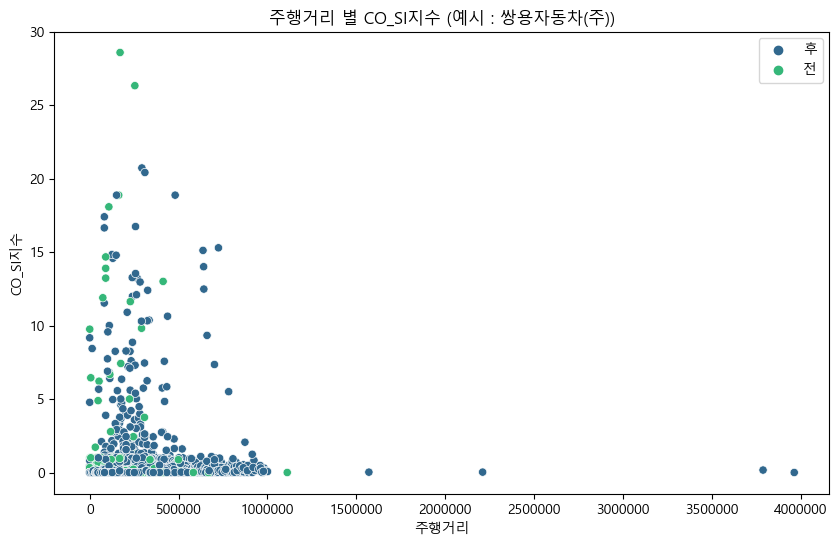

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 데이터 준비
data = 열화도_차령_주행거리[열화도_차령_주행거리['제작사명']=='쌍용자동차(주)']

# 새로운 그림(figure) 생성 및 크기 설정
plt.figure(figsize=(10, 6))

# Seaborn을 사용하여 산점도 그리기
sns.scatterplot(data=data, x='주행거리', y='CO_SI지수', hue='구조변경일전후', palette='viridis')

# 그래프 제목 설정
plt.title('주행거리 별 CO_SI지수 (예시 : 쌍용자동차(주))')

# 축에 대한 지수 표기법 비활성화
plt.ticklabel_format(style='plain', axis='both')

# 범례 위치 조절
plt.legend(loc='upper right')

# 그래프 표시
plt.show()

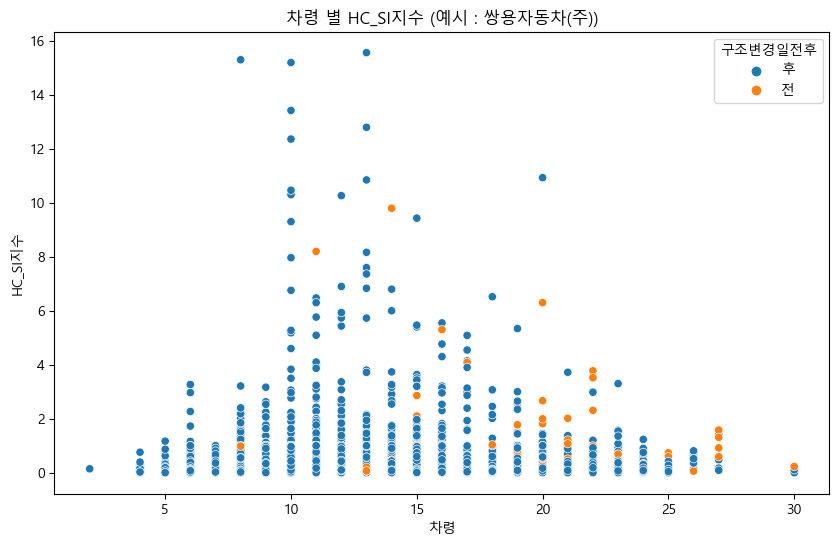

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



# 데이터 준비
data = 열화도_차령_주행거리[열화도_차령_주행거리['제작사명']=='쌍용자동차(주)']

# 새로운 그림(figure) 생성 및 크기 설정
plt.figure(figsize=(10, 6))

# 색상 팔레트 설정 (다른 색 5가지)
custom_palette = sns.color_palette("husl", 6)

# Seaborn을 사용하여 산점도 그리기
sns.scatterplot(data=data, x='차령', y='HC_SI지수', hue='구조변경일전후')


# 그래프 제목 설정
plt.title('차령 별 HC_SI지수 (예시 : 쌍용자동차(주))')


# 축에 대한 지수 표기법 비활성화
plt.ticklabel_format(style='plain', axis='both')


# 그래프 표시
plt.show()

In [104]:
열화도_차령_주행거리[열화도_차령_주행거리['제작사명']=='쌍용자동차(주)']

,제작사명,배출가스인증번호,연료,검사구분,검사방법,검사판정,구조변경일전후,차령,주행거리,CO_SI지수,HC_SI지수,NOx_SI지수,매연_SI지수
855769,쌍용자동차(주),1MY-SY-G07,휘발유,정기,무부하검사(TSI),N,후,17,261795.00,0.03,0.14,10.50,NaN
855770,쌍용자동차(주),1MY-SY-G07,휘발유,정기,무부하검사(TSI),Y,전,17,151022.00,0.08,0.06,9.90,NaN
855771,쌍용자동차(주),1MY-SY-G07,휘발유,정기,무부하검사(TSI),Y,전,18,277806.00,0.00,0.10,10.00,NaN
855772,쌍용자동차(주),1MY-SY-G07,휘발유,정기,무부하검사(TSI),Y,전,20,72910.00,0.00,0.07,10.10,NaN
855773,쌍용자동차(주),1MY-SY-G07,휘발유,정기,무부하검사(TSI),Y,후,17,261795.00,0.03,0.14,10.50,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060570,쌍용자동차(주),NaN,휘발유,정밀,부하검사(ASM2525),Y,후,25,222372.00,0.00,0.12,0.45,NaN
1060571,쌍용자동차(주),NaN,휘발유,정밀,부하검사(ASM2525),Y,후,25,251308.00,0.00,0.00,0.07,NaN
1060572,쌍용자동차(주),NaN,휘발유,정밀,부하검사(ASM2525),Y,후,25,357719.00,0.00,0.04,0.33,NaN
1060573,쌍용자동차(주),NaN,휘발유,정밀,부하검사(ASM2525),Y,후,26,83255.00,0.00,0.36,0.14,NaN


In [105]:
열화도_차령_주행거리[열화도_차령_주행거리['제작사명']=='쌍용자동차(주)'].to_excel("E:\geun\문지은\자료\회사\와보텍\업무\자동차환경빅데이터구축3차\code\과제5\\추가\\df522_1.xlsx", index=False)

In [ ]:
# ## 모든 문제 정답 하나의 엑셀 파일 + 다수의 sheet로 구분
# with pd.ExcelWriter('total_ans.xlsx') as writer:
#     df11.to_excel(writer, sheet_name='1-1', index=False)
#     df12.to_excel(writer, sheet_name='1-2', index=False)
#     df13.to_excel(writer, sheet_name='1-3', index=False)
#     df21.to_excel(writer, sheet_name='2-1', index=False)
#     df22.to_excel(writer, sheet_name='2-2', index=False)
#     df23.to_excel(writer, sheet_name='2-3', index=False)
#     df31.to_excel(writer, sheet_name='3-1', index=False)
#     df33.to_excel(writer, sheet_name='3-3', index=False)
#     df41.to_excel(writer, sheet_name='4-1', index=False)
#     df42.to_excel(writer, sheet_name='4-2', index=False)

In [186]:
# # 쌍용자동차(주)의 인증번호별 'CO_SI지수'에 대한 기술 통계량 구하기
# test = 열화도_차령_주행거리[열화도_차령_주행거리['제작사명'] == '쌍용자동차(주)'].groupby('배출가스인증번호')[['CO_SI지수','HC_SI지수']].describe()

# # 결과 출력
# print(test)

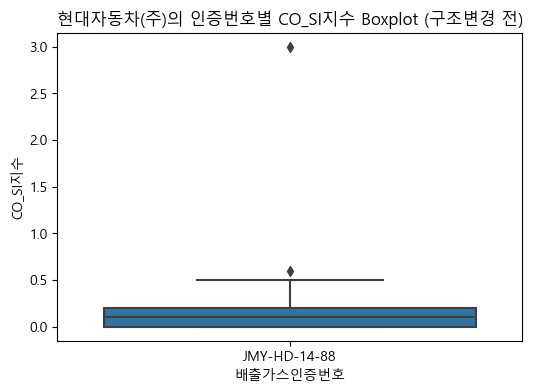

In [252]:
plt.figure(figsize=(6,4))

# 박스플롯 그리기
sns.boxplot(x='배출가스인증번호', y='CO_SI지수', data=열화도_차령_주행거리[(열화도_차령_주행거리['구조변경일전후'] == '전')&(열화도_차령_주행거리['제작사명'] == '현대자동차(주)')&(열화도_차령_주행거리['배출가스인증번호'] =='JMY-HD-14-88')])

# 그래프 제목 설정
plt.title('현대자동차(주)의 인증번호별 CO_SI지수 Boxplot (구조변경 전)')

# x축 라벨 설정
plt.xlabel('배출가스인증번호')

# y축 라벨 설정
plt.ylabel('CO_SI지수')

# 그래프 표시
plt.show()

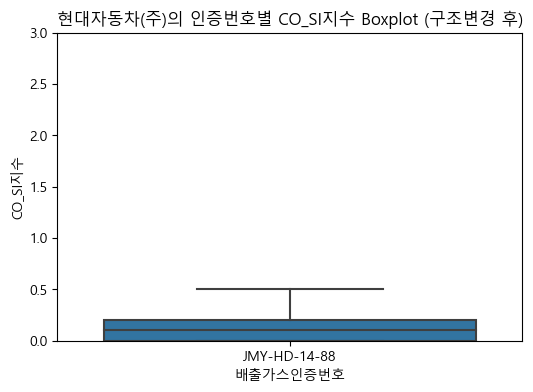

In [255]:
plt.figure(figsize=(6,4))

# 박스플롯 그리기
sns.boxplot(x='배출가스인증번호', y='CO_SI지수', data=열화도_차령_주행거리[(열화도_차령_주행거리['구조변경일전후'] == '후')&(열화도_차령_주행거리['제작사명'] == '현대자동차(주)')&(열화도_차령_주행거리['배출가스인증번호'] =='JMY-HD-14-88')])

# 그래프 제목 설정
plt.title('현대자동차(주)의 인증번호별 CO_SI지수 Boxplot (구조변경 후)')

# x축 라벨 설정
plt.xlabel('배출가스인증번호')

# y축 라벨 설정
plt.ylabel('CO_SI지수')
# Y 축 범위 설정
plt.ylim(0, 3)

# 그래프 표시
plt.show()

In [ ]:
##test

In [126]:
ins = pd.read_csv("C:\\Users\\kbjung\\Downloads\\정기정밀.csv")

## STD_BD53_1_EXHST_GAS_PRMT_CRTR

In [127]:
# 1m 49.9s
## 등록제원 & 정기정밀 병합
cs2i = cs2.merge(ins, on='차대번호', how='left')
print('data length:', format(len(cs2i),','))
cs2i.head(3)

data length: 101,930,301


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,총중량_x,총중량_y,코드,제작사_선택,검사일자,검사판정,무부하매연측정치1,무부하매연측정치2,무부하매연측정치3,검사방법,검사종류,무부하매연허용치1,무부하매연허용치2,무부하매연허용치3,검사구분
0,KMJTA18XPPC003145,N,20230731.00,A0810011100982322,1.00,승합,NaN,2023,20230621.00,전기,현대자동차(주),대형,일렉시티(ELEC CITY),15660.00,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KMJTA18XPPC003146,N,20230731.00,A0810011100982322,1.00,승합,NaN,2023,20230619.00,전기,현대자동차(주),대형,일렉시티(ELEC CITY),15660.00,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KMJTA18XPPC003143,N,20230731.00,A0810011100982322,1.00,승합,NaN,2023,20230623.00,전기,현대자동차(주),대형,일렉시티(ELEC CITY),15660.00,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
cs2i.shape

(101930301, 28)

In [143]:
cs2i = cs2i.drop('총중량_y', axis=1)

In [144]:
cs2i.to_csv("C:\\Users\\kbjung\\Downloads\\등록제원(중량,제작사컬럼),정기정밀.csv", index=False)

In [130]:
cs2i.head()

,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,총중량_x,총중량_y,코드,제작사_선택,검사일자,검사판정,무부하매연측정치1,무부하매연측정치2,무부하매연측정치3,검사방법,검사종류,무부하매연허용치1,무부하매연허용치2,무부하매연허용치3,검사구분
0,KMJTA18XPPC003145,N,20230731.00,A0810011100982322,1.00,승합,NaN,2023,20230621.00,전기,현대자동차(주),대형,일렉시티(ELEC CITY),15660.00,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KMJTA18XPPC003146,N,20230731.00,A0810011100982322,1.00,승합,NaN,2023,20230619.00,전기,현대자동차(주),대형,일렉시티(ELEC CITY),15660.00,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KMJTA18XPPC003143,N,20230731.00,A0810011100982322,1.00,승합,NaN,2023,20230623.00,전기,현대자동차(주),대형,일렉시티(ELEC CITY),15660.00,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KMHS381LGPU490926,N,20230731.00,A0810011404561322,2.00,승용,LMY-HD-14-75,2023,20230627.00,휘발유,현대자동차(주),대형,싼타페(SANTAFE),2015.00,2015.00,HD,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KMHS381LGPU491007,N,20230731.00,A0810011404561322,2.00,승용,LMY-HD-14-75,2023,20230628.00,휘발유,현대자동차(주),대형,싼타페(SANTAFE),2015.00,2015.00,HD,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
cs2i.shape

(101930301, 27)

In [132]:
#
## 구조변경 전/후 배출가스 변화 (정밀점검일자 기준)
cs2i_정기정밀 = cs2i.copy()
print('data length:', format(len(cs2i_정기정밀),','))

cs2i_정기정밀.loc[cs2i_정기정밀['연료'] == '경유', ['매연측정치']] = cs2i_정기정밀['무부하매연측정치1']
cs2i_정기정밀.loc[cs2i_정기정밀['연료'] == '경유', ['무부하매연측정치1','무부하매연측정치2', '무부하매연측정치3']] = np.nan
cs2i_정기정밀 = cs2i_정기정밀.rename(columns={'무부하매연측정치1':'일산화탄소측정치','무부하매연측정치2':'탄화수소측정치', '무부하매연측정치3':'질소산화물측정치'})
print('data length:', format(len(cs2i_정기정밀),','))
cs2i_정기정밀.head(2)

data length: 101,930,301
data length: 101,930,301


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,총중량_x,총중량_y,코드,제작사_선택,검사일자,검사판정,일산화탄소측정치,탄화수소측정치,질소산화물측정치,검사방법,검사종류,무부하매연허용치1,무부하매연허용치2,무부하매연허용치3,검사구분,매연측정치
0,KMJTA18XPPC003145,N,20230731.00,A0810011100982322,1.00,승합,NaN,2023,20230621.00,전기,현대자동차(주),대형,일렉시티(ELEC CITY),15660.00,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KMJTA18XPPC003146,N,20230731.00,A0810011100982322,1.00,승합,NaN,2023,20230619.00,전기,현대자동차(주),대형,일렉시티(ELEC CITY),15660.00,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
## 검사일자의 연도/월 컬럼 생성
cs2i_정기정밀['검사일자_연도'] = cs2i_정기정밀['검사일자'].astype(str).str[:4]
cs2i_정기정밀['검사일자_월'] = cs2i_정기정밀['검사일자'].astype(str).str[4:6]
cs2i_정기정밀['검사일자_일'] = cs2i_정기정밀['검사일자'].astype(str).str[6:8]
print('data length:', format(len(cs2i_정기정밀),','))
cs2i_정기정밀.head(2)

data length: 101,930,301


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,총중량_x,총중량_y,코드,제작사_선택,검사일자,검사판정,일산화탄소측정치,탄화수소측정치,질소산화물측정치,검사방법,검사종류,무부하매연허용치1,무부하매연허용치2,무부하매연허용치3,검사구분,매연측정치,검사일자_연도,검사일자_월,검사일자_일
0,KMJTA18XPPC003145,N,20230731.00,A0810011100982322,1.00,승합,NaN,2023,20230621.00,전기,현대자동차(주),대형,일렉시티(ELEC CITY),15660.00,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,,
1,KMJTA18XPPC003146,N,20230731.00,A0810011100982322,1.00,승합,NaN,2023,20230619.00,전기,현대자동차(주),대형,일렉시티(ELEC CITY),15660.00,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,,


In [134]:
# 11.2s
## 검사판정 정제
cs2i_정기정밀['검사판정'] = cs2i_정기정밀['검사판정'].replace("5", np.nan).replace("8", np.nan).replace("x", np.nan)
cs2i_정기정밀.head(2)

,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,총중량_x,총중량_y,코드,제작사_선택,검사일자,검사판정,일산화탄소측정치,탄화수소측정치,질소산화물측정치,검사방법,검사종류,무부하매연허용치1,무부하매연허용치2,무부하매연허용치3,검사구분,매연측정치,검사일자_연도,검사일자_월,검사일자_일
0,KMJTA18XPPC003145,N,20230731.00,A0810011100982322,1.00,승합,NaN,2023,20230621.00,전기,현대자동차(주),대형,일렉시티(ELEC CITY),15660.00,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,,
1,KMJTA18XPPC003146,N,20230731.00,A0810011100982322,1.00,승합,NaN,2023,20230619.00,전기,현대자동차(주),대형,일렉시티(ELEC CITY),15660.00,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,,


In [135]:
cs2i_정기정밀.describe(include='all')

,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,총중량_x,총중량_y,코드,제작사_선택,검사일자,검사판정,일산화탄소측정치,탄화수소측정치,질소산화물측정치,검사방법,검사종류,무부하매연허용치1,무부하매연허용치2,무부하매연허용치3,검사구분,매연측정치,검사일자_연도,검사일자_월,검사일자_일
count,101930301,101930301,101930283.00,101930301,100579122.00,101930301,90972119,101930301.00,101212718.00,101615408,101758079,101770918,101770920,101770752.00,90413614.00,90413614,101930301,95551784.00,95507966,41722016.00,41680153.00,41676908.00,95551784,95549108,92098357.00,51100300.00,50811511.00,95551784,50376722.00,101930301,101930301,101930301
unique,25795269,1,NaN,236024,NaN,4,5045,NaN,14402.00,15,5708,4,41452,NaN,NaN,34,2,NaN,2,NaN,NaN,NaN,7,28,NaN,NaN,NaN,2,NaN,23,13,32
top,KMHD251UBCU026653,N,NaN,A0710001300141411,NaN,승용,BMY-HD-14-57,NaN,20110517.00,경유,현대자동차(주),중형,포터Ⅱ (PORTERⅡ),NaN,NaN,HD,Y,NaN,Y,NaN,NaN,NaN,무부하검사(급가속),종합검사,NaN,NaN,NaN,정밀,NaN,2022,06,
freq,278,101930301,NaN,413103,NaN,65226776,3231314,NaN,39325.00,52232543,47751693,48864002,5304236,NaN,NaN,45323984,90413614,NaN,87719446,NaN,NaN,NaN,27751018,43477179,NaN,NaN,NaN,51175896,NaN,12405240,9306301,6378517
mean,NaN,NaN,20116206.35,NaN,2.87,NaN,NaN,2011.91,NaN,NaN,NaN,NaN,NaN,3158.06,2796.89,NaN,NaN,20185234.97,NaN,0.08,9.50,28.18,NaN,NaN,11.80,107.03,386.27,NaN,6.25,NaN,NaN,NaN
std,NaN,NaN,55321.53,NaN,1.05,NaN,NaN,5.62,NaN,NaN,NaN,NaN,NaN,4474.53,3424.45,NaN,NaN,36005.04,NaN,1.60,62.63,149.64,NaN,NaN,12.89,243.41,440.57,NaN,20.69,NaN,NaN,NaN
min,NaN,NaN,1993.00,NaN,1.00,NaN,NaN,1900.00,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,20020520.00,NaN,-0.10,-31.00,-254.00,NaN,NaN,0.00,0.00,0.00,NaN,-2.00,NaN,NaN,NaN
25%,NaN,NaN,20081023.00,NaN,2.00,NaN,NaN,2009.00,NaN,NaN,NaN,NaN,NaN,1775.00,1755.00,NaN,NaN,20160823.00,NaN,0.00,0.00,0.00,NaN,NaN,1.00,37.00,0.10,NaN,0.00,NaN,NaN,NaN
50%,NaN,NaN,20120228.00,NaN,3.00,NaN,NaN,2012.00,NaN,NaN,NaN,NaN,NaN,2085.00,2015.00,NaN,NaN,20190902.00,NaN,0.00,3.00,1.01,NaN,NaN,10.00,90.00,30.00,NaN,1.00,NaN,NaN,NaN
75%,NaN,NaN,20151001.00,NaN,3.00,NaN,NaN,2016.00,NaN,NaN,NaN,NaN,NaN,2945.00,2925.00,NaN,NaN,20211123.00,NaN,0.02,8.00,2.00,NaN,NaN,20.00,120.00,690.00,NaN,8.00,NaN,NaN,NaN


In [136]:
cs2i_정기정밀.describe()

,최초등록일자,배출가스등급,차량연식,총중량_x,총중량_y,검사일자,일산화탄소측정치,탄화수소측정치,질소산화물측정치,무부하매연허용치1,무부하매연허용치2,무부하매연허용치3,매연측정치
count,101930283.00,100579122.00,101930301.00,101770752.00,90413614.00,95551784.00,41722016.00,41680153.00,41676908.00,92098357.00,51100300.00,50811511.00,50376722.00
mean,20116206.35,2.87,2011.91,3158.06,2796.89,20185234.97,0.08,9.50,28.18,11.80,107.03,386.27,6.25
std,55321.53,1.05,5.62,4474.53,3424.45,36005.04,1.60,62.63,149.64,12.89,243.41,440.57,20.69
min,1993.00,1.00,1900.00,0.00,0.00,20020520.00,-0.10,-31.00,-254.00,0.00,0.00,0.00,-2.00
25%,20081023.00,2.00,2009.00,1775.00,1755.00,20160823.00,0.00,0.00,0.00,1.00,37.00,0.10,0.00
50%,20120228.00,3.00,2012.00,2085.00,2015.00,20190902.00,0.00,3.00,1.01,10.00,90.00,30.00,1.00
75%,20151001.00,3.00,2016.00,2945.00,2925.00,20211123.00,0.02,8.00,2.00,20.00,120.00,690.00,8.00
max,20230731.00,5.00,2024.00,936130.00,39990.00,20230731.00,999.90,90450.00,25066.00,80.00,3000.00,2530.00,97938.00


In [137]:
#
## 허용치 연료 구분

cs2i_정기정밀.loc[cs2i_정기정밀['연료'] == '경유', ['매연허용치']] = cs2i_정기정밀['무부하매연허용치1']
cs2i_정기정밀.loc[cs2i_정기정밀['연료'] == '경유', ['무부하매연허용치1','무부하매연허용치2', '무부하매연허용치3']] = np.nan
cs2i_정기정밀 = cs2i_정기정밀.rename(columns={'무부하매연허용치1':'일산화탄소허용치','무부하매연허용치2':'탄화수소허용치', '무부하매연허용치3':'질소산화물허용치'})
print('data length:', format(len(cs2i_정기정밀),','))
cs2i_정기정밀.head(2)

data length: 101,930,301


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,총중량_x,총중량_y,코드,제작사_선택,검사일자,검사판정,일산화탄소측정치,탄화수소측정치,질소산화물측정치,검사방법,검사종류,일산화탄소허용치,탄화수소허용치,질소산화물허용치,검사구분,매연측정치,검사일자_연도,검사일자_월,검사일자_일,매연허용치
0,KMJTA18XPPC003145,N,20230731.00,A0810011100982322,1.00,승합,NaN,2023,20230621.00,전기,현대자동차(주),대형,일렉시티(ELEC CITY),15660.00,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,,,NaN
1,KMJTA18XPPC003146,N,20230731.00,A0810011100982322,1.00,승합,NaN,2023,20230619.00,전기,현대자동차(주),대형,일렉시티(ELEC CITY),15660.00,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,,,NaN


In [138]:
## 제작일자의 연도/월 컬럼 생성
cs2i_정기정밀['제작일자_연도'] = cs2i_정기정밀['제작일자'].astype(str).str[:4]
cs2i_정기정밀['제작일자_월'] = cs2i_정기정밀['제작일자'].astype(str).str[4:6]
cs2i_정기정밀['제작일자_일'] = cs2i_정기정밀['제작일자'].astype(str).str[6:8]
print('data length:', format(len(cs2i_정기정밀),','))
cs2i_정기정밀.head(2)

data length: 101,930,301


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,총중량_x,총중량_y,코드,제작사_선택,검사일자,검사판정,일산화탄소측정치,탄화수소측정치,질소산화물측정치,검사방법,검사종류,일산화탄소허용치,탄화수소허용치,질소산화물허용치,검사구분,매연측정치,검사일자_연도,검사일자_월,검사일자_일,매연허용치,제작일자_연도,제작일자_월,제작일자_일
0,KMJTA18XPPC003145,N,20230731.00,A0810011100982322,1.00,승합,NaN,2023,20230621.00,전기,현대자동차(주),대형,일렉시티(ELEC CITY),15660.00,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,,,NaN,2023,06,21
1,KMJTA18XPPC003146,N,20230731.00,A0810011100982322,1.00,승합,NaN,2023,20230619.00,전기,현대자동차(주),대형,일렉시티(ELEC CITY),15660.00,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,,,NaN,2023,06,19


In [146]:
cs2i_정기정밀.drop('총중량_y', axis=1)

,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,총중량_x,코드,제작사_선택,검사일자,검사판정,일산화탄소측정치,탄화수소측정치,질소산화물측정치,검사방법,검사종류,일산화탄소허용치,탄화수소허용치,질소산화물허용치,검사구분,매연측정치,검사일자_연도,검사일자_월,검사일자_일,매연허용치,제작일자_연도,제작일자_월,제작일자_일
0,KMJTA18XPPC003145,N,20230731.00,A0810011100982322,1.00,승합,NaN,2023,20230621.00,전기,현대자동차(주),대형,일렉시티(ELEC CITY),15660.00,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,,,NaN,2023,06,21
1,KMJTA18XPPC003146,N,20230731.00,A0810011100982322,1.00,승합,NaN,2023,20230619.00,전기,현대자동차(주),대형,일렉시티(ELEC CITY),15660.00,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,,,NaN,2023,06,19
2,KMJTA18XPPC003143,N,20230731.00,A0810011100982322,1.00,승합,NaN,2023,20230623.00,전기,현대자동차(주),대형,일렉시티(ELEC CITY),15660.00,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,,,NaN,2023,06,23
3,KMHS381LGPU490926,N,20230731.00,A0810011404561322,2.00,승용,LMY-HD-14-75,2023,20230627.00,휘발유,현대자동차(주),대형,싼타페(SANTAFE),2015.00,HD,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,,,NaN,2023,06,27
4,KMHS381LGPU491007,N,20230731.00,A0810011404561322,2.00,승용,LMY-HD-14-75,2023,20230628.00,휘발유,현대자동차(주),대형,싼타페(SANTAFE),2015.00,HD,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,,,NaN,2023,06,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101930296,10781114373EOGUS,N,NaN,10004400070000,5.00,승합,NaN,1983,NaN,경유,현대자동차(주),대형,현대버스,10445.00,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,,,NaN,nan,,
101930297,03751356719EOWL,N,NaN,10002200030002,5.00,승용,NaN,1975,NaN,휘발유,새한자동차,중형,레코드로얄,1436.00,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,,,NaN,nan,,
101930298,02781160480EOQN,N,NaN,30220100000533,5.00,승합,NaN,1978,NaN,경유,거화,소형,지프페밀리,2210.00,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,,,NaN,nan,,
101930299,KLAER1981PB156096,N,NaN,99934103001471203,NaN,승용,NaN,1993,NaN,휘발유,대우자동차(주),중형,DAEWOO PRINCE,1515.00,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,,,NaN,nan,,


In [147]:
cs2i_정기정밀.to_csv("C:\\Users\\kbjung\\Downloads\\등록제원(중량,제작사컬럼),정기정밀_전처리.csv", index=False)

In [4]:
cs2i_정기정밀 = pd.read_csv("C:\\Users\\kbjung\\Downloads\\등록제원(중량,제작사컬럼),정기정밀_전처리.csv")

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

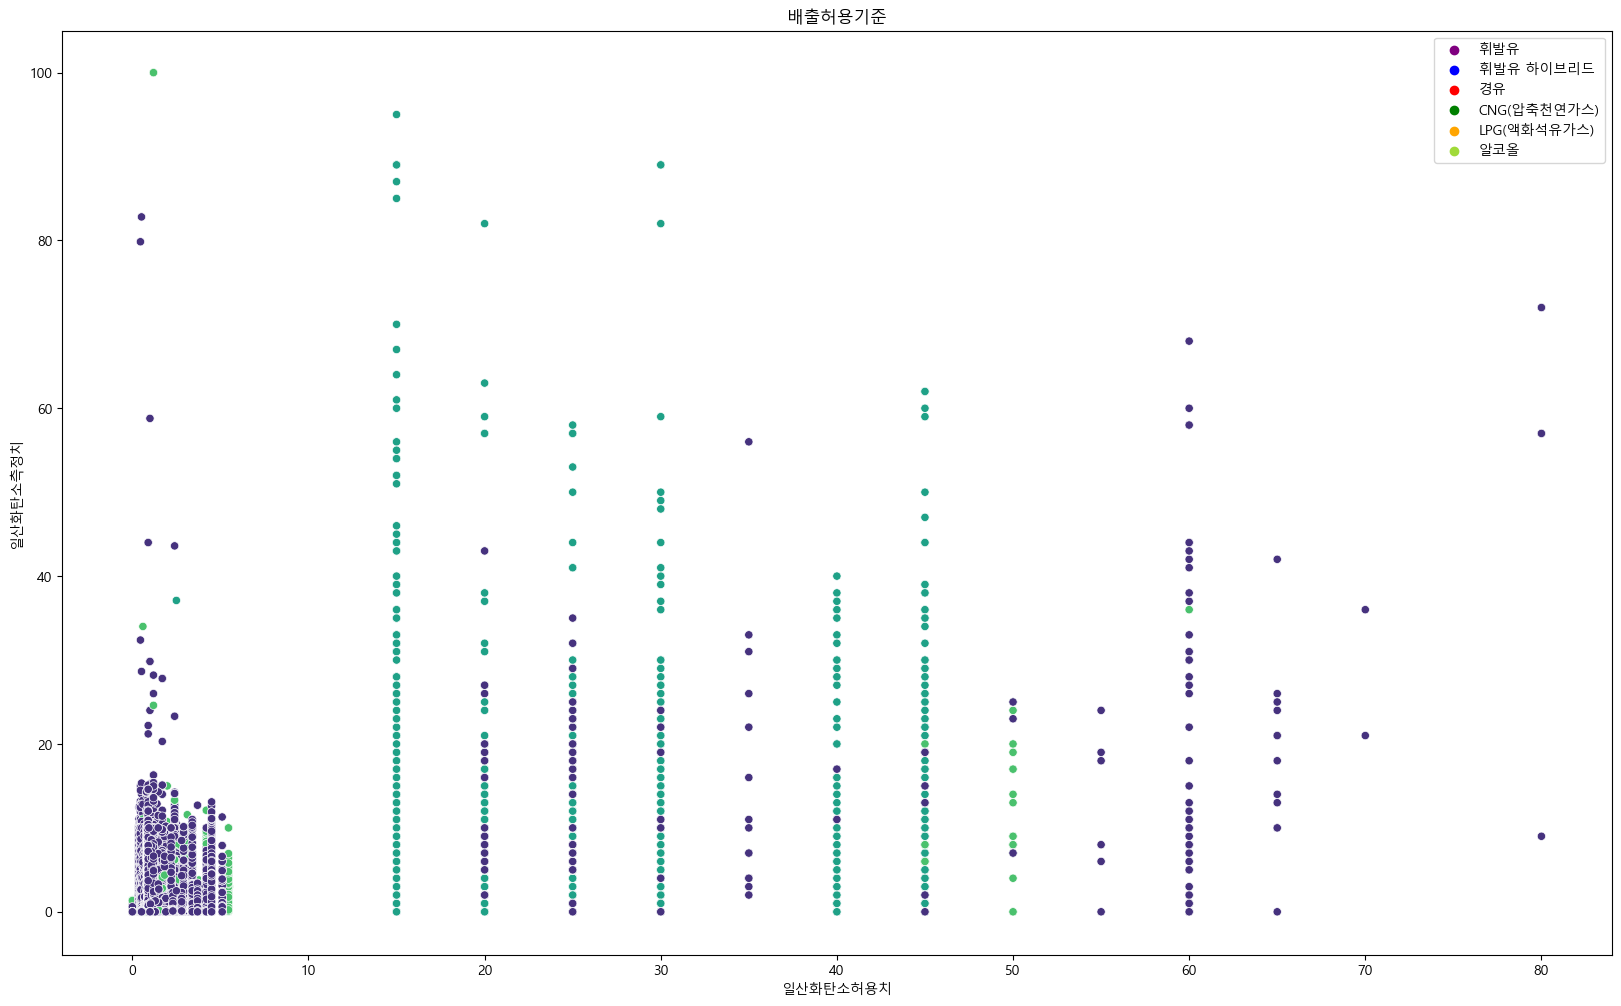

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 준비
data = cs2i_정기정밀[cs2i_정기정밀['연료'].isin(['휘발유','휘발유 하이브리드','경유','CNG(압축천연가스)','LPG(액화석유가스)','알코올'])]

# 새로운 그림(figure) 생성 및 크기 설정
plt.figure(figsize=(20, 12))

# Seaborn을 사용하여 산점도 그리기
sns.scatterplot(data=data, x='일산화탄소허용치', y='일산화탄소측정치', hue='연료', palette='viridis')

# 그래프 제목 설정
plt.title('배출허용기준')

# 축에 대한 지수 표기법 비활성화
plt.ticklabel_format(style='plain', axis='both')

# 범례 위치 조절
legend = plt.legend(loc='upper right')

# 원하는 색으로 범례 색상 지정
legend.legendHandles[0].set_color('purple')       # 휘발유
legend.legendHandles[1].set_color('blue')     # 휘발유 하이브리드
legend.legendHandles[2].set_color('red')      # 경유
legend.legendHandles[3].set_color('green')    # CNG(압축천연가스)
legend.legendHandles[4].set_color('#78e08f')    # LPG(액화석유가스)
legend.legendHandles[5].set_color('orange')    # 알코올

# 그래프 표시
plt.show()

IndexError: list index out of range

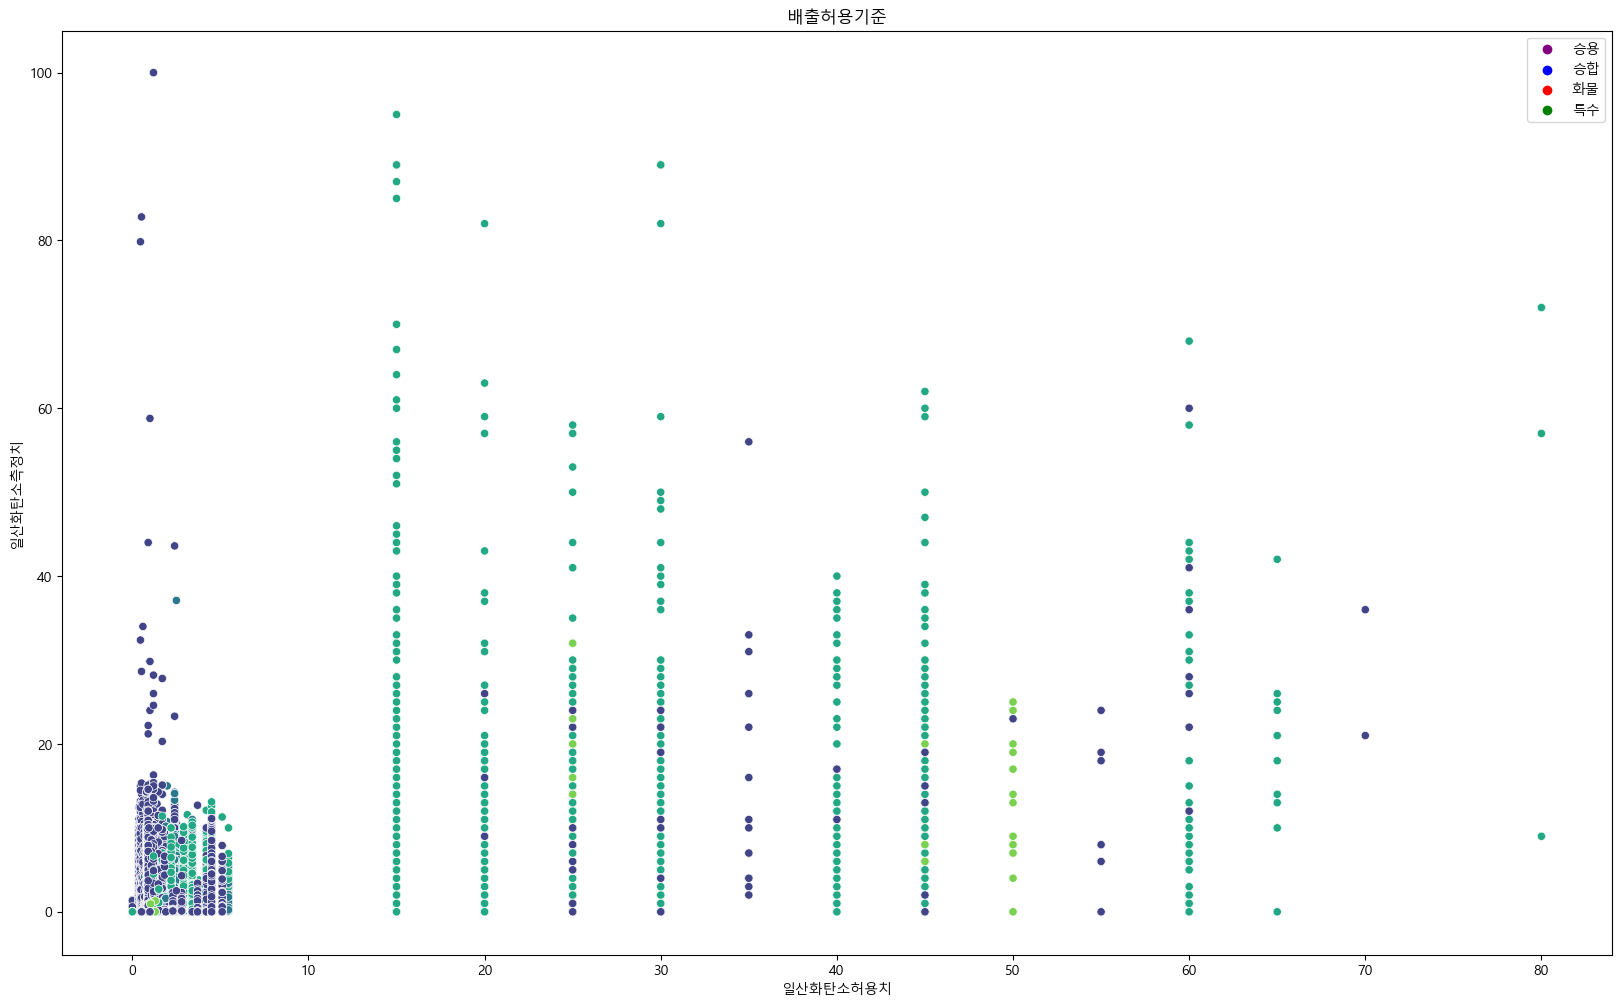

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 준비
data = cs2i_정기정밀

# 새로운 그림(figure) 생성 및 크기 설정
plt.figure(figsize=(20, 12))

# Seaborn을 사용하여 산점도 그리기
sns.scatterplot(data=data, x='일산화탄소허용치', y='일산화탄소측정치', hue='차종', palette='viridis')

# 그래프 제목 설정
plt.title('배출허용기준')

# 축에 대한 지수 표기법 비활성화
plt.ticklabel_format(style='plain', axis='both')

# 범례 위치 조절
legend = plt.legend(loc='upper right')

# 원하는 색으로 범례 색상 지정
legend.legendHandles[0].set_color('purple')       # 승용
legend.legendHandles[1].set_color('blue')     # 승합
legend.legendHandles[2].set_color('red')      # 화물
legend.legendHandles[3].set_color('green')    # 특수


# 그래프 표시
plt.show()

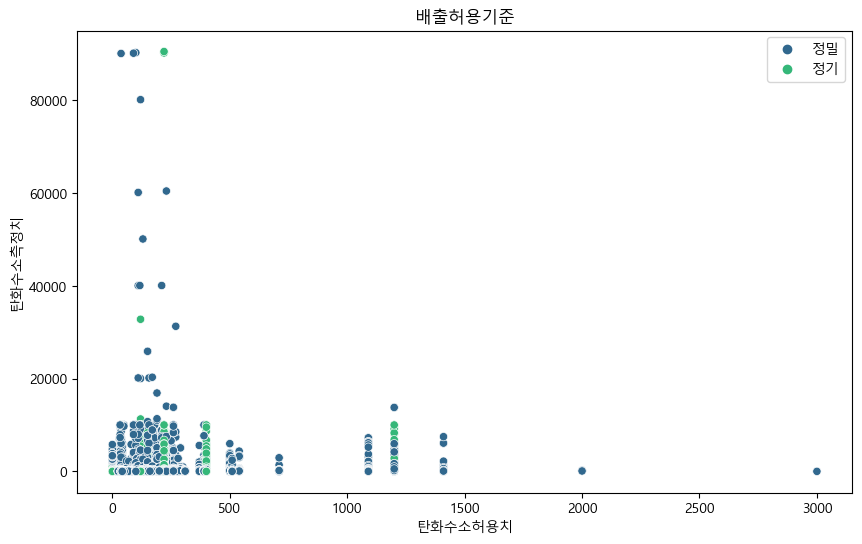

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 준비
data = cs2i_정기정밀

# 새로운 그림(figure) 생성 및 크기 설정
plt.figure(figsize=(10, 6))

# Seaborn을 사용하여 산점도 그리기
sns.scatterplot(data=data, x='탄화수소허용치', y='탄화수소측정치', hue='검사구분', palette='viridis')

# 그래프 제목 설정
plt.title('배출허용기준')

# 축에 대한 지수 표기법 비활성화
plt.ticklabel_format(style='plain', axis='both')

# 범례 위치 조절
plt.legend(loc='upper right')

# 그래프 표시
plt.show()

In [ ]:
plt.figure(figsize=(6,4))

# 박스플롯 그리기
sns.boxplot(x='탄화수소허용치', y='탄화수소측정치', data=cs2i_정기정밀)

# 그래프 제목 설정
plt.title('현대자동차(주)의 허용치기준별  Boxplot (구조변경 전)')

# x축 라벨 설정
plt.xlabel('배출가스인증번호')

# y축 라벨 설정
plt.ylabel('CO_SI지수')

# 그래프 표시
plt.show()

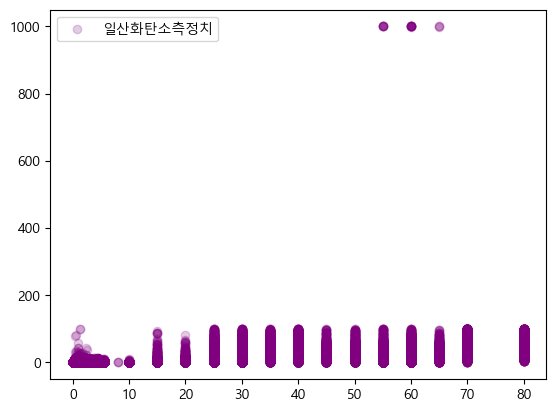

In [61]:
# 데이터 준비
plt.scatter(cs2i_정기정밀['일산화탄소허용치'], cs2i_정기정밀['일산화탄소측정치'], color = 'purple', alpha = 0.2, label = '일산화탄소측정치')

plt.legend()
plt.show()

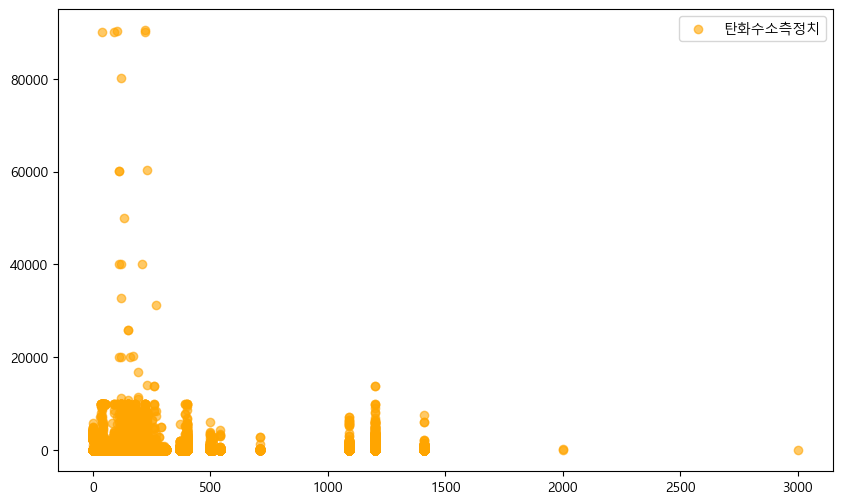

In [65]:
# 데이터 준비
plt.figure(figsize=(10, 6))
plt.scatter(cs2i_정기정밀['탄화수소허용치'], cs2i_정기정밀['탄화수소측정치'], color = 'orange', alpha = 0.6, label = '탄화수소측정치')

plt.legend()
plt.show()

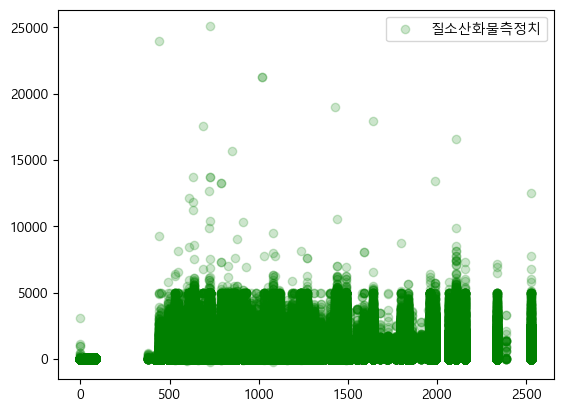

In [66]:
# 데이터 준비
plt.scatter(cs2i_정기정밀['질소산화물허용치'], cs2i_정기정밀['질소산화물측정치'], color = 'green', alpha = 0.2, label = '질소산화물측정치')

plt.legend()
plt.show()

In [ ]:
# 데이터 준비
plt.scatter(cs2i_정기정밀['매연허용치'], cs2i_정기정밀['매연측정치'], color = 'red', alpha = 0.2, label = '매연측정치')

plt.legend()
plt.show()

In [63]:
df531 = cs2i_정기정밀.groupby(['제작사명','배출가스인증번호','검사구분','검사방법','검사판정','검사일자_연도','제작일자_연도','연료'], dropna=False).agg({
                                                                '차대번호': 'count',
                                                                '일산화탄소측정치': 'mean',
                                                                '탄화수소측정치':'mean',
                                                                '질소산화물측정치':'mean',
                                                                '매연측정치':'mean',
                                                                '일산화탄소허용치':'mean',
                                                                '탄화수소허용치':'mean',
                                                                '질소산화물허용치':'mean',
                                                                '매연허용치':'mean',
                                                                })

df531_2 = df531.sort_values(by=['제작사명','배출가스인증번호','검사구분','검사방법','검사판정','제작일자_연도','연료'], ascending=[True, True,True,True,False,False,True]).reset_index()
df531_2

,제작사명,배출가스인증번호,검사구분,검사방법,검사판정,검사일자_연도,제작일자_연도,연료,차대번호,일산화탄소측정치,탄화수소측정치,질소산화물측정치,매연측정치,일산화탄소허용치,탄화수소허용치,질소산화물허용치,매연허용치
0,(BH)카라반,NaN,NaN,NaN,NaN,nan,2023,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(BH)카라반,NaN,NaN,NaN,NaN,nan,2022,기타연료,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,(BH)카라반,NaN,NaN,NaN,NaN,nan,2022,NaN,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,(BH)카라반,NaN,NaN,NaN,NaN,nan,2021,기타연료,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,(BH)카라반,NaN,NaN,NaN,NaN,nan,2021,NaN,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596938,NaN,NaN,NaN,NaN,NaN,nan,1974,휘발유,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
596939,NaN,NaN,NaN,NaN,NaN,nan,1973,휘발유,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
596940,NaN,NaN,NaN,NaN,NaN,nan,1971,경유,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
596941,NaN,NaN,NaN,NaN,NaN,nan,1970,휘발유,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
df531_2.to_excel("C:\\Users\\kbjung\\Downloads\\df531_2.xlsx", index=False)

In [44]:
cs2i_정기정밀.columns

Index(['차대번호', '차량말소여부', '최초등록일자', '제원관리번호', '배출가스등급', '차종', '배출가스인증번호',
       '차량연식', '제작일자', '연료', '제작사명', '차종유형', '차명', '코드', '제작사_선택', '검사일자',
       '검사판정', '일산화탄소측정치', '탄화수소측정치', '질소산화물측정치', '검사방법', '검사종류', '일산화탄소허용치',
       '탄화수소허용치', '질소산화물허용치', '검사구분', '매연측정치', '검사일자_연도', '검사일자_월', '검사일자_일',
       '매연허용치'],
      dtype='object')

## STD_BD53_2_EXHST_GAS_GNRLZ_INSP_CURSTT

In [96]:
# 11.2s
## 제작사의 종합검사결과별 등록차량대수
df532 = cs2i_정기정밀.groupby(['제작사명','배출가스인증번호','검사방법','검사판정','검사구분','제작일자_연도','제작일자_월'], dropna=False).agg({
                                                                '일산화탄소허용치':'mean',
                                                                '탄화수소측정치':'mean',
                                                                '질소산화물측정치':'mean',
                                                                '매연측정치':'mean',
                                                                '일산화탄소허용치':'mean',
                                                                '탄화수소허용치':'mean',
                                                                '질소산화물허용치':'mean',
                                                                '매연허용치':'mean',
                                                                })

df532 = df532.sort_values(by=['제작사명','배출가스인증번호','검사방법','검사판정','검사구분','제작일자_연도','제작일자_월'], ascending=[True, True,True,False,True,False,True]).reset_index()
df532

,제작사명,배출가스인증번호,검사방법,검사판정,검사구분,제작일자_연도,제작일자_월,일산화탄소허용치,탄화수소측정치,질소산화물측정치,매연측정치,탄화수소허용치,질소산화물허용치,매연허용치
0,(BH)카라반,NaN,NaN,NaN,NaN,2023,02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(BH)카라반,NaN,NaN,NaN,NaN,2023,03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,(BH)카라반,NaN,NaN,NaN,NaN,2023,06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,(BH)카라반,NaN,NaN,NaN,NaN,2022,01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,(BH)카라반,NaN,NaN,NaN,NaN,2022,02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570434,NaN,NaN,NaN,NaN,NaN,1973,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
570435,NaN,NaN,NaN,NaN,NaN,1971,09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
570436,NaN,NaN,NaN,NaN,NaN,1971,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
570437,NaN,NaN,NaN,NaN,NaN,1970,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
df532.to_excel("C:\\Users\\kbjung\\Downloads\\df532.xlsx", index=False)

## STD_BD53_3_EXHST_GAS_MNFCTR

In [69]:
cs2i_정기정밀_제작사 = cs2i_정기정밀[cs2i_정기정밀['제작사_선택']=='Y']
print('data length:', format(len(cs2i_정기정밀_제작사),','))
cs2i_정기정밀_제작사.head(2)

data length: 90,413,614


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,코드,제작사_선택,검사일자,검사판정,일산화탄소측정치,탄화수소측정치,질소산화물측정치,검사방법,검사종류,일산화탄소허용치,탄화수소허용치,질소산화물허용치,검사구분,매연측정치,검사일자_연도,검사일자_월,검사일자_일,매연허용치,제작일자_연도,제작일자_월,제작일자_일
3,KMHS381LGPU490926,N,20230731.00,A0810011404561322,2.00,승용,LMY-HD-14-75,2023,20230627.00,휘발유,현대자동차(주),대형,싼타페(SANTAFE),HD,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,,,NaN,2023,06,27
4,KMHS381LGPU491007,N,20230731.00,A0810011404561322,2.00,승용,LMY-HD-14-75,2023,20230628.00,휘발유,현대자동차(주),대형,싼타페(SANTAFE),HD,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,,,NaN,2023,06,28
5,KMHS381LGPU491213,N,20230731.00,A0810011404561322,2.00,승용,LMY-HD-14-75,2023,20230628.00,휘발유,현대자동차(주),대형,싼타페(SANTAFE),HD,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,,,NaN,2023,06,28
6,KMHS381LGPU491607,N,20230731.00,A0810011404561322,2.00,승용,LMY-HD-14-75,2023,20230630.00,휘발유,현대자동차(주),대형,싼타페(SANTAFE),HD,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,,,NaN,2023,06,30
7,KMHS381LGPU491621,N,20230731.00,A0810011404561322,2.00,승용,LMY-HD-14-75,2023,20230630.00,휘발유,현대자동차(주),대형,싼타페(SANTAFE),HD,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,,,NaN,2023,06,30


In [103]:
# 11.2s
## 제작사의 종합검사결과별 등록차량대수
df533 = cs2i_정기정밀_제작사.groupby(['제작사명','배출가스인증번호','검사방법','검사판정','검사구분','검사일자_연도','검사일자_월'], dropna=False).agg({
                                                                '일산화탄소허용치':'mean',
                                                                '탄화수소측정치':'mean',
                                                                '질소산화물측정치':'mean',
                                                                '매연측정치':'mean',
                                                                '일산화탄소허용치':'mean',
                                                                '탄화수소허용치':'mean',
                                                                '질소산화물허용치':'mean',
                                                                '매연허용치':'mean',
                                                                })

df533 = df533.sort_values(by=['제작사명','배출가스인증번호','검사방법','검사판정','검사구분','검사일자_연도','검사일자_월'], ascending=[True, True,True,False,True,False,True]).reset_index()
df533

,제작사명,배출가스인증번호,검사방법,검사판정,검사구분,검사일자_연도,검사일자_월,일산화탄소허용치,탄화수소측정치,질소산화물측정치,매연측정치,탄화수소허용치,질소산화물허용치,매연허용치
0,(주)볼보자동차코리아,3MY-PA-03,무부하검사(TSI),Y,정기,2022,10,1.20,96.00,0.98,NaN,220.00,0.10,NaN
1,(주)볼보자동차코리아,3MY-PA-03,무부하검사(TSI),Y,정기,2020,01,1.20,54.00,1.02,NaN,220.00,0.10,NaN
2,(주)볼보자동차코리아,3MY-PA-03,무부하검사(TSI),Y,정기,2020,08,1.20,5.00,0.98,NaN,220.00,0.10,NaN
3,(주)볼보자동차코리아,3MY-PA-03,무부하검사(TSI),Y,정기,2019,11,1.20,1.00,1.04,NaN,220.00,0.10,NaN
4,(주)볼보자동차코리아,3MY-PA-03,무부하검사(TSI),Y,정기,2017,11,1.20,2.00,1.00,NaN,220.00,0.10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654319,혼다코리아(주),KMY-HK-12-3,무부하검사(정지가동),Y,정기,2023,05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
654320,혼다코리아(주),KMY-HK-12-3,무부하검사(정지가동),Y,정기,2023,06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
654321,혼다코리아(주),KMY-HK-12-3,무부하검사(정지가동),Y,정기,2023,07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
654322,혼다코리아(주),KMY-HK-12-3,NaN,NaN,NaN,nan,,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
df533.to_excel("C:\\Users\\kbjung\\Downloads\\df533_2.xlsx", index=False)

## STD_BD53_4_EXHST_GAS_VHCTY_TY

In [100]:
cs2i_정기정밀.columns

Index(['차대번호', '차량말소여부', '최초등록일자', '제원관리번호', '배출가스등급', '차종', '배출가스인증번호',
       '차량연식', '제작일자', '연료', '제작사명', '차종유형', '차명', '코드', '제작사_선택', '검사일자',
       '검사판정', '일산화탄소측정치', '탄화수소측정치', '질소산화물측정치', '검사방법', '검사종류', '일산화탄소허용치',
       '탄화수소허용치', '질소산화물허용치', '검사구분', '매연측정치', '검사일자_연도', '검사일자_월', '검사일자_일',
       '매연허용치', '제작일자_연도', '제작일자_월', '제작일자_일'],
      dtype='object')

In [17]:
# 11.2s
## 유형별 등록차량대수
df534 = cs2i_정기정밀.groupby(['제작사명','차종유형', '검사방법','검사판정','검사구분','검사일자_연도'], dropna=False).agg({
                                                                '일산화탄소허용치':'mean',
                                                                '탄화수소측정치':'mean',
                                                                '질소산화물측정치':'mean',
                                                                '매연측정치':'mean',
                                                                '일산화탄소허용치':'mean',
                                                                '탄화수소허용치':'mean',
                                                                '질소산화물허용치':'mean',
                                                                '매연허용치':'mean',
                                                                })

df534 = df534.sort_values(by=['제작사명', '차종유형', '검사방법','검사판정','검사구분','검사일자_연도'], ascending=[True, True, True,False,True,False]).reset_index()
df534

,제작사명,차종유형,검사방법,검사판정,검사구분,검사일자_연도,일산화탄소허용치,탄화수소측정치,질소산화물측정치,매연측정치,탄화수소허용치,질소산화물허용치,매연허용치
0,(BH)카라반,소형,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(First)모터스,대형,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,(First)모터스,소형,부하검사(ASM-Idling),Y,정밀,2023.00,0.42,2.00,0.00,NaN,80.00,510.00,NaN
3,(First)모터스,소형,부하검사(ASM-Idling),Y,정밀,2022.00,0.42,0.00,1.00,NaN,80.00,510.00,NaN
4,(First)모터스,소형,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123615,NaN,NaN,부하검사(LUG DOWN),NaN,정밀,2012.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123616,NaN,NaN,부하검사(LUG DOWN),NaN,정밀,2011.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123617,NaN,NaN,부하검사(LUG DOWN),NaN,정밀,2010.00,25.00,21.00,18.00,NaN,25.00,25.00,NaN
123618,NaN,NaN,부하검사(LUG DOWN),NaN,정밀,2009.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df534.to_excel("C:\\Users\\kbjung\\Downloads\\df534.xlsx", index=False)

## STD_BD53_5_EXHST_GAS_SI_CMP_CL

In [12]:
## SI 지수
cs2i_정기정밀_열화도 = cs2i_정기정밀.copy()

# ## 정기/정밀만 가져오기. 
# cs2gam_구조변경Y_정기정밀_si = cs2i_정기정밀_열화도[(cs2i_정기정밀_열화도['검사구분']=='정기') | (cs2i_정기정밀_열화도['검사구분']=='정밀') ]
# print('data length:', format(len(cs2gam_구조변경Y_정기정밀_si),','))

## SI 지수 구하기
cs2i_정기정밀_열화도.loc[cs2i_정기정밀_열화도['연료'] != '경유', 'CO_SI지수'] = cs2i_정기정밀_열화도['일산화탄소측정치'] / cs2i_정기정밀_열화도['탄화수소허용치'] ##CO_SI지수 = 일산화산소 측정치 / 허용치
cs2i_정기정밀_열화도.loc[cs2i_정기정밀_열화도['연료'] == '경유', '매연_SI지수'] = cs2i_정기정밀_열화도['매연측정치'] / cs2i_정기정밀_열화도['매연허용치'] ##매연_SI지수 = 매연 측정치 / 허용치
cs2i_정기정밀_열화도['HC_SI지수'] = cs2i_정기정밀_열화도['탄화수소측정치']/cs2i_정기정밀_열화도['탄화수소허용치']  ##HC_SI지수 = 탄화수소 측정치 / 허용치
cs2i_정기정밀_열화도['NOx_SI지수'] = cs2i_정기정밀_열화도['질소산화물측정치']/cs2i_정기정밀_열화도['질소산화물허용치']  ##HC_SI지수 = 질소산화물 측정치 / 허용치

print('data length:', format(len(cs2i_정기정밀_열화도),','))
cs2i_정기정밀_열화도.head(2)

data length: 101,930,301


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,총중량_x,총중량_y,코드,제작사_선택,검사일자,검사판정,일산화탄소측정치,탄화수소측정치,질소산화물측정치,검사방법,검사종류,일산화탄소허용치,탄화수소허용치,질소산화물허용치,검사구분,매연측정치,검사일자_연도,검사일자_월,검사일자_일,매연허용치,제작일자_연도,제작일자_월,제작일자_일,CO_SI지수,매연_SI지수,HC_SI지수,NOx_SI지수
0,KMJTA18XPPC003145,N,20230731.00,A0810011100982322,1.00,승합,NaN,2023,20230621.00,전기,현대자동차(주),대형,일렉시티(ELEC CITY),15660.00,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023.00,6.00,21.00,NaN,NaN,NaN,NaN
1,KMJTA18XPPC003146,N,20230731.00,A0810011100982322,1.00,승합,NaN,2023,20230619.00,전기,현대자동차(주),대형,일렉시티(ELEC CITY),15660.00,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023.00,6.00,19.00,NaN,NaN,NaN,NaN


In [13]:
cs2i_정기정밀_열화도.to_csv("C:\\Users\\kbjung\\Downloads\\등록제원(중량,제작사컬럼),정기정밀_전처리_열화도.csv", index=False)

In [20]:
# 11.2s
## 유형별 등록차량대수
df535 = cs2i_정기정밀_열화도.groupby(['제작사명','차종유형', '검사방법','검사판정','검사구분','검사일자_연도','검사일자_월'], dropna=False).agg({
                                                                'CO_SI지수':'mean',
                                                                'HC_SI지수':'mean',
                                                                'NOx_SI지수':'mean',
                                                                '매연_SI지수':'mean'
                                                                })

df535 = df535.sort_values(by=['제작사명', '차종유형', '검사방법','검사판정','검사구분','검사일자_연도','검사일자_월'], ascending=[True, True, True, True, True,False,True]).reset_index()
df535

,제작사명,차종유형,검사방법,검사판정,검사구분,검사일자_연도,검사일자_월,CO_SI지수,HC_SI지수,NOx_SI지수,매연_SI지수
0,(BH)카라반,소형,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(First)모터스,대형,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,(First)모터스,소형,부하검사(ASM-Idling),Y,정밀,2023.00,7.00,0.00,0.03,0.00,NaN
3,(First)모터스,소형,부하검사(ASM-Idling),Y,정밀,2022.00,7.00,0.00,0.00,0.00,NaN
4,(First)모터스,소형,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
477790,NaN,NaN,부하검사(LUG DOWN),NaN,정밀,2009.00,8.00,NaN,NaN,NaN,NaN
477791,NaN,NaN,부하검사(LUG DOWN),NaN,정밀,2009.00,9.00,NaN,NaN,NaN,NaN
477792,NaN,NaN,부하검사(LUG DOWN),NaN,정밀,2009.00,10.00,NaN,NaN,NaN,NaN
477793,NaN,NaN,부하검사(LUG DOWN),NaN,정밀,2009.00,11.00,NaN,NaN,NaN,NaN


In [21]:
df535.to_excel("C:\\Users\\kbjung\\Downloads\\df535.xlsx", index=False)